In [38]:
import pandas as pd
import numpy as np

import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from catboost import CatBoostClassifier

import shap

## 1.  Model - No filter selection

#### 1. Load dataset 

In [39]:
df = pd.read_csv("./dataset/data-t1.csv")

In [40]:
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### 2. Clean dataset 

In [41]:
x = df.drop(columns=['diagnosis', 'id', 'Unnamed: 32'])
y = df['diagnosis'].map({"M": 0, "B": 1})

print(x.shape)

(569, 30)


#### 3. Train Model

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

model = CatBoostClassifier()
start = time.time()
model.fit(x_train, y_train)
stop = time.time()

print(f"Training time: {(stop - start) * 1000 }ms")

Learning rate set to 0.006952
0:	learn: 0.6804405	total: 4.06ms	remaining: 4.05s
1:	learn: 0.6685879	total: 6.4ms	remaining: 3.19s
2:	learn: 0.6572490	total: 8.93ms	remaining: 2.97s
3:	learn: 0.6471187	total: 11.5ms	remaining: 2.87s
4:	learn: 0.6361670	total: 13.9ms	remaining: 2.77s
5:	learn: 0.6279450	total: 16.4ms	remaining: 2.72s
6:	learn: 0.6163734	total: 18.9ms	remaining: 2.68s
7:	learn: 0.6066496	total: 21.4ms	remaining: 2.65s
8:	learn: 0.5950761	total: 23.9ms	remaining: 2.63s
9:	learn: 0.5860362	total: 26.5ms	remaining: 2.63s
10:	learn: 0.5768125	total: 29.1ms	remaining: 2.61s
11:	learn: 0.5670565	total: 31.5ms	remaining: 2.6s
12:	learn: 0.5588278	total: 34ms	remaining: 2.58s
13:	learn: 0.5502718	total: 36.7ms	remaining: 2.58s
14:	learn: 0.5410565	total: 39.3ms	remaining: 2.58s
15:	learn: 0.5322383	total: 41.8ms	remaining: 2.57s
16:	learn: 0.5239643	total: 44.3ms	remaining: 2.56s
17:	learn: 0.5157797	total: 47.1ms	remaining: 2.57s
18:	learn: 0.5079562	total: 50.4ms	remaining: 2.

181:	learn: 0.0841589	total: 534ms	remaining: 2.4s
182:	learn: 0.0835166	total: 537ms	remaining: 2.4s
183:	learn: 0.0830306	total: 539ms	remaining: 2.39s
184:	learn: 0.0823605	total: 543ms	remaining: 2.39s
185:	learn: 0.0819332	total: 547ms	remaining: 2.39s
186:	learn: 0.0814367	total: 550ms	remaining: 2.39s
187:	learn: 0.0808728	total: 553ms	remaining: 2.39s
188:	learn: 0.0803065	total: 556ms	remaining: 2.39s
189:	learn: 0.0795434	total: 558ms	remaining: 2.38s
190:	learn: 0.0792108	total: 562ms	remaining: 2.38s
191:	learn: 0.0786649	total: 565ms	remaining: 2.38s
192:	learn: 0.0783472	total: 567ms	remaining: 2.37s
193:	learn: 0.0779577	total: 571ms	remaining: 2.37s
194:	learn: 0.0774577	total: 573ms	remaining: 2.37s
195:	learn: 0.0770546	total: 576ms	remaining: 2.36s
196:	learn: 0.0765258	total: 578ms	remaining: 2.36s
197:	learn: 0.0760605	total: 580ms	remaining: 2.35s
198:	learn: 0.0755485	total: 584ms	remaining: 2.35s
199:	learn: 0.0749035	total: 587ms	remaining: 2.35s
200:	learn: 0.

339:	learn: 0.0366464	total: 913ms	remaining: 1.77s
340:	learn: 0.0364931	total: 916ms	remaining: 1.77s
341:	learn: 0.0363668	total: 920ms	remaining: 1.77s
342:	learn: 0.0362204	total: 922ms	remaining: 1.77s
343:	learn: 0.0360965	total: 925ms	remaining: 1.76s
344:	learn: 0.0360077	total: 929ms	remaining: 1.76s
345:	learn: 0.0358634	total: 933ms	remaining: 1.76s
346:	learn: 0.0357417	total: 936ms	remaining: 1.76s
347:	learn: 0.0355725	total: 939ms	remaining: 1.76s
348:	learn: 0.0354346	total: 943ms	remaining: 1.76s
349:	learn: 0.0352872	total: 947ms	remaining: 1.76s
350:	learn: 0.0351520	total: 952ms	remaining: 1.76s
351:	learn: 0.0350224	total: 955ms	remaining: 1.76s
352:	learn: 0.0348556	total: 958ms	remaining: 1.75s
353:	learn: 0.0346939	total: 961ms	remaining: 1.75s
354:	learn: 0.0345826	total: 964ms	remaining: 1.75s
355:	learn: 0.0344493	total: 967ms	remaining: 1.75s
356:	learn: 0.0342866	total: 971ms	remaining: 1.75s
357:	learn: 0.0341058	total: 974ms	remaining: 1.75s
358:	learn: 

547:	learn: 0.0184307	total: 1.43s	remaining: 1.18s
548:	learn: 0.0183797	total: 1.44s	remaining: 1.18s
549:	learn: 0.0183423	total: 1.44s	remaining: 1.18s
550:	learn: 0.0182846	total: 1.44s	remaining: 1.18s
551:	learn: 0.0182460	total: 1.45s	remaining: 1.17s
552:	learn: 0.0182162	total: 1.45s	remaining: 1.17s
553:	learn: 0.0181706	total: 1.45s	remaining: 1.17s
554:	learn: 0.0181276	total: 1.45s	remaining: 1.17s
555:	learn: 0.0180933	total: 1.46s	remaining: 1.16s
556:	learn: 0.0180367	total: 1.46s	remaining: 1.16s
557:	learn: 0.0179923	total: 1.46s	remaining: 1.16s
558:	learn: 0.0179477	total: 1.47s	remaining: 1.16s
559:	learn: 0.0178908	total: 1.47s	remaining: 1.15s
560:	learn: 0.0178472	total: 1.47s	remaining: 1.15s
561:	learn: 0.0177961	total: 1.48s	remaining: 1.15s
562:	learn: 0.0177568	total: 1.48s	remaining: 1.15s
563:	learn: 0.0177000	total: 1.48s	remaining: 1.15s
564:	learn: 0.0176521	total: 1.48s	remaining: 1.14s
565:	learn: 0.0176184	total: 1.49s	remaining: 1.14s
566:	learn: 

746:	learn: 0.0115050	total: 1.98s	remaining: 671ms
747:	learn: 0.0114840	total: 1.98s	remaining: 669ms
748:	learn: 0.0114646	total: 1.99s	remaining: 666ms
749:	learn: 0.0114328	total: 1.99s	remaining: 663ms
750:	learn: 0.0113991	total: 1.99s	remaining: 661ms
751:	learn: 0.0113728	total: 1.99s	remaining: 658ms
752:	learn: 0.0113577	total: 2s	remaining: 655ms
753:	learn: 0.0113404	total: 2s	remaining: 653ms
754:	learn: 0.0113215	total: 2s	remaining: 650ms
755:	learn: 0.0113090	total: 2.01s	remaining: 648ms
756:	learn: 0.0112814	total: 2.01s	remaining: 645ms
757:	learn: 0.0112591	total: 2.01s	remaining: 642ms
758:	learn: 0.0112346	total: 2.01s	remaining: 640ms
759:	learn: 0.0112141	total: 2.02s	remaining: 637ms
760:	learn: 0.0111893	total: 2.02s	remaining: 634ms
761:	learn: 0.0111612	total: 2.02s	remaining: 632ms
762:	learn: 0.0111435	total: 2.03s	remaining: 630ms
763:	learn: 0.0111203	total: 2.03s	remaining: 627ms
764:	learn: 0.0110994	total: 2.03s	remaining: 624ms
765:	learn: 0.0110841

931:	learn: 0.0079273	total: 2.54s	remaining: 185ms
932:	learn: 0.0079203	total: 2.54s	remaining: 183ms
933:	learn: 0.0079065	total: 2.54s	remaining: 180ms
934:	learn: 0.0078930	total: 2.55s	remaining: 177ms
935:	learn: 0.0078793	total: 2.55s	remaining: 174ms
936:	learn: 0.0078696	total: 2.55s	remaining: 172ms
937:	learn: 0.0078597	total: 2.56s	remaining: 169ms
938:	learn: 0.0078390	total: 2.56s	remaining: 166ms
939:	learn: 0.0078278	total: 2.56s	remaining: 164ms
940:	learn: 0.0078118	total: 2.56s	remaining: 161ms
941:	learn: 0.0077984	total: 2.57s	remaining: 158ms
942:	learn: 0.0077844	total: 2.57s	remaining: 155ms
943:	learn: 0.0077631	total: 2.57s	remaining: 153ms
944:	learn: 0.0077515	total: 2.58s	remaining: 150ms
945:	learn: 0.0077349	total: 2.58s	remaining: 147ms
946:	learn: 0.0077164	total: 2.58s	remaining: 145ms
947:	learn: 0.0077031	total: 2.59s	remaining: 142ms
948:	learn: 0.0076891	total: 2.59s	remaining: 139ms
949:	learn: 0.0076737	total: 2.59s	remaining: 136ms
950:	learn: 

#### 4. Model Results

## 2. Apply Feature Selection (Shap)

In [43]:
shap.initjs()

explainer = shap.Explainer(model)

start = time.time()
shap_values = explainer.shap_values(x_train)
stop = time.time()

print(f"Training time: {(stop - start) * 1000 }ms")

Training time: 620.1410293579102ms


In [44]:
import matplotlib.pyplot as plt

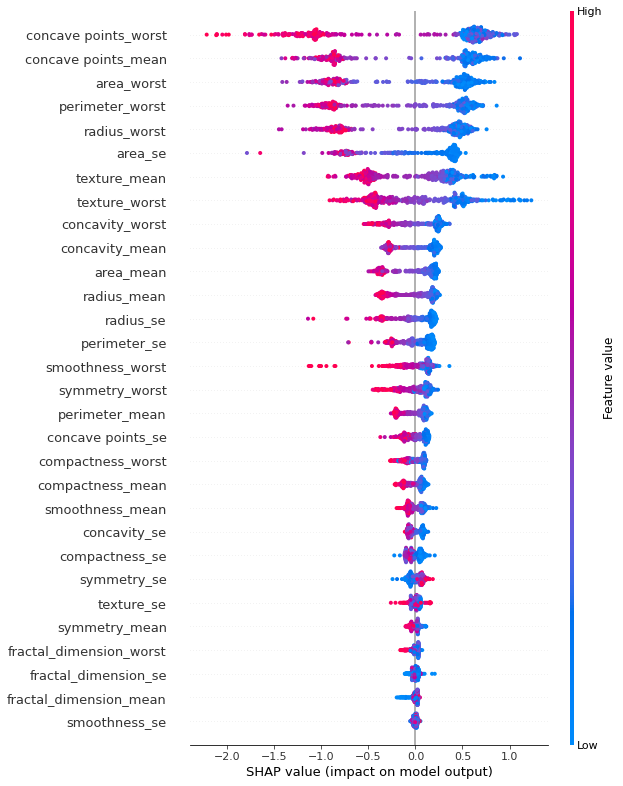

In [45]:
shap.summary_plot(shap_values, x_train, max_display=len(x.columns))

In [46]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(x_train.columns, vals)),columns=['feature_name','importance_value'])
feature_importance.sort_values(by=['importance_value'],ascending=False,inplace=True)

print(feature_importance.to_latex())

\begin{tabular}{llr}
\toprule
{} &             feature\_name &  importance\_value \\
\midrule
27 &     concave points\_worst &          0.828588 \\
7  &      concave points\_mean &          0.711841 \\
23 &               area\_worst &          0.612300 \\
22 &          perimeter\_worst &          0.605240 \\
20 &             radius\_worst &          0.567432 \\
13 &                  area\_se &          0.453123 \\
1  &             texture\_mean &          0.415541 \\
21 &            texture\_worst &          0.412832 \\
26 &          concavity\_worst &          0.238842 \\
6  &           concavity\_mean &          0.220771 \\
3  &                area\_mean &          0.216557 \\
0  &              radius\_mean &          0.202594 \\
10 &                radius\_se &          0.178255 \\
12 &             perimeter\_se &          0.144058 \\
24 &         smoothness\_worst &          0.142976 \\
28 &           symmetry\_worst &          0.125448 \\
2  &           perimeter\_mean &          

In [47]:
import os

measures_data = []
featured_names = []

def print_classification_report(classification_report):
    accuracy = classification_report["accuracy"]
    precision = classification_report["weighted avg"]["precision"]
    f1_score = classification_report["weighted avg"]["f1-score"]
    recall = classification_report["weighted avg"]["recall"]
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1_score}")
    print(f"Recall: {recall}")
    print(f"Training time: {(stop - start) * 1000 }s")

def get_measures(feature, classification_report, training_time, shap_value, storage): 
    accuracy = classification_report["accuracy"]
    precision = classification_report["weighted avg"]["precision"]
    f1_score = classification_report["weighted avg"]["f1-score"]
    recall = classification_report["weighted avg"]["recall"]
    
    measures_data.append([feature, accuracy, precision, recall, f1_score, training_time, shap_value, storage])
    
def train_model(feature, shap_value):
    featured_names.append(feature)
    
    x = df[featured_names]
    y = df['diagnosis'].map({"M": 0, "B": 1})
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

    model = CatBoostClassifier()
    start = time.time()
    model.fit(x_train, y_train)
    stop = time.time()
    
    predict = model.predict(x_test)
    
    storage = get_storage(featured_names)
    training_time = (stop - start) * 1000
    classification = classification_report(y_test, predict, output_dict=True)
    get_measures(feature, classification, training_time, shap_value, storage)
    
def get_storage(features):
    merged_features = ['diagnosis', 'id', 'Unnamed: 32'] + features
    temp = df[merged_features]
    temp.to_csv('./dataset/temp.csv')
    
    return os.stat('./dataset/temp.csv').st_size
            
def shap_all(df):
    for index, row in df.iterrows():
        train_model(row['feature_name'], row['importance_value'])

In [48]:
shap_all(feature_importance)

measures_df = pd.DataFrame(measures_data, columns = ['Feature Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time', 'Shap Value', 'Storage'])

measures_df.to_csv('./results/catboost/cancer-breast-catboost-report.csv')

Learning rate set to 0.006952
0:	learn: 0.6841037	total: 704us	remaining: 704ms
1:	learn: 0.6762130	total: 1.4ms	remaining: 700ms
2:	learn: 0.6674693	total: 2.07ms	remaining: 690ms
3:	learn: 0.6590664	total: 2.73ms	remaining: 680ms
4:	learn: 0.6512774	total: 3.51ms	remaining: 698ms
5:	learn: 0.6438727	total: 4.29ms	remaining: 710ms
6:	learn: 0.6356844	total: 5.1ms	remaining: 723ms
7:	learn: 0.6286484	total: 5.92ms	remaining: 735ms
8:	learn: 0.6215344	total: 7.08ms	remaining: 779ms
9:	learn: 0.6134084	total: 8.29ms	remaining: 821ms
10:	learn: 0.6057721	total: 9.23ms	remaining: 830ms
11:	learn: 0.5991333	total: 9.95ms	remaining: 819ms
12:	learn: 0.5920612	total: 10.6ms	remaining: 805ms
13:	learn: 0.5843150	total: 11.3ms	remaining: 792ms
14:	learn: 0.5775914	total: 11.9ms	remaining: 782ms
15:	learn: 0.5707588	total: 12.6ms	remaining: 776ms
16:	learn: 0.5644039	total: 13.3ms	remaining: 767ms
17:	learn: 0.5574619	total: 13.9ms	remaining: 759ms
18:	learn: 0.5518074	total: 14.3ms	remaining: 7

223:	learn: 0.2370372	total: 150ms	remaining: 520ms
224:	learn: 0.2368628	total: 151ms	remaining: 521ms
225:	learn: 0.2365714	total: 152ms	remaining: 521ms
226:	learn: 0.2363712	total: 153ms	remaining: 520ms
227:	learn: 0.2361860	total: 153ms	remaining: 520ms
228:	learn: 0.2358985	total: 154ms	remaining: 519ms
229:	learn: 0.2356467	total: 155ms	remaining: 518ms
230:	learn: 0.2354556	total: 155ms	remaining: 517ms
231:	learn: 0.2352791	total: 156ms	remaining: 517ms
232:	learn: 0.2351359	total: 157ms	remaining: 516ms
233:	learn: 0.2349526	total: 157ms	remaining: 515ms
234:	learn: 0.2347602	total: 158ms	remaining: 515ms
235:	learn: 0.2346322	total: 159ms	remaining: 514ms
236:	learn: 0.2344597	total: 160ms	remaining: 514ms
237:	learn: 0.2342924	total: 160ms	remaining: 514ms
238:	learn: 0.2340699	total: 161ms	remaining: 513ms
239:	learn: 0.2339312	total: 162ms	remaining: 513ms
240:	learn: 0.2337679	total: 163ms	remaining: 512ms
241:	learn: 0.2336487	total: 163ms	remaining: 511ms
242:	learn: 

468:	learn: 0.2145538	total: 319ms	remaining: 361ms
469:	learn: 0.2145114	total: 320ms	remaining: 360ms
470:	learn: 0.2144898	total: 321ms	remaining: 360ms
471:	learn: 0.2144415	total: 321ms	remaining: 359ms
472:	learn: 0.2144130	total: 322ms	remaining: 359ms
473:	learn: 0.2142721	total: 323ms	remaining: 358ms
474:	learn: 0.2142239	total: 323ms	remaining: 357ms
475:	learn: 0.2142065	total: 324ms	remaining: 357ms
476:	learn: 0.2141306	total: 325ms	remaining: 356ms
477:	learn: 0.2141065	total: 325ms	remaining: 355ms
478:	learn: 0.2140678	total: 326ms	remaining: 355ms
479:	learn: 0.2139716	total: 327ms	remaining: 354ms
480:	learn: 0.2139072	total: 328ms	remaining: 354ms
481:	learn: 0.2138780	total: 328ms	remaining: 353ms
482:	learn: 0.2137715	total: 329ms	remaining: 352ms
483:	learn: 0.2137327	total: 330ms	remaining: 352ms
484:	learn: 0.2136901	total: 330ms	remaining: 351ms
485:	learn: 0.2135998	total: 331ms	remaining: 350ms
486:	learn: 0.2135295	total: 332ms	remaining: 349ms
487:	learn: 

717:	learn: 0.2039964	total: 487ms	remaining: 191ms
718:	learn: 0.2039688	total: 488ms	remaining: 191ms
719:	learn: 0.2039618	total: 489ms	remaining: 190ms
720:	learn: 0.2039354	total: 490ms	remaining: 190ms
721:	learn: 0.2038944	total: 490ms	remaining: 189ms
722:	learn: 0.2038377	total: 491ms	remaining: 188ms
723:	learn: 0.2038014	total: 492ms	remaining: 187ms
724:	learn: 0.2037413	total: 492ms	remaining: 187ms
725:	learn: 0.2036856	total: 493ms	remaining: 186ms
726:	learn: 0.2036391	total: 494ms	remaining: 185ms
727:	learn: 0.2035796	total: 495ms	remaining: 185ms
728:	learn: 0.2035582	total: 496ms	remaining: 184ms
729:	learn: 0.2035147	total: 496ms	remaining: 184ms
730:	learn: 0.2034820	total: 497ms	remaining: 183ms
731:	learn: 0.2034367	total: 498ms	remaining: 182ms
732:	learn: 0.2033806	total: 498ms	remaining: 181ms
733:	learn: 0.2033672	total: 499ms	remaining: 181ms
734:	learn: 0.2033325	total: 499ms	remaining: 180ms
735:	learn: 0.2032573	total: 500ms	remaining: 179ms
736:	learn: 

961:	learn: 0.1926345	total: 657ms	remaining: 25.9ms
962:	learn: 0.1925688	total: 657ms	remaining: 25.3ms
963:	learn: 0.1925280	total: 658ms	remaining: 24.6ms
964:	learn: 0.1924778	total: 659ms	remaining: 23.9ms
965:	learn: 0.1924550	total: 660ms	remaining: 23.2ms
966:	learn: 0.1923577	total: 660ms	remaining: 22.5ms
967:	learn: 0.1922489	total: 661ms	remaining: 21.9ms
968:	learn: 0.1921988	total: 662ms	remaining: 21.2ms
969:	learn: 0.1921304	total: 663ms	remaining: 20.5ms
970:	learn: 0.1920787	total: 663ms	remaining: 19.8ms
971:	learn: 0.1919981	total: 664ms	remaining: 19.1ms
972:	learn: 0.1919599	total: 665ms	remaining: 18.4ms
973:	learn: 0.1918999	total: 665ms	remaining: 17.8ms
974:	learn: 0.1918409	total: 666ms	remaining: 17.1ms
975:	learn: 0.1917620	total: 667ms	remaining: 16.4ms
976:	learn: 0.1916727	total: 667ms	remaining: 15.7ms
977:	learn: 0.1916294	total: 668ms	remaining: 15ms
978:	learn: 0.1915904	total: 669ms	remaining: 14.3ms
979:	learn: 0.1915600	total: 669ms	remaining: 13

143:	learn: 0.2193704	total: 114ms	remaining: 675ms
144:	learn: 0.2186646	total: 115ms	remaining: 677ms
145:	learn: 0.2180678	total: 116ms	remaining: 678ms
146:	learn: 0.2173703	total: 117ms	remaining: 677ms
147:	learn: 0.2167041	total: 118ms	remaining: 677ms
148:	learn: 0.2161881	total: 118ms	remaining: 676ms
149:	learn: 0.2156357	total: 119ms	remaining: 676ms
150:	learn: 0.2149294	total: 120ms	remaining: 677ms
151:	learn: 0.2143828	total: 121ms	remaining: 676ms
152:	learn: 0.2137980	total: 122ms	remaining: 676ms
153:	learn: 0.2133850	total: 123ms	remaining: 675ms
154:	learn: 0.2128215	total: 124ms	remaining: 674ms
155:	learn: 0.2121604	total: 124ms	remaining: 673ms
156:	learn: 0.2117177	total: 125ms	remaining: 672ms
157:	learn: 0.2112889	total: 126ms	remaining: 672ms
158:	learn: 0.2108717	total: 127ms	remaining: 671ms
159:	learn: 0.2103140	total: 128ms	remaining: 670ms
160:	learn: 0.2097192	total: 128ms	remaining: 669ms
161:	learn: 0.2089187	total: 129ms	remaining: 669ms
162:	learn: 

331:	learn: 0.1627762	total: 274ms	remaining: 551ms
332:	learn: 0.1625743	total: 275ms	remaining: 551ms
333:	learn: 0.1624224	total: 276ms	remaining: 550ms
334:	learn: 0.1623116	total: 277ms	remaining: 550ms
335:	learn: 0.1621678	total: 278ms	remaining: 550ms
336:	learn: 0.1620619	total: 279ms	remaining: 550ms
337:	learn: 0.1619363	total: 280ms	remaining: 549ms
338:	learn: 0.1618530	total: 281ms	remaining: 549ms
339:	learn: 0.1616106	total: 282ms	remaining: 548ms
340:	learn: 0.1614285	total: 283ms	remaining: 548ms
341:	learn: 0.1613740	total: 285ms	remaining: 548ms
342:	learn: 0.1612016	total: 287ms	remaining: 550ms
343:	learn: 0.1611462	total: 288ms	remaining: 550ms
344:	learn: 0.1609833	total: 289ms	remaining: 549ms
345:	learn: 0.1608799	total: 290ms	remaining: 548ms
346:	learn: 0.1606988	total: 291ms	remaining: 548ms
347:	learn: 0.1605782	total: 292ms	remaining: 547ms
348:	learn: 0.1605042	total: 293ms	remaining: 546ms
349:	learn: 0.1603894	total: 294ms	remaining: 546ms
350:	learn: 

545:	learn: 0.1395828	total: 446ms	remaining: 371ms
546:	learn: 0.1394769	total: 447ms	remaining: 370ms
547:	learn: 0.1393575	total: 448ms	remaining: 370ms
548:	learn: 0.1393343	total: 449ms	remaining: 369ms
549:	learn: 0.1392810	total: 450ms	remaining: 368ms
550:	learn: 0.1391705	total: 451ms	remaining: 367ms
551:	learn: 0.1390756	total: 452ms	remaining: 367ms
552:	learn: 0.1389159	total: 452ms	remaining: 366ms
553:	learn: 0.1387844	total: 453ms	remaining: 365ms
554:	learn: 0.1386905	total: 454ms	remaining: 364ms
555:	learn: 0.1386715	total: 455ms	remaining: 363ms
556:	learn: 0.1386146	total: 455ms	remaining: 362ms
557:	learn: 0.1385661	total: 456ms	remaining: 361ms
558:	learn: 0.1384823	total: 457ms	remaining: 361ms
559:	learn: 0.1384417	total: 458ms	remaining: 360ms
560:	learn: 0.1383589	total: 459ms	remaining: 359ms
561:	learn: 0.1383000	total: 460ms	remaining: 359ms
562:	learn: 0.1382187	total: 461ms	remaining: 358ms
563:	learn: 0.1381639	total: 462ms	remaining: 357ms
564:	learn: 

762:	learn: 0.1224271	total: 619ms	remaining: 192ms
763:	learn: 0.1223576	total: 620ms	remaining: 192ms
764:	learn: 0.1223391	total: 621ms	remaining: 191ms
765:	learn: 0.1222761	total: 622ms	remaining: 190ms
766:	learn: 0.1222033	total: 623ms	remaining: 189ms
767:	learn: 0.1220447	total: 624ms	remaining: 188ms
768:	learn: 0.1220350	total: 625ms	remaining: 188ms
769:	learn: 0.1219603	total: 625ms	remaining: 187ms
770:	learn: 0.1219031	total: 626ms	remaining: 186ms
771:	learn: 0.1218242	total: 627ms	remaining: 185ms
772:	learn: 0.1217468	total: 628ms	remaining: 184ms
773:	learn: 0.1216980	total: 629ms	remaining: 184ms
774:	learn: 0.1215815	total: 630ms	remaining: 183ms
775:	learn: 0.1214753	total: 631ms	remaining: 182ms
776:	learn: 0.1214168	total: 632ms	remaining: 181ms
777:	learn: 0.1212589	total: 633ms	remaining: 181ms
778:	learn: 0.1212104	total: 634ms	remaining: 180ms
779:	learn: 0.1211378	total: 635ms	remaining: 179ms
780:	learn: 0.1210438	total: 635ms	remaining: 178ms
781:	learn: 

976:	learn: 0.1064252	total: 791ms	remaining: 18.6ms
977:	learn: 0.1063122	total: 792ms	remaining: 17.8ms
978:	learn: 0.1062425	total: 793ms	remaining: 17ms
979:	learn: 0.1061639	total: 794ms	remaining: 16.2ms
980:	learn: 0.1059535	total: 795ms	remaining: 15.4ms
981:	learn: 0.1059178	total: 796ms	remaining: 14.6ms
982:	learn: 0.1058451	total: 796ms	remaining: 13.8ms
983:	learn: 0.1057312	total: 797ms	remaining: 13ms
984:	learn: 0.1056459	total: 798ms	remaining: 12.2ms
985:	learn: 0.1055671	total: 799ms	remaining: 11.3ms
986:	learn: 0.1054665	total: 800ms	remaining: 10.5ms
987:	learn: 0.1053805	total: 800ms	remaining: 9.72ms
988:	learn: 0.1053383	total: 802ms	remaining: 8.91ms
989:	learn: 0.1053020	total: 802ms	remaining: 8.11ms
990:	learn: 0.1052447	total: 803ms	remaining: 7.29ms
991:	learn: 0.1050985	total: 805ms	remaining: 6.49ms
992:	learn: 0.1050673	total: 806ms	remaining: 5.68ms
993:	learn: 0.1049392	total: 807ms	remaining: 4.87ms
994:	learn: 0.1048782	total: 807ms	remaining: 4.06

147:	learn: 0.1285752	total: 127ms	remaining: 733ms
148:	learn: 0.1278943	total: 128ms	remaining: 733ms
149:	learn: 0.1270483	total: 129ms	remaining: 733ms
150:	learn: 0.1265836	total: 130ms	remaining: 732ms
151:	learn: 0.1259363	total: 131ms	remaining: 731ms
152:	learn: 0.1252318	total: 132ms	remaining: 730ms
153:	learn: 0.1244173	total: 133ms	remaining: 729ms
154:	learn: 0.1236838	total: 133ms	remaining: 728ms
155:	learn: 0.1229187	total: 134ms	remaining: 727ms
156:	learn: 0.1221443	total: 135ms	remaining: 726ms
157:	learn: 0.1215175	total: 136ms	remaining: 726ms
158:	learn: 0.1210218	total: 137ms	remaining: 726ms
159:	learn: 0.1202763	total: 138ms	remaining: 725ms
160:	learn: 0.1197096	total: 139ms	remaining: 724ms
161:	learn: 0.1191551	total: 140ms	remaining: 723ms
162:	learn: 0.1185835	total: 141ms	remaining: 725ms
163:	learn: 0.1179684	total: 142ms	remaining: 724ms
164:	learn: 0.1175012	total: 143ms	remaining: 724ms
165:	learn: 0.1169741	total: 144ms	remaining: 723ms
166:	learn: 

356:	learn: 0.0681725	total: 302ms	remaining: 544ms
357:	learn: 0.0681202	total: 303ms	remaining: 544ms
358:	learn: 0.0680315	total: 304ms	remaining: 543ms
359:	learn: 0.0679053	total: 305ms	remaining: 542ms
360:	learn: 0.0678270	total: 306ms	remaining: 541ms
361:	learn: 0.0676530	total: 307ms	remaining: 540ms
362:	learn: 0.0675279	total: 308ms	remaining: 540ms
363:	learn: 0.0673962	total: 308ms	remaining: 539ms
364:	learn: 0.0672971	total: 310ms	remaining: 539ms
365:	learn: 0.0671952	total: 311ms	remaining: 538ms
366:	learn: 0.0670652	total: 311ms	remaining: 537ms
367:	learn: 0.0669819	total: 312ms	remaining: 536ms
368:	learn: 0.0669147	total: 313ms	remaining: 535ms
369:	learn: 0.0667901	total: 314ms	remaining: 535ms
370:	learn: 0.0665788	total: 315ms	remaining: 534ms
371:	learn: 0.0664227	total: 316ms	remaining: 533ms
372:	learn: 0.0663000	total: 317ms	remaining: 533ms
373:	learn: 0.0661362	total: 318ms	remaining: 533ms
374:	learn: 0.0660049	total: 319ms	remaining: 532ms
375:	learn: 

559:	learn: 0.0491604	total: 476ms	remaining: 374ms
560:	learn: 0.0491132	total: 477ms	remaining: 373ms
561:	learn: 0.0490657	total: 478ms	remaining: 372ms
562:	learn: 0.0489483	total: 479ms	remaining: 372ms
563:	learn: 0.0488877	total: 480ms	remaining: 371ms
564:	learn: 0.0488385	total: 481ms	remaining: 370ms
565:	learn: 0.0487970	total: 482ms	remaining: 370ms
566:	learn: 0.0487028	total: 483ms	remaining: 369ms
567:	learn: 0.0486464	total: 484ms	remaining: 368ms
568:	learn: 0.0485732	total: 485ms	remaining: 367ms
569:	learn: 0.0485029	total: 485ms	remaining: 366ms
570:	learn: 0.0484255	total: 486ms	remaining: 365ms
571:	learn: 0.0483315	total: 487ms	remaining: 364ms
572:	learn: 0.0482901	total: 488ms	remaining: 364ms
573:	learn: 0.0482157	total: 489ms	remaining: 363ms
574:	learn: 0.0481361	total: 490ms	remaining: 362ms
575:	learn: 0.0481087	total: 491ms	remaining: 361ms
576:	learn: 0.0480583	total: 492ms	remaining: 361ms
577:	learn: 0.0480248	total: 493ms	remaining: 360ms
578:	learn: 

764:	learn: 0.0376648	total: 649ms	remaining: 199ms
765:	learn: 0.0376542	total: 650ms	remaining: 199ms
766:	learn: 0.0376077	total: 651ms	remaining: 198ms
767:	learn: 0.0375436	total: 652ms	remaining: 197ms
768:	learn: 0.0375030	total: 653ms	remaining: 196ms
769:	learn: 0.0374730	total: 654ms	remaining: 195ms
770:	learn: 0.0374078	total: 655ms	remaining: 195ms
771:	learn: 0.0373492	total: 656ms	remaining: 194ms
772:	learn: 0.0372792	total: 657ms	remaining: 193ms
773:	learn: 0.0372166	total: 658ms	remaining: 192ms
774:	learn: 0.0371422	total: 658ms	remaining: 191ms
775:	learn: 0.0370349	total: 659ms	remaining: 190ms
776:	learn: 0.0369981	total: 660ms	remaining: 189ms
777:	learn: 0.0369418	total: 661ms	remaining: 189ms
778:	learn: 0.0369013	total: 662ms	remaining: 188ms
779:	learn: 0.0368639	total: 663ms	remaining: 187ms
780:	learn: 0.0368143	total: 664ms	remaining: 186ms
781:	learn: 0.0367333	total: 665ms	remaining: 185ms
782:	learn: 0.0366927	total: 666ms	remaining: 184ms
783:	learn: 

964:	learn: 0.0290421	total: 823ms	remaining: 29.8ms
965:	learn: 0.0290080	total: 824ms	remaining: 29ms
966:	learn: 0.0289790	total: 825ms	remaining: 28.2ms
967:	learn: 0.0289662	total: 826ms	remaining: 27.3ms
968:	learn: 0.0289303	total: 827ms	remaining: 26.5ms
969:	learn: 0.0288651	total: 828ms	remaining: 25.6ms
970:	learn: 0.0288287	total: 829ms	remaining: 24.8ms
971:	learn: 0.0287933	total: 830ms	remaining: 23.9ms
972:	learn: 0.0287769	total: 831ms	remaining: 23ms
973:	learn: 0.0287219	total: 831ms	remaining: 22.2ms
974:	learn: 0.0286283	total: 832ms	remaining: 21.3ms
975:	learn: 0.0286166	total: 833ms	remaining: 20.5ms
976:	learn: 0.0285768	total: 834ms	remaining: 19.6ms
977:	learn: 0.0285404	total: 835ms	remaining: 18.8ms
978:	learn: 0.0285042	total: 836ms	remaining: 17.9ms
979:	learn: 0.0284923	total: 837ms	remaining: 17.1ms
980:	learn: 0.0284720	total: 838ms	remaining: 16.2ms
981:	learn: 0.0284318	total: 839ms	remaining: 15.4ms
982:	learn: 0.0284134	total: 840ms	remaining: 14.5

132:	learn: 0.1608706	total: 114ms	remaining: 746ms
133:	learn: 0.1599387	total: 116ms	remaining: 747ms
134:	learn: 0.1589870	total: 117ms	remaining: 747ms
135:	learn: 0.1579692	total: 118ms	remaining: 747ms
136:	learn: 0.1571583	total: 119ms	remaining: 748ms
137:	learn: 0.1564155	total: 120ms	remaining: 748ms
138:	learn: 0.1553000	total: 121ms	remaining: 747ms
139:	learn: 0.1545685	total: 121ms	remaining: 746ms
140:	learn: 0.1538377	total: 122ms	remaining: 745ms
141:	learn: 0.1531259	total: 123ms	remaining: 744ms
142:	learn: 0.1522897	total: 124ms	remaining: 744ms
143:	learn: 0.1517716	total: 125ms	remaining: 742ms
144:	learn: 0.1508431	total: 126ms	remaining: 741ms
145:	learn: 0.1499668	total: 127ms	remaining: 740ms
146:	learn: 0.1491928	total: 128ms	remaining: 742ms
147:	learn: 0.1484089	total: 129ms	remaining: 743ms
148:	learn: 0.1478229	total: 130ms	remaining: 742ms
149:	learn: 0.1469784	total: 131ms	remaining: 743ms
150:	learn: 0.1465113	total: 133ms	remaining: 745ms
151:	learn: 

327:	learn: 0.0902082	total: 288ms	remaining: 591ms
328:	learn: 0.0899817	total: 289ms	remaining: 590ms
329:	learn: 0.0898570	total: 290ms	remaining: 590ms
330:	learn: 0.0896483	total: 292ms	remaining: 589ms
331:	learn: 0.0895067	total: 293ms	remaining: 589ms
332:	learn: 0.0893839	total: 293ms	remaining: 588ms
333:	learn: 0.0892397	total: 294ms	remaining: 587ms
334:	learn: 0.0891202	total: 295ms	remaining: 586ms
335:	learn: 0.0889447	total: 296ms	remaining: 585ms
336:	learn: 0.0888002	total: 297ms	remaining: 584ms
337:	learn: 0.0885860	total: 298ms	remaining: 583ms
338:	learn: 0.0884435	total: 299ms	remaining: 582ms
339:	learn: 0.0882651	total: 300ms	remaining: 582ms
340:	learn: 0.0881922	total: 301ms	remaining: 582ms
341:	learn: 0.0880039	total: 303ms	remaining: 582ms
342:	learn: 0.0877692	total: 304ms	remaining: 582ms
343:	learn: 0.0875239	total: 305ms	remaining: 581ms
344:	learn: 0.0873638	total: 306ms	remaining: 581ms
345:	learn: 0.0872186	total: 307ms	remaining: 581ms
346:	learn: 

525:	learn: 0.0673308	total: 462ms	remaining: 416ms
526:	learn: 0.0672100	total: 463ms	remaining: 416ms
527:	learn: 0.0671609	total: 464ms	remaining: 415ms
528:	learn: 0.0670633	total: 465ms	remaining: 414ms
529:	learn: 0.0669999	total: 466ms	remaining: 413ms
530:	learn: 0.0669716	total: 467ms	remaining: 412ms
531:	learn: 0.0668926	total: 468ms	remaining: 412ms
532:	learn: 0.0667716	total: 469ms	remaining: 411ms
533:	learn: 0.0667148	total: 470ms	remaining: 410ms
534:	learn: 0.0666087	total: 470ms	remaining: 409ms
535:	learn: 0.0664992	total: 471ms	remaining: 408ms
536:	learn: 0.0664372	total: 472ms	remaining: 407ms
537:	learn: 0.0663509	total: 473ms	remaining: 406ms
538:	learn: 0.0663088	total: 474ms	remaining: 405ms
539:	learn: 0.0661841	total: 475ms	remaining: 404ms
540:	learn: 0.0660971	total: 476ms	remaining: 404ms
541:	learn: 0.0660304	total: 477ms	remaining: 403ms
542:	learn: 0.0659590	total: 479ms	remaining: 403ms
543:	learn: 0.0658728	total: 480ms	remaining: 402ms
544:	learn: 

724:	learn: 0.0537172	total: 637ms	remaining: 242ms
725:	learn: 0.0536532	total: 639ms	remaining: 241ms
726:	learn: 0.0536042	total: 640ms	remaining: 240ms
727:	learn: 0.0535629	total: 641ms	remaining: 239ms
728:	learn: 0.0534930	total: 641ms	remaining: 238ms
729:	learn: 0.0534401	total: 642ms	remaining: 238ms
730:	learn: 0.0533338	total: 643ms	remaining: 237ms
731:	learn: 0.0533195	total: 644ms	remaining: 236ms
732:	learn: 0.0532261	total: 645ms	remaining: 235ms
733:	learn: 0.0532127	total: 646ms	remaining: 234ms
734:	learn: 0.0531594	total: 646ms	remaining: 233ms
735:	learn: 0.0531346	total: 647ms	remaining: 232ms
736:	learn: 0.0530985	total: 648ms	remaining: 231ms
737:	learn: 0.0530606	total: 649ms	remaining: 230ms
738:	learn: 0.0529996	total: 650ms	remaining: 229ms
739:	learn: 0.0529518	total: 651ms	remaining: 229ms
740:	learn: 0.0529071	total: 652ms	remaining: 228ms
741:	learn: 0.0528613	total: 654ms	remaining: 227ms
742:	learn: 0.0528242	total: 655ms	remaining: 226ms
743:	learn: 

917:	learn: 0.0435216	total: 811ms	remaining: 72.5ms
918:	learn: 0.0434715	total: 812ms	remaining: 71.6ms
919:	learn: 0.0434095	total: 813ms	remaining: 70.7ms
920:	learn: 0.0433516	total: 814ms	remaining: 69.8ms
921:	learn: 0.0433318	total: 815ms	remaining: 69ms
922:	learn: 0.0432688	total: 816ms	remaining: 68.1ms
923:	learn: 0.0432400	total: 817ms	remaining: 67.2ms
924:	learn: 0.0431645	total: 818ms	remaining: 66.3ms
925:	learn: 0.0431171	total: 819ms	remaining: 65.4ms
926:	learn: 0.0430674	total: 819ms	remaining: 64.5ms
927:	learn: 0.0430022	total: 820ms	remaining: 63.6ms
928:	learn: 0.0428902	total: 821ms	remaining: 62.8ms
929:	learn: 0.0428210	total: 822ms	remaining: 61.9ms
930:	learn: 0.0427877	total: 823ms	remaining: 61ms
931:	learn: 0.0427409	total: 824ms	remaining: 60.1ms
932:	learn: 0.0427175	total: 825ms	remaining: 59.2ms
933:	learn: 0.0426966	total: 827ms	remaining: 58.4ms
934:	learn: 0.0426593	total: 828ms	remaining: 57.5ms
935:	learn: 0.0426294	total: 829ms	remaining: 56.7

246:	learn: 0.0833503	total: 238ms	remaining: 725ms
247:	learn: 0.0830833	total: 239ms	remaining: 725ms
248:	learn: 0.0827911	total: 240ms	remaining: 724ms
249:	learn: 0.0824938	total: 241ms	remaining: 723ms
250:	learn: 0.0823055	total: 242ms	remaining: 722ms
251:	learn: 0.0819004	total: 243ms	remaining: 721ms
252:	learn: 0.0816937	total: 244ms	remaining: 719ms
253:	learn: 0.0813958	total: 245ms	remaining: 718ms
254:	learn: 0.0811742	total: 246ms	remaining: 719ms
255:	learn: 0.0809097	total: 248ms	remaining: 719ms
256:	learn: 0.0807312	total: 249ms	remaining: 719ms
257:	learn: 0.0804478	total: 250ms	remaining: 719ms
258:	learn: 0.0801396	total: 251ms	remaining: 718ms
259:	learn: 0.0799496	total: 252ms	remaining: 717ms
260:	learn: 0.0797379	total: 253ms	remaining: 716ms
261:	learn: 0.0795341	total: 254ms	remaining: 715ms
262:	learn: 0.0792162	total: 255ms	remaining: 714ms
263:	learn: 0.0789846	total: 256ms	remaining: 713ms
264:	learn: 0.0787656	total: 257ms	remaining: 712ms
265:	learn: 

435:	learn: 0.0541532	total: 413ms	remaining: 534ms
436:	learn: 0.0540631	total: 414ms	remaining: 533ms
437:	learn: 0.0539586	total: 415ms	remaining: 532ms
438:	learn: 0.0538317	total: 416ms	remaining: 531ms
439:	learn: 0.0538040	total: 417ms	remaining: 530ms
440:	learn: 0.0536644	total: 418ms	remaining: 529ms
441:	learn: 0.0534448	total: 419ms	remaining: 529ms
442:	learn: 0.0532848	total: 420ms	remaining: 528ms
443:	learn: 0.0531555	total: 421ms	remaining: 527ms
444:	learn: 0.0530816	total: 422ms	remaining: 526ms
445:	learn: 0.0530218	total: 423ms	remaining: 525ms
446:	learn: 0.0529628	total: 425ms	remaining: 525ms
447:	learn: 0.0529146	total: 426ms	remaining: 525ms
448:	learn: 0.0528328	total: 427ms	remaining: 524ms
449:	learn: 0.0527872	total: 428ms	remaining: 523ms
450:	learn: 0.0526836	total: 429ms	remaining: 523ms
451:	learn: 0.0526184	total: 430ms	remaining: 522ms
452:	learn: 0.0525129	total: 431ms	remaining: 521ms
453:	learn: 0.0523739	total: 433ms	remaining: 520ms
454:	learn: 

623:	learn: 0.0396976	total: 588ms	remaining: 354ms
624:	learn: 0.0396034	total: 589ms	remaining: 353ms
625:	learn: 0.0395641	total: 590ms	remaining: 353ms
626:	learn: 0.0395244	total: 591ms	remaining: 352ms
627:	learn: 0.0394781	total: 592ms	remaining: 351ms
628:	learn: 0.0393956	total: 593ms	remaining: 350ms
629:	learn: 0.0393650	total: 594ms	remaining: 349ms
630:	learn: 0.0392502	total: 595ms	remaining: 348ms
631:	learn: 0.0391621	total: 595ms	remaining: 347ms
632:	learn: 0.0390988	total: 597ms	remaining: 346ms
633:	learn: 0.0390251	total: 598ms	remaining: 345ms
634:	learn: 0.0389477	total: 599ms	remaining: 344ms
635:	learn: 0.0388990	total: 600ms	remaining: 343ms
636:	learn: 0.0388477	total: 601ms	remaining: 342ms
637:	learn: 0.0387933	total: 602ms	remaining: 341ms
638:	learn: 0.0387324	total: 602ms	remaining: 340ms
639:	learn: 0.0387052	total: 604ms	remaining: 340ms
640:	learn: 0.0386426	total: 605ms	remaining: 339ms
641:	learn: 0.0385845	total: 606ms	remaining: 338ms
642:	learn: 

803:	learn: 0.0308729	total: 761ms	remaining: 186ms
804:	learn: 0.0308426	total: 762ms	remaining: 185ms
805:	learn: 0.0307880	total: 764ms	remaining: 184ms
806:	learn: 0.0307145	total: 765ms	remaining: 183ms
807:	learn: 0.0306713	total: 766ms	remaining: 182ms
808:	learn: 0.0306491	total: 766ms	remaining: 181ms
809:	learn: 0.0306050	total: 767ms	remaining: 180ms
810:	learn: 0.0305553	total: 768ms	remaining: 179ms
811:	learn: 0.0305326	total: 769ms	remaining: 178ms
812:	learn: 0.0304881	total: 771ms	remaining: 177ms
813:	learn: 0.0304462	total: 772ms	remaining: 176ms
814:	learn: 0.0304136	total: 773ms	remaining: 175ms
815:	learn: 0.0303403	total: 773ms	remaining: 174ms
816:	learn: 0.0302799	total: 774ms	remaining: 173ms
817:	learn: 0.0302553	total: 775ms	remaining: 172ms
818:	learn: 0.0302301	total: 776ms	remaining: 172ms
819:	learn: 0.0302076	total: 778ms	remaining: 171ms
820:	learn: 0.0301958	total: 779ms	remaining: 170ms
821:	learn: 0.0301383	total: 780ms	remaining: 169ms
822:	learn: 

994:	learn: 0.0234245	total: 936ms	remaining: 4.71ms
995:	learn: 0.0233921	total: 937ms	remaining: 3.76ms
996:	learn: 0.0233690	total: 939ms	remaining: 2.82ms
997:	learn: 0.0233181	total: 940ms	remaining: 1.88ms
998:	learn: 0.0232824	total: 940ms	remaining: 941us
999:	learn: 0.0232722	total: 941ms	remaining: 0us
Learning rate set to 0.006952
0:	learn: 0.6806553	total: 1.72ms	remaining: 1.72s
1:	learn: 0.6676365	total: 3.28ms	remaining: 1.64s
2:	learn: 0.6578017	total: 4.65ms	remaining: 1.54s
3:	learn: 0.6461485	total: 6.22ms	remaining: 1.55s
4:	learn: 0.6351761	total: 7.67ms	remaining: 1.53s
5:	learn: 0.6245744	total: 9.09ms	remaining: 1.5s
6:	learn: 0.6137860	total: 10.4ms	remaining: 1.48s
7:	learn: 0.6023563	total: 11.4ms	remaining: 1.41s
8:	learn: 0.5915193	total: 12.3ms	remaining: 1.35s
9:	learn: 0.5809445	total: 13.2ms	remaining: 1.31s
10:	learn: 0.5717709	total: 14.1ms	remaining: 1.27s
11:	learn: 0.5627065	total: 15ms	remaining: 1.24s
12:	learn: 0.5537190	total: 16ms	remaining: 1

176:	learn: 0.1212325	total: 175ms	remaining: 814ms
177:	learn: 0.1208534	total: 177ms	remaining: 816ms
178:	learn: 0.1202276	total: 178ms	remaining: 817ms
179:	learn: 0.1196417	total: 179ms	remaining: 817ms
180:	learn: 0.1191713	total: 180ms	remaining: 816ms
181:	learn: 0.1186875	total: 181ms	remaining: 814ms
182:	learn: 0.1181634	total: 182ms	remaining: 813ms
183:	learn: 0.1176365	total: 183ms	remaining: 812ms
184:	learn: 0.1173063	total: 184ms	remaining: 811ms
185:	learn: 0.1167241	total: 185ms	remaining: 810ms
186:	learn: 0.1162229	total: 186ms	remaining: 808ms
187:	learn: 0.1157810	total: 187ms	remaining: 807ms
188:	learn: 0.1154750	total: 188ms	remaining: 806ms
189:	learn: 0.1149614	total: 189ms	remaining: 805ms
190:	learn: 0.1146665	total: 190ms	remaining: 804ms
191:	learn: 0.1141307	total: 191ms	remaining: 803ms
192:	learn: 0.1137423	total: 192ms	remaining: 804ms
193:	learn: 0.1131466	total: 194ms	remaining: 804ms
194:	learn: 0.1128043	total: 195ms	remaining: 804ms
195:	learn: 

358:	learn: 0.0720509	total: 351ms	remaining: 627ms
359:	learn: 0.0718779	total: 353ms	remaining: 627ms
360:	learn: 0.0717504	total: 354ms	remaining: 627ms
361:	learn: 0.0716085	total: 355ms	remaining: 626ms
362:	learn: 0.0715064	total: 356ms	remaining: 625ms
363:	learn: 0.0713712	total: 357ms	remaining: 624ms
364:	learn: 0.0711722	total: 358ms	remaining: 623ms
365:	learn: 0.0710322	total: 359ms	remaining: 622ms
366:	learn: 0.0709388	total: 360ms	remaining: 621ms
367:	learn: 0.0708088	total: 361ms	remaining: 620ms
368:	learn: 0.0707388	total: 362ms	remaining: 619ms
369:	learn: 0.0706339	total: 363ms	remaining: 618ms
370:	learn: 0.0705967	total: 364ms	remaining: 616ms
371:	learn: 0.0704672	total: 364ms	remaining: 615ms
372:	learn: 0.0703894	total: 366ms	remaining: 615ms
373:	learn: 0.0702966	total: 367ms	remaining: 614ms
374:	learn: 0.0701589	total: 368ms	remaining: 613ms
375:	learn: 0.0700396	total: 369ms	remaining: 613ms
376:	learn: 0.0699898	total: 371ms	remaining: 612ms
377:	learn: 

537:	learn: 0.0533640	total: 526ms	remaining: 452ms
538:	learn: 0.0532626	total: 528ms	remaining: 451ms
539:	learn: 0.0531413	total: 529ms	remaining: 450ms
540:	learn: 0.0530539	total: 530ms	remaining: 450ms
541:	learn: 0.0529818	total: 531ms	remaining: 448ms
542:	learn: 0.0528910	total: 532ms	remaining: 447ms
543:	learn: 0.0528350	total: 533ms	remaining: 447ms
544:	learn: 0.0527321	total: 534ms	remaining: 446ms
545:	learn: 0.0526664	total: 535ms	remaining: 445ms
546:	learn: 0.0525414	total: 536ms	remaining: 444ms
547:	learn: 0.0524614	total: 537ms	remaining: 443ms
548:	learn: 0.0523982	total: 538ms	remaining: 442ms
549:	learn: 0.0523454	total: 538ms	remaining: 441ms
550:	learn: 0.0523173	total: 539ms	remaining: 440ms
551:	learn: 0.0522146	total: 541ms	remaining: 439ms
552:	learn: 0.0521503	total: 542ms	remaining: 438ms
553:	learn: 0.0520986	total: 543ms	remaining: 437ms
554:	learn: 0.0520295	total: 544ms	remaining: 436ms
555:	learn: 0.0519473	total: 545ms	remaining: 436ms
556:	learn: 

717:	learn: 0.0413739	total: 702ms	remaining: 276ms
718:	learn: 0.0413350	total: 704ms	remaining: 275ms
719:	learn: 0.0412955	total: 705ms	remaining: 274ms
720:	learn: 0.0412776	total: 705ms	remaining: 273ms
721:	learn: 0.0412010	total: 706ms	remaining: 272ms
722:	learn: 0.0411162	total: 707ms	remaining: 271ms
723:	learn: 0.0410801	total: 708ms	remaining: 270ms
724:	learn: 0.0410512	total: 709ms	remaining: 269ms
725:	learn: 0.0409793	total: 710ms	remaining: 268ms
726:	learn: 0.0409515	total: 711ms	remaining: 267ms
727:	learn: 0.0408799	total: 712ms	remaining: 266ms
728:	learn: 0.0408429	total: 713ms	remaining: 265ms
729:	learn: 0.0407932	total: 714ms	remaining: 264ms
730:	learn: 0.0406958	total: 715ms	remaining: 263ms
731:	learn: 0.0406365	total: 716ms	remaining: 262ms
732:	learn: 0.0406251	total: 718ms	remaining: 261ms
733:	learn: 0.0405324	total: 719ms	remaining: 260ms
734:	learn: 0.0405139	total: 720ms	remaining: 260ms
735:	learn: 0.0404245	total: 722ms	remaining: 259ms
736:	learn: 

900:	learn: 0.0320329	total: 878ms	remaining: 96.5ms
901:	learn: 0.0319771	total: 879ms	remaining: 95.5ms
902:	learn: 0.0319380	total: 880ms	remaining: 94.6ms
903:	learn: 0.0318919	total: 882ms	remaining: 93.6ms
904:	learn: 0.0318533	total: 883ms	remaining: 92.7ms
905:	learn: 0.0318112	total: 884ms	remaining: 91.7ms
906:	learn: 0.0317787	total: 885ms	remaining: 90.7ms
907:	learn: 0.0317019	total: 886ms	remaining: 89.7ms
908:	learn: 0.0316384	total: 886ms	remaining: 88.7ms
909:	learn: 0.0315870	total: 887ms	remaining: 87.8ms
910:	learn: 0.0315262	total: 888ms	remaining: 86.8ms
911:	learn: 0.0315000	total: 890ms	remaining: 85.8ms
912:	learn: 0.0314424	total: 891ms	remaining: 84.9ms
913:	learn: 0.0314109	total: 892ms	remaining: 83.9ms
914:	learn: 0.0313605	total: 893ms	remaining: 83ms
915:	learn: 0.0313104	total: 895ms	remaining: 82ms
916:	learn: 0.0312675	total: 896ms	remaining: 81.1ms
917:	learn: 0.0312438	total: 897ms	remaining: 80.1ms
918:	learn: 0.0311818	total: 898ms	remaining: 79.2

183:	learn: 0.0728464	total: 192ms	remaining: 850ms
184:	learn: 0.0723265	total: 194ms	remaining: 853ms
185:	learn: 0.0718580	total: 195ms	remaining: 853ms
186:	learn: 0.0713287	total: 196ms	remaining: 852ms
187:	learn: 0.0708565	total: 197ms	remaining: 851ms
188:	learn: 0.0703628	total: 198ms	remaining: 850ms
189:	learn: 0.0699450	total: 199ms	remaining: 850ms
190:	learn: 0.0694225	total: 200ms	remaining: 849ms
191:	learn: 0.0689261	total: 201ms	remaining: 848ms
192:	learn: 0.0685393	total: 202ms	remaining: 846ms
193:	learn: 0.0681502	total: 203ms	remaining: 845ms
194:	learn: 0.0677726	total: 204ms	remaining: 844ms
195:	learn: 0.0673499	total: 206ms	remaining: 843ms
196:	learn: 0.0667466	total: 207ms	remaining: 843ms
197:	learn: 0.0664815	total: 208ms	remaining: 844ms
198:	learn: 0.0659507	total: 209ms	remaining: 843ms
199:	learn: 0.0655410	total: 210ms	remaining: 841ms
200:	learn: 0.0650745	total: 211ms	remaining: 840ms
201:	learn: 0.0646350	total: 212ms	remaining: 838ms
202:	learn: 

355:	learn: 0.0336683	total: 368ms	remaining: 666ms
356:	learn: 0.0335622	total: 369ms	remaining: 665ms
357:	learn: 0.0334612	total: 371ms	remaining: 665ms
358:	learn: 0.0332977	total: 372ms	remaining: 664ms
359:	learn: 0.0331881	total: 373ms	remaining: 662ms
360:	learn: 0.0330746	total: 374ms	remaining: 661ms
361:	learn: 0.0329739	total: 375ms	remaining: 660ms
362:	learn: 0.0328180	total: 376ms	remaining: 659ms
363:	learn: 0.0327537	total: 377ms	remaining: 658ms
364:	learn: 0.0326652	total: 378ms	remaining: 657ms
365:	learn: 0.0325611	total: 379ms	remaining: 656ms
366:	learn: 0.0324258	total: 380ms	remaining: 655ms
367:	learn: 0.0323518	total: 381ms	remaining: 654ms
368:	learn: 0.0322536	total: 382ms	remaining: 654ms
369:	learn: 0.0321622	total: 384ms	remaining: 653ms
370:	learn: 0.0320577	total: 385ms	remaining: 652ms
371:	learn: 0.0319584	total: 386ms	remaining: 652ms
372:	learn: 0.0318546	total: 388ms	remaining: 652ms
373:	learn: 0.0317558	total: 389ms	remaining: 651ms
374:	learn: 

525:	learn: 0.0211229	total: 544ms	remaining: 490ms
526:	learn: 0.0210823	total: 546ms	remaining: 490ms
527:	learn: 0.0210437	total: 547ms	remaining: 489ms
528:	learn: 0.0209738	total: 548ms	remaining: 488ms
529:	learn: 0.0209058	total: 550ms	remaining: 487ms
530:	learn: 0.0208453	total: 551ms	remaining: 486ms
531:	learn: 0.0208132	total: 552ms	remaining: 486ms
532:	learn: 0.0207634	total: 553ms	remaining: 485ms
533:	learn: 0.0207247	total: 555ms	remaining: 484ms
534:	learn: 0.0206749	total: 556ms	remaining: 484ms
535:	learn: 0.0206505	total: 558ms	remaining: 483ms
536:	learn: 0.0206121	total: 559ms	remaining: 482ms
537:	learn: 0.0205593	total: 560ms	remaining: 481ms
538:	learn: 0.0204927	total: 562ms	remaining: 481ms
539:	learn: 0.0204407	total: 563ms	remaining: 480ms
540:	learn: 0.0204104	total: 565ms	remaining: 479ms
541:	learn: 0.0203509	total: 566ms	remaining: 478ms
542:	learn: 0.0203079	total: 567ms	remaining: 477ms
543:	learn: 0.0202539	total: 568ms	remaining: 476ms
544:	learn: 

692:	learn: 0.0149063	total: 720ms	remaining: 319ms
693:	learn: 0.0148835	total: 721ms	remaining: 318ms
694:	learn: 0.0148569	total: 722ms	remaining: 317ms
695:	learn: 0.0148422	total: 723ms	remaining: 316ms
696:	learn: 0.0148025	total: 724ms	remaining: 315ms
697:	learn: 0.0147886	total: 725ms	remaining: 314ms
698:	learn: 0.0147721	total: 726ms	remaining: 313ms
699:	learn: 0.0147564	total: 727ms	remaining: 312ms
700:	learn: 0.0147090	total: 728ms	remaining: 311ms
701:	learn: 0.0146926	total: 730ms	remaining: 310ms
702:	learn: 0.0146646	total: 731ms	remaining: 309ms
703:	learn: 0.0146300	total: 732ms	remaining: 308ms
704:	learn: 0.0145985	total: 733ms	remaining: 307ms
705:	learn: 0.0145847	total: 734ms	remaining: 306ms
706:	learn: 0.0145669	total: 736ms	remaining: 305ms
707:	learn: 0.0145527	total: 737ms	remaining: 304ms
708:	learn: 0.0145266	total: 739ms	remaining: 303ms
709:	learn: 0.0144912	total: 741ms	remaining: 302ms
710:	learn: 0.0144564	total: 742ms	remaining: 301ms
711:	learn: 

860:	learn: 0.0110244	total: 895ms	remaining: 144ms
861:	learn: 0.0110092	total: 896ms	remaining: 143ms
862:	learn: 0.0109996	total: 897ms	remaining: 142ms
863:	learn: 0.0109863	total: 898ms	remaining: 141ms
864:	learn: 0.0109728	total: 899ms	remaining: 140ms
865:	learn: 0.0109464	total: 900ms	remaining: 139ms
866:	learn: 0.0109329	total: 901ms	remaining: 138ms
867:	learn: 0.0109053	total: 902ms	remaining: 137ms
868:	learn: 0.0108979	total: 903ms	remaining: 136ms
869:	learn: 0.0108742	total: 905ms	remaining: 135ms
870:	learn: 0.0108543	total: 906ms	remaining: 134ms
871:	learn: 0.0108390	total: 907ms	remaining: 133ms
872:	learn: 0.0108118	total: 908ms	remaining: 132ms
873:	learn: 0.0107933	total: 909ms	remaining: 131ms
874:	learn: 0.0107708	total: 910ms	remaining: 130ms
875:	learn: 0.0107587	total: 911ms	remaining: 129ms
876:	learn: 0.0107402	total: 913ms	remaining: 128ms
877:	learn: 0.0107191	total: 914ms	remaining: 127ms
878:	learn: 0.0107022	total: 915ms	remaining: 126ms
879:	learn: 

27:	learn: 0.4262194	total: 39.4ms	remaining: 1.37s
28:	learn: 0.4192887	total: 41.3ms	remaining: 1.38s
29:	learn: 0.4124784	total: 42.7ms	remaining: 1.38s
30:	learn: 0.4054097	total: 44.2ms	remaining: 1.38s
31:	learn: 0.3990881	total: 45.7ms	remaining: 1.38s
32:	learn: 0.3929151	total: 47ms	remaining: 1.38s
33:	learn: 0.3866221	total: 48.4ms	remaining: 1.37s
34:	learn: 0.3812016	total: 49.7ms	remaining: 1.37s
35:	learn: 0.3748523	total: 51.1ms	remaining: 1.37s
36:	learn: 0.3689943	total: 52.2ms	remaining: 1.36s
37:	learn: 0.3639661	total: 53.7ms	remaining: 1.36s
38:	learn: 0.3579121	total: 55.3ms	remaining: 1.36s
39:	learn: 0.3527250	total: 56.7ms	remaining: 1.36s
40:	learn: 0.3476345	total: 58.3ms	remaining: 1.36s
41:	learn: 0.3423001	total: 59.8ms	remaining: 1.36s
42:	learn: 0.3375281	total: 61.5ms	remaining: 1.37s
43:	learn: 0.3329924	total: 62.7ms	remaining: 1.36s
44:	learn: 0.3281564	total: 63.9ms	remaining: 1.36s
45:	learn: 0.3234717	total: 65ms	remaining: 1.35s
46:	learn: 0.319

288:	learn: 0.0569634	total: 358ms	remaining: 880ms
289:	learn: 0.0567650	total: 359ms	remaining: 880ms
290:	learn: 0.0565758	total: 361ms	remaining: 879ms
291:	learn: 0.0563838	total: 362ms	remaining: 878ms
292:	learn: 0.0562864	total: 364ms	remaining: 877ms
293:	learn: 0.0560864	total: 365ms	remaining: 876ms
294:	learn: 0.0558573	total: 366ms	remaining: 875ms
295:	learn: 0.0556099	total: 367ms	remaining: 874ms
296:	learn: 0.0554815	total: 369ms	remaining: 873ms
297:	learn: 0.0553143	total: 370ms	remaining: 872ms
298:	learn: 0.0551062	total: 372ms	remaining: 872ms
299:	learn: 0.0549035	total: 373ms	remaining: 870ms
300:	learn: 0.0547109	total: 374ms	remaining: 869ms
301:	learn: 0.0544897	total: 376ms	remaining: 868ms
302:	learn: 0.0542967	total: 377ms	remaining: 868ms
303:	learn: 0.0541225	total: 379ms	remaining: 868ms
304:	learn: 0.0540019	total: 381ms	remaining: 867ms
305:	learn: 0.0537953	total: 383ms	remaining: 868ms
306:	learn: 0.0535591	total: 384ms	remaining: 866ms
307:	learn: 

564:	learn: 0.0279508	total: 707ms	remaining: 545ms
565:	learn: 0.0278727	total: 709ms	remaining: 544ms
566:	learn: 0.0277974	total: 711ms	remaining: 543ms
567:	learn: 0.0277273	total: 712ms	remaining: 541ms
568:	learn: 0.0276742	total: 713ms	remaining: 540ms
569:	learn: 0.0276015	total: 714ms	remaining: 539ms
570:	learn: 0.0275419	total: 715ms	remaining: 537ms
571:	learn: 0.0275004	total: 716ms	remaining: 536ms
572:	learn: 0.0274686	total: 717ms	remaining: 535ms
573:	learn: 0.0274201	total: 718ms	remaining: 533ms
574:	learn: 0.0273522	total: 720ms	remaining: 532ms
575:	learn: 0.0272717	total: 721ms	remaining: 531ms
576:	learn: 0.0272013	total: 722ms	remaining: 529ms
577:	learn: 0.0271334	total: 724ms	remaining: 528ms
578:	learn: 0.0270721	total: 725ms	remaining: 527ms
579:	learn: 0.0270099	total: 726ms	remaining: 526ms
580:	learn: 0.0269598	total: 727ms	remaining: 525ms
581:	learn: 0.0269312	total: 729ms	remaining: 523ms
582:	learn: 0.0268686	total: 730ms	remaining: 522ms
583:	learn: 

735:	learn: 0.0202446	total: 914ms	remaining: 328ms
736:	learn: 0.0202008	total: 915ms	remaining: 327ms
737:	learn: 0.0201689	total: 916ms	remaining: 325ms
738:	learn: 0.0201178	total: 918ms	remaining: 324ms
739:	learn: 0.0200950	total: 919ms	remaining: 323ms
740:	learn: 0.0200461	total: 920ms	remaining: 321ms
741:	learn: 0.0200097	total: 921ms	remaining: 320ms
742:	learn: 0.0199563	total: 922ms	remaining: 319ms
743:	learn: 0.0199266	total: 923ms	remaining: 318ms
744:	learn: 0.0199026	total: 924ms	remaining: 316ms
745:	learn: 0.0198654	total: 926ms	remaining: 315ms
746:	learn: 0.0198262	total: 927ms	remaining: 314ms
747:	learn: 0.0197905	total: 928ms	remaining: 313ms
748:	learn: 0.0197566	total: 930ms	remaining: 312ms
749:	learn: 0.0197378	total: 931ms	remaining: 310ms
750:	learn: 0.0196997	total: 933ms	remaining: 309ms
751:	learn: 0.0196719	total: 934ms	remaining: 308ms
752:	learn: 0.0196371	total: 936ms	remaining: 307ms
753:	learn: 0.0195942	total: 937ms	remaining: 306ms
754:	learn: 

Learning rate set to 0.006952
0:	learn: 0.6803696	total: 1.91ms	remaining: 1.91s
1:	learn: 0.6706087	total: 3.53ms	remaining: 1.76s
2:	learn: 0.6590558	total: 4.95ms	remaining: 1.65s
3:	learn: 0.6475746	total: 6.45ms	remaining: 1.6s
4:	learn: 0.6357486	total: 8.11ms	remaining: 1.61s
5:	learn: 0.6239297	total: 10.4ms	remaining: 1.73s
6:	learn: 0.6145823	total: 12ms	remaining: 1.7s
7:	learn: 0.6039156	total: 13.4ms	remaining: 1.66s
8:	learn: 0.5935711	total: 14.8ms	remaining: 1.63s
9:	learn: 0.5832096	total: 16.2ms	remaining: 1.6s
10:	learn: 0.5740904	total: 17.6ms	remaining: 1.58s
11:	learn: 0.5644453	total: 19.3ms	remaining: 1.59s
12:	learn: 0.5556493	total: 20.6ms	remaining: 1.57s
13:	learn: 0.5467181	total: 21.8ms	remaining: 1.53s
14:	learn: 0.5375681	total: 23.3ms	remaining: 1.53s
15:	learn: 0.5279616	total: 24.7ms	remaining: 1.52s
16:	learn: 0.5195139	total: 26.3ms	remaining: 1.52s
17:	learn: 0.5112804	total: 27.7ms	remaining: 1.51s
18:	learn: 0.5033668	total: 29.2ms	remaining: 1.5

260:	learn: 0.0669594	total: 349ms	remaining: 987ms
261:	learn: 0.0666973	total: 350ms	remaining: 986ms
262:	learn: 0.0662492	total: 352ms	remaining: 985ms
263:	learn: 0.0659833	total: 353ms	remaining: 984ms
264:	learn: 0.0657253	total: 354ms	remaining: 982ms
265:	learn: 0.0654035	total: 355ms	remaining: 980ms
266:	learn: 0.0650468	total: 356ms	remaining: 979ms
267:	learn: 0.0648074	total: 358ms	remaining: 977ms
268:	learn: 0.0646573	total: 359ms	remaining: 976ms
269:	learn: 0.0643521	total: 360ms	remaining: 974ms
270:	learn: 0.0641111	total: 362ms	remaining: 973ms
271:	learn: 0.0638376	total: 363ms	remaining: 972ms
272:	learn: 0.0635517	total: 364ms	remaining: 971ms
273:	learn: 0.0633037	total: 366ms	remaining: 969ms
274:	learn: 0.0630174	total: 367ms	remaining: 968ms
275:	learn: 0.0627578	total: 369ms	remaining: 967ms
276:	learn: 0.0624719	total: 370ms	remaining: 965ms
277:	learn: 0.0621909	total: 371ms	remaining: 964ms
278:	learn: 0.0619194	total: 372ms	remaining: 962ms
279:	learn: 

521:	learn: 0.0310927	total: 698ms	remaining: 639ms
522:	learn: 0.0310551	total: 700ms	remaining: 638ms
523:	learn: 0.0309467	total: 701ms	remaining: 637ms
524:	learn: 0.0308372	total: 702ms	remaining: 635ms
525:	learn: 0.0307770	total: 703ms	remaining: 634ms
526:	learn: 0.0306923	total: 704ms	remaining: 632ms
527:	learn: 0.0306215	total: 706ms	remaining: 631ms
528:	learn: 0.0305568	total: 707ms	remaining: 629ms
529:	learn: 0.0304979	total: 708ms	remaining: 628ms
530:	learn: 0.0304122	total: 710ms	remaining: 627ms
531:	learn: 0.0303181	total: 711ms	remaining: 625ms
532:	learn: 0.0302280	total: 713ms	remaining: 624ms
533:	learn: 0.0301664	total: 714ms	remaining: 623ms
534:	learn: 0.0300778	total: 716ms	remaining: 622ms
535:	learn: 0.0300438	total: 717ms	remaining: 621ms
536:	learn: 0.0299781	total: 718ms	remaining: 619ms
537:	learn: 0.0299272	total: 720ms	remaining: 618ms
538:	learn: 0.0298820	total: 721ms	remaining: 617ms
539:	learn: 0.0298352	total: 723ms	remaining: 616ms
540:	learn: 

789:	learn: 0.0184384	total: 1.05s	remaining: 279ms
790:	learn: 0.0183825	total: 1.05s	remaining: 278ms
791:	learn: 0.0183638	total: 1.05s	remaining: 276ms
792:	learn: 0.0183228	total: 1.05s	remaining: 275ms
793:	learn: 0.0182826	total: 1.05s	remaining: 274ms
794:	learn: 0.0182549	total: 1.05s	remaining: 272ms
795:	learn: 0.0181993	total: 1.06s	remaining: 271ms
796:	learn: 0.0181706	total: 1.06s	remaining: 270ms
797:	learn: 0.0181318	total: 1.06s	remaining: 268ms
798:	learn: 0.0181089	total: 1.06s	remaining: 267ms
799:	learn: 0.0180857	total: 1.06s	remaining: 266ms
800:	learn: 0.0180611	total: 1.06s	remaining: 264ms
801:	learn: 0.0180257	total: 1.06s	remaining: 263ms
802:	learn: 0.0179800	total: 1.07s	remaining: 262ms
803:	learn: 0.0179422	total: 1.07s	remaining: 260ms
804:	learn: 0.0178949	total: 1.07s	remaining: 259ms
805:	learn: 0.0178627	total: 1.07s	remaining: 258ms
806:	learn: 0.0178412	total: 1.07s	remaining: 256ms
807:	learn: 0.0178118	total: 1.07s	remaining: 255ms
808:	learn: 

30:	learn: 0.4087857	total: 44.3ms	remaining: 1.38s
31:	learn: 0.4017085	total: 46.1ms	remaining: 1.4s
32:	learn: 0.3961650	total: 47.5ms	remaining: 1.39s
33:	learn: 0.3904390	total: 48.9ms	remaining: 1.39s
34:	learn: 0.3847167	total: 50.2ms	remaining: 1.39s
35:	learn: 0.3793350	total: 51.8ms	remaining: 1.39s
36:	learn: 0.3738390	total: 53.2ms	remaining: 1.38s
37:	learn: 0.3686113	total: 54.6ms	remaining: 1.38s
38:	learn: 0.3635977	total: 56ms	remaining: 1.38s
39:	learn: 0.3577052	total: 57.7ms	remaining: 1.38s
40:	learn: 0.3528673	total: 59.1ms	remaining: 1.38s
41:	learn: 0.3485716	total: 60.4ms	remaining: 1.38s
42:	learn: 0.3431641	total: 61.6ms	remaining: 1.37s
43:	learn: 0.3386038	total: 62.8ms	remaining: 1.36s
44:	learn: 0.3338927	total: 64ms	remaining: 1.36s
45:	learn: 0.3288279	total: 65.4ms	remaining: 1.36s
46:	learn: 0.3250455	total: 66.8ms	remaining: 1.35s
47:	learn: 0.3204650	total: 68.4ms	remaining: 1.36s
48:	learn: 0.3153572	total: 69.8ms	remaining: 1.35s
49:	learn: 0.3116

285:	learn: 0.0619806	total: 394ms	remaining: 983ms
286:	learn: 0.0617193	total: 395ms	remaining: 982ms
287:	learn: 0.0613955	total: 397ms	remaining: 981ms
288:	learn: 0.0611410	total: 398ms	remaining: 980ms
289:	learn: 0.0609311	total: 400ms	remaining: 978ms
290:	learn: 0.0607515	total: 401ms	remaining: 977ms
291:	learn: 0.0605503	total: 403ms	remaining: 976ms
292:	learn: 0.0603115	total: 404ms	remaining: 974ms
293:	learn: 0.0600684	total: 405ms	remaining: 973ms
294:	learn: 0.0598982	total: 406ms	remaining: 971ms
295:	learn: 0.0596830	total: 408ms	remaining: 971ms
296:	learn: 0.0593904	total: 410ms	remaining: 971ms
297:	learn: 0.0591996	total: 411ms	remaining: 969ms
298:	learn: 0.0589838	total: 413ms	remaining: 968ms
299:	learn: 0.0587413	total: 414ms	remaining: 967ms
300:	learn: 0.0585183	total: 416ms	remaining: 967ms
301:	learn: 0.0582830	total: 418ms	remaining: 966ms
302:	learn: 0.0581084	total: 420ms	remaining: 965ms
303:	learn: 0.0579019	total: 421ms	remaining: 964ms
304:	learn: 

533:	learn: 0.0303151	total: 746ms	remaining: 651ms
534:	learn: 0.0302331	total: 748ms	remaining: 650ms
535:	learn: 0.0301412	total: 749ms	remaining: 648ms
536:	learn: 0.0301109	total: 750ms	remaining: 647ms
537:	learn: 0.0300264	total: 752ms	remaining: 645ms
538:	learn: 0.0299759	total: 753ms	remaining: 644ms
539:	learn: 0.0298909	total: 754ms	remaining: 642ms
540:	learn: 0.0298295	total: 755ms	remaining: 641ms
541:	learn: 0.0297736	total: 757ms	remaining: 639ms
542:	learn: 0.0297212	total: 758ms	remaining: 638ms
543:	learn: 0.0296760	total: 759ms	remaining: 637ms
544:	learn: 0.0296195	total: 761ms	remaining: 635ms
545:	learn: 0.0295444	total: 763ms	remaining: 634ms
546:	learn: 0.0294420	total: 764ms	remaining: 633ms
547:	learn: 0.0293863	total: 765ms	remaining: 631ms
548:	learn: 0.0293230	total: 766ms	remaining: 630ms
549:	learn: 0.0292745	total: 768ms	remaining: 628ms
550:	learn: 0.0292143	total: 770ms	remaining: 627ms
551:	learn: 0.0291697	total: 771ms	remaining: 626ms
552:	learn: 

785:	learn: 0.0181601	total: 1.09s	remaining: 298ms
786:	learn: 0.0181224	total: 1.1s	remaining: 297ms
787:	learn: 0.0180870	total: 1.1s	remaining: 295ms
788:	learn: 0.0180447	total: 1.1s	remaining: 294ms
789:	learn: 0.0180132	total: 1.1s	remaining: 292ms
790:	learn: 0.0179814	total: 1.1s	remaining: 291ms
791:	learn: 0.0179504	total: 1.1s	remaining: 290ms
792:	learn: 0.0179243	total: 1.1s	remaining: 288ms
793:	learn: 0.0178909	total: 1.1s	remaining: 287ms
794:	learn: 0.0178597	total: 1.11s	remaining: 285ms
795:	learn: 0.0178298	total: 1.11s	remaining: 284ms
796:	learn: 0.0178110	total: 1.11s	remaining: 283ms
797:	learn: 0.0177886	total: 1.11s	remaining: 281ms
798:	learn: 0.0177653	total: 1.11s	remaining: 280ms
799:	learn: 0.0177370	total: 1.11s	remaining: 278ms
800:	learn: 0.0176950	total: 1.11s	remaining: 277ms
801:	learn: 0.0176607	total: 1.12s	remaining: 276ms
802:	learn: 0.0176384	total: 1.12s	remaining: 274ms
803:	learn: 0.0175940	total: 1.12s	remaining: 273ms
804:	learn: 0.017548

5:	learn: 0.6219893	total: 9.47ms	remaining: 1.57s
6:	learn: 0.6105731	total: 11.2ms	remaining: 1.59s
7:	learn: 0.6017348	total: 12.9ms	remaining: 1.6s
8:	learn: 0.5915251	total: 14.3ms	remaining: 1.58s
9:	learn: 0.5805898	total: 15.8ms	remaining: 1.57s
10:	learn: 0.5710891	total: 17.3ms	remaining: 1.55s
11:	learn: 0.5600073	total: 18.8ms	remaining: 1.55s
12:	learn: 0.5510380	total: 20.5ms	remaining: 1.56s
13:	learn: 0.5413291	total: 22.3ms	remaining: 1.57s
14:	learn: 0.5327261	total: 23.8ms	remaining: 1.56s
15:	learn: 0.5235533	total: 25.6ms	remaining: 1.57s
16:	learn: 0.5149413	total: 27.2ms	remaining: 1.57s
17:	learn: 0.5063150	total: 28.6ms	remaining: 1.56s
18:	learn: 0.4975476	total: 30.2ms	remaining: 1.56s
19:	learn: 0.4905701	total: 31.6ms	remaining: 1.55s
20:	learn: 0.4821070	total: 33.5ms	remaining: 1.56s
21:	learn: 0.4756191	total: 35.5ms	remaining: 1.58s
22:	learn: 0.4682346	total: 37.1ms	remaining: 1.58s
23:	learn: 0.4603905	total: 38.7ms	remaining: 1.57s
24:	learn: 0.45299

245:	learn: 0.0673220	total: 358ms	remaining: 1.09s
246:	learn: 0.0669951	total: 359ms	remaining: 1.09s
247:	learn: 0.0667481	total: 361ms	remaining: 1.09s
248:	learn: 0.0664192	total: 362ms	remaining: 1.09s
249:	learn: 0.0661387	total: 363ms	remaining: 1.09s
250:	learn: 0.0656851	total: 365ms	remaining: 1.09s
251:	learn: 0.0653546	total: 366ms	remaining: 1.09s
252:	learn: 0.0649840	total: 367ms	remaining: 1.08s
253:	learn: 0.0646819	total: 369ms	remaining: 1.08s
254:	learn: 0.0644686	total: 370ms	remaining: 1.08s
255:	learn: 0.0641766	total: 371ms	remaining: 1.08s
256:	learn: 0.0639374	total: 373ms	remaining: 1.08s
257:	learn: 0.0636279	total: 375ms	remaining: 1.08s
258:	learn: 0.0633037	total: 377ms	remaining: 1.08s
259:	learn: 0.0630257	total: 378ms	remaining: 1.08s
260:	learn: 0.0626816	total: 380ms	remaining: 1.07s
261:	learn: 0.0624065	total: 382ms	remaining: 1.08s
262:	learn: 0.0622000	total: 384ms	remaining: 1.08s
263:	learn: 0.0618976	total: 385ms	remaining: 1.07s
264:	learn: 

481:	learn: 0.0309950	total: 706ms	remaining: 759ms
482:	learn: 0.0309176	total: 707ms	remaining: 757ms
483:	learn: 0.0308746	total: 709ms	remaining: 756ms
484:	learn: 0.0308118	total: 710ms	remaining: 754ms
485:	learn: 0.0307049	total: 712ms	remaining: 753ms
486:	learn: 0.0306384	total: 714ms	remaining: 752ms
487:	learn: 0.0305616	total: 716ms	remaining: 751ms
488:	learn: 0.0304563	total: 717ms	remaining: 749ms
489:	learn: 0.0303394	total: 719ms	remaining: 748ms
490:	learn: 0.0302863	total: 720ms	remaining: 747ms
491:	learn: 0.0301959	total: 722ms	remaining: 745ms
492:	learn: 0.0301025	total: 724ms	remaining: 744ms
493:	learn: 0.0300467	total: 725ms	remaining: 742ms
494:	learn: 0.0299436	total: 727ms	remaining: 741ms
495:	learn: 0.0298813	total: 728ms	remaining: 740ms
496:	learn: 0.0297708	total: 730ms	remaining: 739ms
497:	learn: 0.0296618	total: 732ms	remaining: 738ms
498:	learn: 0.0295389	total: 733ms	remaining: 736ms
499:	learn: 0.0294339	total: 735ms	remaining: 735ms
500:	learn: 

717:	learn: 0.0179254	total: 1.05s	remaining: 415ms
718:	learn: 0.0178715	total: 1.06s	remaining: 413ms
719:	learn: 0.0178439	total: 1.06s	remaining: 412ms
720:	learn: 0.0177996	total: 1.06s	remaining: 410ms
721:	learn: 0.0177662	total: 1.06s	remaining: 409ms
722:	learn: 0.0177377	total: 1.06s	remaining: 407ms
723:	learn: 0.0176945	total: 1.06s	remaining: 406ms
724:	learn: 0.0176557	total: 1.06s	remaining: 404ms
725:	learn: 0.0176243	total: 1.07s	remaining: 403ms
726:	learn: 0.0176119	total: 1.07s	remaining: 401ms
727:	learn: 0.0175507	total: 1.07s	remaining: 400ms
728:	learn: 0.0175130	total: 1.07s	remaining: 398ms
729:	learn: 0.0174779	total: 1.07s	remaining: 397ms
730:	learn: 0.0174384	total: 1.07s	remaining: 396ms
731:	learn: 0.0174089	total: 1.08s	remaining: 394ms
732:	learn: 0.0173818	total: 1.08s	remaining: 393ms
733:	learn: 0.0173322	total: 1.08s	remaining: 391ms
734:	learn: 0.0173157	total: 1.08s	remaining: 390ms
735:	learn: 0.0172685	total: 1.08s	remaining: 388ms
736:	learn: 

962:	learn: 0.0112217	total: 1.41s	remaining: 54ms
963:	learn: 0.0111907	total: 1.41s	remaining: 52.5ms
964:	learn: 0.0111644	total: 1.41s	remaining: 51.1ms
965:	learn: 0.0111492	total: 1.41s	remaining: 49.6ms
966:	learn: 0.0111314	total: 1.41s	remaining: 48.2ms
967:	learn: 0.0111146	total: 1.41s	remaining: 46.7ms
968:	learn: 0.0110900	total: 1.42s	remaining: 45.3ms
969:	learn: 0.0110780	total: 1.42s	remaining: 43.8ms
970:	learn: 0.0110581	total: 1.42s	remaining: 42.4ms
971:	learn: 0.0110418	total: 1.42s	remaining: 40.9ms
972:	learn: 0.0110310	total: 1.42s	remaining: 39.5ms
973:	learn: 0.0110133	total: 1.42s	remaining: 38ms
974:	learn: 0.0109990	total: 1.43s	remaining: 36.5ms
975:	learn: 0.0109827	total: 1.43s	remaining: 35.1ms
976:	learn: 0.0109670	total: 1.43s	remaining: 33.6ms
977:	learn: 0.0109533	total: 1.43s	remaining: 32.2ms
978:	learn: 0.0109385	total: 1.43s	remaining: 30.7ms
979:	learn: 0.0109238	total: 1.43s	remaining: 29.3ms
980:	learn: 0.0109021	total: 1.44s	remaining: 27.8

171:	learn: 0.1014187	total: 258ms	remaining: 1.24s
172:	learn: 0.1009021	total: 260ms	remaining: 1.24s
173:	learn: 0.1002829	total: 261ms	remaining: 1.24s
174:	learn: 0.0997103	total: 263ms	remaining: 1.24s
175:	learn: 0.0991771	total: 264ms	remaining: 1.24s
176:	learn: 0.0986233	total: 265ms	remaining: 1.23s
177:	learn: 0.0979970	total: 267ms	remaining: 1.23s
178:	learn: 0.0974056	total: 268ms	remaining: 1.23s
179:	learn: 0.0968257	total: 269ms	remaining: 1.23s
180:	learn: 0.0964355	total: 271ms	remaining: 1.23s
181:	learn: 0.0959200	total: 272ms	remaining: 1.22s
182:	learn: 0.0954872	total: 274ms	remaining: 1.22s
183:	learn: 0.0948241	total: 276ms	remaining: 1.22s
184:	learn: 0.0943711	total: 277ms	remaining: 1.22s
185:	learn: 0.0938746	total: 279ms	remaining: 1.22s
186:	learn: 0.0933496	total: 281ms	remaining: 1.22s
187:	learn: 0.0928367	total: 283ms	remaining: 1.22s
188:	learn: 0.0924560	total: 284ms	remaining: 1.22s
189:	learn: 0.0918908	total: 286ms	remaining: 1.22s
190:	learn: 

403:	learn: 0.0407938	total: 604ms	remaining: 891ms
404:	learn: 0.0406354	total: 606ms	remaining: 890ms
405:	learn: 0.0404860	total: 608ms	remaining: 889ms
406:	learn: 0.0404082	total: 609ms	remaining: 887ms
407:	learn: 0.0403021	total: 611ms	remaining: 886ms
408:	learn: 0.0402148	total: 612ms	remaining: 884ms
409:	learn: 0.0401275	total: 614ms	remaining: 883ms
410:	learn: 0.0400996	total: 615ms	remaining: 882ms
411:	learn: 0.0399861	total: 617ms	remaining: 881ms
412:	learn: 0.0398966	total: 619ms	remaining: 879ms
413:	learn: 0.0397300	total: 621ms	remaining: 879ms
414:	learn: 0.0396314	total: 623ms	remaining: 878ms
415:	learn: 0.0395297	total: 624ms	remaining: 876ms
416:	learn: 0.0393656	total: 626ms	remaining: 875ms
417:	learn: 0.0392798	total: 627ms	remaining: 873ms
418:	learn: 0.0391783	total: 629ms	remaining: 872ms
419:	learn: 0.0390804	total: 631ms	remaining: 871ms
420:	learn: 0.0389895	total: 632ms	remaining: 870ms
421:	learn: 0.0388454	total: 634ms	remaining: 869ms
422:	learn: 

639:	learn: 0.0238096	total: 954ms	remaining: 537ms
640:	learn: 0.0237727	total: 956ms	remaining: 535ms
641:	learn: 0.0237150	total: 957ms	remaining: 534ms
642:	learn: 0.0236826	total: 959ms	remaining: 532ms
643:	learn: 0.0236486	total: 960ms	remaining: 531ms
644:	learn: 0.0236040	total: 962ms	remaining: 529ms
645:	learn: 0.0235595	total: 963ms	remaining: 528ms
646:	learn: 0.0234951	total: 965ms	remaining: 526ms
647:	learn: 0.0234437	total: 966ms	remaining: 525ms
648:	learn: 0.0233824	total: 968ms	remaining: 524ms
649:	learn: 0.0233247	total: 970ms	remaining: 522ms
650:	learn: 0.0233018	total: 971ms	remaining: 521ms
651:	learn: 0.0232373	total: 973ms	remaining: 519ms
652:	learn: 0.0231861	total: 975ms	remaining: 518ms
653:	learn: 0.0231612	total: 976ms	remaining: 517ms
654:	learn: 0.0231056	total: 978ms	remaining: 515ms
655:	learn: 0.0230693	total: 980ms	remaining: 514ms
656:	learn: 0.0230125	total: 981ms	remaining: 512ms
657:	learn: 0.0229617	total: 983ms	remaining: 511ms
658:	learn: 

871:	learn: 0.0155355	total: 1.3s	remaining: 191ms
872:	learn: 0.0155106	total: 1.3s	remaining: 189ms
873:	learn: 0.0154965	total: 1.3s	remaining: 188ms
874:	learn: 0.0154652	total: 1.3s	remaining: 186ms
875:	learn: 0.0154393	total: 1.3s	remaining: 185ms
876:	learn: 0.0154037	total: 1.31s	remaining: 183ms
877:	learn: 0.0153869	total: 1.31s	remaining: 182ms
878:	learn: 0.0153521	total: 1.31s	remaining: 180ms
879:	learn: 0.0153200	total: 1.31s	remaining: 179ms
880:	learn: 0.0152909	total: 1.31s	remaining: 177ms
881:	learn: 0.0152680	total: 1.31s	remaining: 176ms
882:	learn: 0.0152273	total: 1.32s	remaining: 175ms
883:	learn: 0.0151870	total: 1.32s	remaining: 173ms
884:	learn: 0.0151516	total: 1.32s	remaining: 172ms
885:	learn: 0.0151077	total: 1.32s	remaining: 170ms
886:	learn: 0.0150907	total: 1.32s	remaining: 169ms
887:	learn: 0.0150760	total: 1.32s	remaining: 167ms
888:	learn: 0.0150682	total: 1.33s	remaining: 166ms
889:	learn: 0.0150444	total: 1.33s	remaining: 164ms
890:	learn: 0.015

79:	learn: 0.2104313	total: 122ms	remaining: 1.41s
80:	learn: 0.2083043	total: 124ms	remaining: 1.41s
81:	learn: 0.2058199	total: 126ms	remaining: 1.41s
82:	learn: 0.2033939	total: 128ms	remaining: 1.41s
83:	learn: 0.2009858	total: 129ms	remaining: 1.41s
84:	learn: 0.1986177	total: 131ms	remaining: 1.41s
85:	learn: 0.1962744	total: 132ms	remaining: 1.41s
86:	learn: 0.1943828	total: 134ms	remaining: 1.41s
87:	learn: 0.1920399	total: 136ms	remaining: 1.41s
88:	learn: 0.1900316	total: 137ms	remaining: 1.41s
89:	learn: 0.1880506	total: 140ms	remaining: 1.41s
90:	learn: 0.1860178	total: 141ms	remaining: 1.41s
91:	learn: 0.1835912	total: 143ms	remaining: 1.41s
92:	learn: 0.1815096	total: 145ms	remaining: 1.41s
93:	learn: 0.1799248	total: 146ms	remaining: 1.41s
94:	learn: 0.1784527	total: 148ms	remaining: 1.41s
95:	learn: 0.1766471	total: 151ms	remaining: 1.42s
96:	learn: 0.1748387	total: 152ms	remaining: 1.42s
97:	learn: 0.1731407	total: 154ms	remaining: 1.42s
98:	learn: 0.1715353	total: 155

300:	learn: 0.0519470	total: 470ms	remaining: 1.09s
301:	learn: 0.0518251	total: 471ms	remaining: 1.09s
302:	learn: 0.0516084	total: 473ms	remaining: 1.09s
303:	learn: 0.0513935	total: 474ms	remaining: 1.08s
304:	learn: 0.0512313	total: 476ms	remaining: 1.08s
305:	learn: 0.0509850	total: 477ms	remaining: 1.08s
306:	learn: 0.0507794	total: 479ms	remaining: 1.08s
307:	learn: 0.0506540	total: 481ms	remaining: 1.08s
308:	learn: 0.0504896	total: 482ms	remaining: 1.08s
309:	learn: 0.0503207	total: 484ms	remaining: 1.08s
310:	learn: 0.0501815	total: 486ms	remaining: 1.07s
311:	learn: 0.0499635	total: 487ms	remaining: 1.07s
312:	learn: 0.0497381	total: 489ms	remaining: 1.07s
313:	learn: 0.0496198	total: 491ms	remaining: 1.07s
314:	learn: 0.0493314	total: 493ms	remaining: 1.07s
315:	learn: 0.0492279	total: 495ms	remaining: 1.07s
316:	learn: 0.0491054	total: 496ms	remaining: 1.07s
317:	learn: 0.0489547	total: 498ms	remaining: 1.07s
318:	learn: 0.0487707	total: 499ms	remaining: 1.07s
319:	learn: 

525:	learn: 0.0273591	total: 817ms	remaining: 736ms
526:	learn: 0.0273025	total: 819ms	remaining: 735ms
527:	learn: 0.0272370	total: 820ms	remaining: 733ms
528:	learn: 0.0272066	total: 822ms	remaining: 732ms
529:	learn: 0.0271140	total: 823ms	remaining: 730ms
530:	learn: 0.0270232	total: 825ms	remaining: 729ms
531:	learn: 0.0269307	total: 826ms	remaining: 727ms
532:	learn: 0.0268738	total: 828ms	remaining: 725ms
533:	learn: 0.0268155	total: 829ms	remaining: 724ms
534:	learn: 0.0267910	total: 831ms	remaining: 723ms
535:	learn: 0.0267499	total: 833ms	remaining: 721ms
536:	learn: 0.0266861	total: 834ms	remaining: 719ms
537:	learn: 0.0266305	total: 836ms	remaining: 718ms
538:	learn: 0.0265354	total: 838ms	remaining: 717ms
539:	learn: 0.0265103	total: 840ms	remaining: 716ms
540:	learn: 0.0264312	total: 842ms	remaining: 714ms
541:	learn: 0.0263552	total: 843ms	remaining: 713ms
542:	learn: 0.0262907	total: 845ms	remaining: 711ms
543:	learn: 0.0262157	total: 847ms	remaining: 710ms
544:	learn: 

747:	learn: 0.0171612	total: 1.16s	remaining: 392ms
748:	learn: 0.0171226	total: 1.17s	remaining: 390ms
749:	learn: 0.0170707	total: 1.17s	remaining: 389ms
750:	learn: 0.0170383	total: 1.17s	remaining: 388ms
751:	learn: 0.0170052	total: 1.17s	remaining: 386ms
752:	learn: 0.0169753	total: 1.17s	remaining: 385ms
753:	learn: 0.0169664	total: 1.18s	remaining: 384ms
754:	learn: 0.0169423	total: 1.18s	remaining: 382ms
755:	learn: 0.0169164	total: 1.18s	remaining: 381ms
756:	learn: 0.0168828	total: 1.18s	remaining: 380ms
757:	learn: 0.0168479	total: 1.19s	remaining: 379ms
758:	learn: 0.0168226	total: 1.19s	remaining: 377ms
759:	learn: 0.0167958	total: 1.19s	remaining: 376ms
760:	learn: 0.0167619	total: 1.19s	remaining: 374ms
761:	learn: 0.0167355	total: 1.19s	remaining: 373ms
762:	learn: 0.0167184	total: 1.2s	remaining: 371ms
763:	learn: 0.0167012	total: 1.2s	remaining: 370ms
764:	learn: 0.0166772	total: 1.2s	remaining: 368ms
765:	learn: 0.0166412	total: 1.2s	remaining: 367ms
766:	learn: 0.01

952:	learn: 0.0121113	total: 1.51s	remaining: 74.6ms
953:	learn: 0.0120867	total: 1.51s	remaining: 73ms
954:	learn: 0.0120689	total: 1.52s	remaining: 71.5ms
955:	learn: 0.0120471	total: 1.52s	remaining: 69.9ms
956:	learn: 0.0120317	total: 1.52s	remaining: 68.3ms
957:	learn: 0.0120175	total: 1.52s	remaining: 66.7ms
958:	learn: 0.0120006	total: 1.52s	remaining: 65.1ms
959:	learn: 0.0119706	total: 1.52s	remaining: 63.5ms
960:	learn: 0.0119482	total: 1.53s	remaining: 62ms
961:	learn: 0.0119284	total: 1.53s	remaining: 60.4ms
962:	learn: 0.0119116	total: 1.53s	remaining: 58.8ms
963:	learn: 0.0118937	total: 1.53s	remaining: 57.2ms
964:	learn: 0.0118772	total: 1.53s	remaining: 55.7ms
965:	learn: 0.0118473	total: 1.54s	remaining: 54.1ms
966:	learn: 0.0118293	total: 1.54s	remaining: 52.5ms
967:	learn: 0.0118223	total: 1.54s	remaining: 50.9ms
968:	learn: 0.0118055	total: 1.54s	remaining: 49.4ms
969:	learn: 0.0117918	total: 1.54s	remaining: 47.8ms
970:	learn: 0.0117723	total: 1.55s	remaining: 46.2

145:	learn: 0.1118132	total: 239ms	remaining: 1.4s
146:	learn: 0.1109582	total: 242ms	remaining: 1.4s
147:	learn: 0.1100665	total: 243ms	remaining: 1.4s
148:	learn: 0.1092179	total: 245ms	remaining: 1.4s
149:	learn: 0.1083420	total: 246ms	remaining: 1.4s
150:	learn: 0.1076472	total: 248ms	remaining: 1.39s
151:	learn: 0.1068442	total: 250ms	remaining: 1.39s
152:	learn: 0.1058570	total: 251ms	remaining: 1.39s
153:	learn: 0.1049664	total: 253ms	remaining: 1.39s
154:	learn: 0.1042502	total: 255ms	remaining: 1.39s
155:	learn: 0.1036548	total: 257ms	remaining: 1.39s
156:	learn: 0.1028368	total: 259ms	remaining: 1.39s
157:	learn: 0.1020394	total: 261ms	remaining: 1.39s
158:	learn: 0.1013521	total: 263ms	remaining: 1.39s
159:	learn: 0.1007689	total: 265ms	remaining: 1.39s
160:	learn: 0.1000235	total: 266ms	remaining: 1.39s
161:	learn: 0.0993395	total: 268ms	remaining: 1.39s
162:	learn: 0.0986703	total: 269ms	remaining: 1.38s
163:	learn: 0.0979300	total: 271ms	remaining: 1.38s
164:	learn: 0.097

356:	learn: 0.0388196	total: 585ms	remaining: 1.05s
357:	learn: 0.0386123	total: 587ms	remaining: 1.05s
358:	learn: 0.0384465	total: 589ms	remaining: 1.05s
359:	learn: 0.0383155	total: 590ms	remaining: 1.05s
360:	learn: 0.0382314	total: 593ms	remaining: 1.05s
361:	learn: 0.0381075	total: 594ms	remaining: 1.05s
362:	learn: 0.0379965	total: 596ms	remaining: 1.05s
363:	learn: 0.0378101	total: 598ms	remaining: 1.04s
364:	learn: 0.0377241	total: 600ms	remaining: 1.04s
365:	learn: 0.0375828	total: 602ms	remaining: 1.04s
366:	learn: 0.0375067	total: 604ms	remaining: 1.04s
367:	learn: 0.0373442	total: 607ms	remaining: 1.04s
368:	learn: 0.0371913	total: 609ms	remaining: 1.04s
369:	learn: 0.0370899	total: 611ms	remaining: 1.04s
370:	learn: 0.0369411	total: 613ms	remaining: 1.04s
371:	learn: 0.0368260	total: 615ms	remaining: 1.04s
372:	learn: 0.0367038	total: 617ms	remaining: 1.04s
373:	learn: 0.0366412	total: 619ms	remaining: 1.03s
374:	learn: 0.0365727	total: 620ms	remaining: 1.03s
375:	learn: 

568:	learn: 0.0222403	total: 933ms	remaining: 707ms
569:	learn: 0.0221885	total: 935ms	remaining: 705ms
570:	learn: 0.0221326	total: 937ms	remaining: 704ms
571:	learn: 0.0220979	total: 939ms	remaining: 702ms
572:	learn: 0.0220406	total: 940ms	remaining: 701ms
573:	learn: 0.0219764	total: 942ms	remaining: 699ms
574:	learn: 0.0219322	total: 944ms	remaining: 698ms
575:	learn: 0.0218852	total: 945ms	remaining: 696ms
576:	learn: 0.0218631	total: 947ms	remaining: 694ms
577:	learn: 0.0218240	total: 948ms	remaining: 692ms
578:	learn: 0.0217824	total: 950ms	remaining: 691ms
579:	learn: 0.0217493	total: 952ms	remaining: 689ms
580:	learn: 0.0216880	total: 954ms	remaining: 688ms
581:	learn: 0.0216658	total: 956ms	remaining: 686ms
582:	learn: 0.0216203	total: 958ms	remaining: 685ms
583:	learn: 0.0215518	total: 960ms	remaining: 684ms
584:	learn: 0.0215009	total: 961ms	remaining: 682ms
585:	learn: 0.0214356	total: 963ms	remaining: 680ms
586:	learn: 0.0213937	total: 965ms	remaining: 679ms
587:	learn: 

784:	learn: 0.0144848	total: 1.28s	remaining: 351ms
785:	learn: 0.0144457	total: 1.28s	remaining: 349ms
786:	learn: 0.0144250	total: 1.28s	remaining: 348ms
787:	learn: 0.0144010	total: 1.29s	remaining: 346ms
788:	learn: 0.0143784	total: 1.29s	remaining: 345ms
789:	learn: 0.0143581	total: 1.29s	remaining: 343ms
790:	learn: 0.0143316	total: 1.29s	remaining: 341ms
791:	learn: 0.0143237	total: 1.29s	remaining: 340ms
792:	learn: 0.0142839	total: 1.3s	remaining: 338ms
793:	learn: 0.0142673	total: 1.3s	remaining: 337ms
794:	learn: 0.0142506	total: 1.3s	remaining: 335ms
795:	learn: 0.0142290	total: 1.3s	remaining: 334ms
796:	learn: 0.0142070	total: 1.3s	remaining: 332ms
797:	learn: 0.0141851	total: 1.3s	remaining: 331ms
798:	learn: 0.0141627	total: 1.31s	remaining: 329ms
799:	learn: 0.0141338	total: 1.31s	remaining: 327ms
800:	learn: 0.0141136	total: 1.31s	remaining: 326ms
801:	learn: 0.0140859	total: 1.31s	remaining: 324ms
802:	learn: 0.0140591	total: 1.31s	remaining: 323ms
803:	learn: 0.0140

990:	learn: 0.0101507	total: 1.63s	remaining: 14.8ms
991:	learn: 0.0101338	total: 1.63s	remaining: 13.2ms
992:	learn: 0.0101175	total: 1.63s	remaining: 11.5ms
993:	learn: 0.0100974	total: 1.63s	remaining: 9.87ms
994:	learn: 0.0100742	total: 1.64s	remaining: 8.22ms
995:	learn: 0.0100614	total: 1.64s	remaining: 6.58ms
996:	learn: 0.0100427	total: 1.64s	remaining: 4.93ms
997:	learn: 0.0100252	total: 1.64s	remaining: 3.29ms
998:	learn: 0.0100163	total: 1.64s	remaining: 1.64ms
999:	learn: 0.0099992	total: 1.64s	remaining: 0us
Learning rate set to 0.006952
0:	learn: 0.6814037	total: 1.49ms	remaining: 1.48s
1:	learn: 0.6699919	total: 2.96ms	remaining: 1.47s
2:	learn: 0.6585041	total: 4.93ms	remaining: 1.64s
3:	learn: 0.6466858	total: 7.04ms	remaining: 1.75s
4:	learn: 0.6354561	total: 8.64ms	remaining: 1.72s
5:	learn: 0.6247362	total: 10.3ms	remaining: 1.7s
6:	learn: 0.6143483	total: 12.1ms	remaining: 1.72s
7:	learn: 0.6029383	total: 13.7ms	remaining: 1.69s
8:	learn: 0.5926481	total: 15.5ms	re

177:	learn: 0.0983648	total: 298ms	remaining: 1.37s
178:	learn: 0.0977578	total: 300ms	remaining: 1.37s
179:	learn: 0.0970821	total: 301ms	remaining: 1.37s
180:	learn: 0.0965943	total: 303ms	remaining: 1.37s
181:	learn: 0.0959805	total: 304ms	remaining: 1.37s
182:	learn: 0.0955406	total: 306ms	remaining: 1.37s
183:	learn: 0.0950294	total: 308ms	remaining: 1.37s
184:	learn: 0.0943891	total: 310ms	remaining: 1.36s
185:	learn: 0.0938627	total: 312ms	remaining: 1.36s
186:	learn: 0.0932571	total: 314ms	remaining: 1.36s
187:	learn: 0.0926875	total: 316ms	remaining: 1.36s
188:	learn: 0.0919091	total: 317ms	remaining: 1.36s
189:	learn: 0.0914311	total: 320ms	remaining: 1.36s
190:	learn: 0.0908933	total: 321ms	remaining: 1.36s
191:	learn: 0.0903373	total: 323ms	remaining: 1.36s
192:	learn: 0.0897447	total: 325ms	remaining: 1.36s
193:	learn: 0.0891863	total: 326ms	remaining: 1.35s
194:	learn: 0.0887119	total: 328ms	remaining: 1.35s
195:	learn: 0.0881327	total: 330ms	remaining: 1.35s
196:	learn: 

380:	learn: 0.0413987	total: 645ms	remaining: 1.05s
381:	learn: 0.0411909	total: 648ms	remaining: 1.05s
382:	learn: 0.0410599	total: 650ms	remaining: 1.05s
383:	learn: 0.0409548	total: 652ms	remaining: 1.04s
384:	learn: 0.0408452	total: 653ms	remaining: 1.04s
385:	learn: 0.0407284	total: 655ms	remaining: 1.04s
386:	learn: 0.0405825	total: 657ms	remaining: 1.04s
387:	learn: 0.0404783	total: 659ms	remaining: 1.04s
388:	learn: 0.0403563	total: 660ms	remaining: 1.04s
389:	learn: 0.0402511	total: 662ms	remaining: 1.03s
390:	learn: 0.0401507	total: 664ms	remaining: 1.03s
391:	learn: 0.0400598	total: 666ms	remaining: 1.03s
392:	learn: 0.0399726	total: 667ms	remaining: 1.03s
393:	learn: 0.0398583	total: 670ms	remaining: 1.03s
394:	learn: 0.0397792	total: 671ms	remaining: 1.03s
395:	learn: 0.0396786	total: 673ms	remaining: 1.03s
396:	learn: 0.0395612	total: 674ms	remaining: 1.02s
397:	learn: 0.0394288	total: 676ms	remaining: 1.02s
398:	learn: 0.0393072	total: 677ms	remaining: 1.02s
399:	learn: 

589:	learn: 0.0246546	total: 995ms	remaining: 691ms
590:	learn: 0.0245785	total: 997ms	remaining: 690ms
591:	learn: 0.0245380	total: 999ms	remaining: 688ms
592:	learn: 0.0244740	total: 1s	remaining: 687ms
593:	learn: 0.0243825	total: 1s	remaining: 685ms
594:	learn: 0.0243263	total: 1s	remaining: 683ms
595:	learn: 0.0242850	total: 1s	remaining: 682ms
596:	learn: 0.0242395	total: 1.01s	remaining: 680ms
597:	learn: 0.0242042	total: 1.01s	remaining: 678ms
598:	learn: 0.0241265	total: 1.01s	remaining: 677ms
599:	learn: 0.0240715	total: 1.01s	remaining: 675ms
600:	learn: 0.0240234	total: 1.01s	remaining: 674ms
601:	learn: 0.0239805	total: 1.02s	remaining: 672ms
602:	learn: 0.0239474	total: 1.02s	remaining: 670ms
603:	learn: 0.0238935	total: 1.02s	remaining: 669ms
604:	learn: 0.0238228	total: 1.02s	remaining: 667ms
605:	learn: 0.0237680	total: 1.02s	remaining: 665ms
606:	learn: 0.0236932	total: 1.02s	remaining: 663ms
607:	learn: 0.0236266	total: 1.03s	remaining: 662ms
608:	learn: 0.0235750	to

769:	learn: 0.0169715	total: 1.35s	remaining: 403ms
770:	learn: 0.0169339	total: 1.35s	remaining: 401ms
771:	learn: 0.0168929	total: 1.35s	remaining: 399ms
772:	learn: 0.0168643	total: 1.35s	remaining: 398ms
773:	learn: 0.0168402	total: 1.35s	remaining: 396ms
774:	learn: 0.0168311	total: 1.36s	remaining: 394ms
775:	learn: 0.0168154	total: 1.36s	remaining: 392ms
776:	learn: 0.0167911	total: 1.36s	remaining: 390ms
777:	learn: 0.0167408	total: 1.36s	remaining: 389ms
778:	learn: 0.0167127	total: 1.36s	remaining: 387ms
779:	learn: 0.0166888	total: 1.37s	remaining: 385ms
780:	learn: 0.0166728	total: 1.37s	remaining: 384ms
781:	learn: 0.0166354	total: 1.37s	remaining: 382ms
782:	learn: 0.0166083	total: 1.37s	remaining: 380ms
783:	learn: 0.0165803	total: 1.37s	remaining: 378ms
784:	learn: 0.0165580	total: 1.38s	remaining: 377ms
785:	learn: 0.0165215	total: 1.38s	remaining: 375ms
786:	learn: 0.0164775	total: 1.38s	remaining: 373ms
787:	learn: 0.0164416	total: 1.38s	remaining: 371ms
788:	learn: 

975:	learn: 0.0117098	total: 1.7s	remaining: 41.7ms
976:	learn: 0.0116896	total: 1.7s	remaining: 40ms
977:	learn: 0.0116664	total: 1.7s	remaining: 38.2ms
978:	learn: 0.0116433	total: 1.7s	remaining: 36.5ms
979:	learn: 0.0116205	total: 1.7s	remaining: 34.8ms
980:	learn: 0.0116035	total: 1.71s	remaining: 33ms
981:	learn: 0.0115907	total: 1.71s	remaining: 31.3ms
982:	learn: 0.0115657	total: 1.71s	remaining: 29.6ms
983:	learn: 0.0115447	total: 1.71s	remaining: 27.8ms
984:	learn: 0.0115232	total: 1.71s	remaining: 26.1ms
985:	learn: 0.0115056	total: 1.71s	remaining: 24.3ms
986:	learn: 0.0114858	total: 1.72s	remaining: 22.6ms
987:	learn: 0.0114709	total: 1.72s	remaining: 20.9ms
988:	learn: 0.0114508	total: 1.72s	remaining: 19.1ms
989:	learn: 0.0114378	total: 1.72s	remaining: 17.4ms
990:	learn: 0.0114144	total: 1.72s	remaining: 15.7ms
991:	learn: 0.0113949	total: 1.73s	remaining: 13.9ms
992:	learn: 0.0113751	total: 1.73s	remaining: 12.2ms
993:	learn: 0.0113530	total: 1.73s	remaining: 10.4ms
99

143:	learn: 0.1192429	total: 275ms	remaining: 1.63s
144:	learn: 0.1183822	total: 277ms	remaining: 1.64s
145:	learn: 0.1174689	total: 279ms	remaining: 1.63s
146:	learn: 0.1164451	total: 281ms	remaining: 1.63s
147:	learn: 0.1154645	total: 283ms	remaining: 1.63s
148:	learn: 0.1148484	total: 285ms	remaining: 1.63s
149:	learn: 0.1140724	total: 286ms	remaining: 1.62s
150:	learn: 0.1131932	total: 288ms	remaining: 1.62s
151:	learn: 0.1123308	total: 290ms	remaining: 1.62s
152:	learn: 0.1116143	total: 291ms	remaining: 1.61s
153:	learn: 0.1108254	total: 293ms	remaining: 1.61s
154:	learn: 0.1099421	total: 296ms	remaining: 1.61s
155:	learn: 0.1090329	total: 297ms	remaining: 1.61s
156:	learn: 0.1082019	total: 299ms	remaining: 1.61s
157:	learn: 0.1075653	total: 301ms	remaining: 1.6s
158:	learn: 0.1067764	total: 303ms	remaining: 1.6s
159:	learn: 0.1059691	total: 305ms	remaining: 1.6s
160:	learn: 0.1052957	total: 306ms	remaining: 1.6s
161:	learn: 0.1043368	total: 309ms	remaining: 1.6s
162:	learn: 0.103

343:	learn: 0.0430150	total: 628ms	remaining: 1.2s
344:	learn: 0.0428302	total: 630ms	remaining: 1.2s
345:	learn: 0.0426757	total: 632ms	remaining: 1.2s
346:	learn: 0.0425457	total: 634ms	remaining: 1.19s
347:	learn: 0.0424358	total: 636ms	remaining: 1.19s
348:	learn: 0.0423039	total: 638ms	remaining: 1.19s
349:	learn: 0.0421543	total: 640ms	remaining: 1.19s
350:	learn: 0.0420047	total: 641ms	remaining: 1.19s
351:	learn: 0.0418849	total: 643ms	remaining: 1.18s
352:	learn: 0.0417615	total: 645ms	remaining: 1.18s
353:	learn: 0.0416264	total: 647ms	remaining: 1.18s
354:	learn: 0.0414524	total: 649ms	remaining: 1.18s
355:	learn: 0.0412722	total: 651ms	remaining: 1.18s
356:	learn: 0.0411728	total: 653ms	remaining: 1.18s
357:	learn: 0.0410510	total: 654ms	remaining: 1.17s
358:	learn: 0.0408906	total: 656ms	remaining: 1.17s
359:	learn: 0.0406915	total: 658ms	remaining: 1.17s
360:	learn: 0.0405300	total: 660ms	remaining: 1.17s
361:	learn: 0.0404282	total: 662ms	remaining: 1.17s
362:	learn: 0.0

548:	learn: 0.0241580	total: 975ms	remaining: 801ms
549:	learn: 0.0241077	total: 977ms	remaining: 800ms
550:	learn: 0.0240696	total: 979ms	remaining: 798ms
551:	learn: 0.0240288	total: 981ms	remaining: 796ms
552:	learn: 0.0239871	total: 983ms	remaining: 795ms
553:	learn: 0.0239333	total: 985ms	remaining: 793ms
554:	learn: 0.0238881	total: 987ms	remaining: 791ms
555:	learn: 0.0238199	total: 988ms	remaining: 789ms
556:	learn: 0.0237684	total: 990ms	remaining: 788ms
557:	learn: 0.0237403	total: 992ms	remaining: 786ms
558:	learn: 0.0236913	total: 994ms	remaining: 784ms
559:	learn: 0.0236211	total: 996ms	remaining: 782ms
560:	learn: 0.0235625	total: 998ms	remaining: 781ms
561:	learn: 0.0235044	total: 1000ms	remaining: 779ms
562:	learn: 0.0234336	total: 1s	remaining: 777ms
563:	learn: 0.0233858	total: 1s	remaining: 775ms
564:	learn: 0.0233362	total: 1s	remaining: 773ms
565:	learn: 0.0232657	total: 1.01s	remaining: 772ms
566:	learn: 0.0231804	total: 1.01s	remaining: 770ms
567:	learn: 0.023130

751:	learn: 0.0158384	total: 1.32s	remaining: 437ms
752:	learn: 0.0158091	total: 1.32s	remaining: 435ms
753:	learn: 0.0157845	total: 1.33s	remaining: 433ms
754:	learn: 0.0157482	total: 1.33s	remaining: 431ms
755:	learn: 0.0157126	total: 1.33s	remaining: 430ms
756:	learn: 0.0156875	total: 1.33s	remaining: 428ms
757:	learn: 0.0156476	total: 1.33s	remaining: 426ms
758:	learn: 0.0156122	total: 1.34s	remaining: 425ms
759:	learn: 0.0155949	total: 1.34s	remaining: 423ms
760:	learn: 0.0155773	total: 1.34s	remaining: 421ms
761:	learn: 0.0155471	total: 1.34s	remaining: 419ms
762:	learn: 0.0155196	total: 1.34s	remaining: 418ms
763:	learn: 0.0154986	total: 1.35s	remaining: 416ms
764:	learn: 0.0154704	total: 1.35s	remaining: 414ms
765:	learn: 0.0154239	total: 1.35s	remaining: 413ms
766:	learn: 0.0154074	total: 1.35s	remaining: 411ms
767:	learn: 0.0153587	total: 1.35s	remaining: 409ms
768:	learn: 0.0153315	total: 1.35s	remaining: 407ms
769:	learn: 0.0152977	total: 1.36s	remaining: 405ms
770:	learn: 

953:	learn: 0.0111004	total: 1.67s	remaining: 80.7ms
954:	learn: 0.0110898	total: 1.68s	remaining: 78.9ms
955:	learn: 0.0110729	total: 1.68s	remaining: 77.2ms
956:	learn: 0.0110538	total: 1.68s	remaining: 75.4ms
957:	learn: 0.0110341	total: 1.68s	remaining: 73.7ms
958:	learn: 0.0110291	total: 1.68s	remaining: 71.9ms
959:	learn: 0.0110126	total: 1.68s	remaining: 70.2ms
960:	learn: 0.0109922	total: 1.69s	remaining: 68.4ms
961:	learn: 0.0109843	total: 1.69s	remaining: 66.7ms
962:	learn: 0.0109784	total: 1.69s	remaining: 64.9ms
963:	learn: 0.0109549	total: 1.69s	remaining: 63.2ms
964:	learn: 0.0109241	total: 1.69s	remaining: 61.4ms
965:	learn: 0.0109049	total: 1.7s	remaining: 59.7ms
966:	learn: 0.0108905	total: 1.7s	remaining: 57.9ms
967:	learn: 0.0108685	total: 1.7s	remaining: 56.2ms
968:	learn: 0.0108491	total: 1.7s	remaining: 54.4ms
969:	learn: 0.0108343	total: 1.7s	remaining: 52.7ms
970:	learn: 0.0108256	total: 1.7s	remaining: 50.9ms
971:	learn: 0.0108164	total: 1.71s	remaining: 49.1ms

129:	learn: 0.1280410	total: 235ms	remaining: 1.57s
130:	learn: 0.1269507	total: 237ms	remaining: 1.57s
131:	learn: 0.1259449	total: 239ms	remaining: 1.57s
132:	learn: 0.1249757	total: 241ms	remaining: 1.57s
133:	learn: 0.1238869	total: 243ms	remaining: 1.57s
134:	learn: 0.1226971	total: 245ms	remaining: 1.57s
135:	learn: 0.1219534	total: 247ms	remaining: 1.57s
136:	learn: 0.1208996	total: 249ms	remaining: 1.56s
137:	learn: 0.1198345	total: 250ms	remaining: 1.56s
138:	learn: 0.1187611	total: 252ms	remaining: 1.56s
139:	learn: 0.1178814	total: 254ms	remaining: 1.56s
140:	learn: 0.1171984	total: 257ms	remaining: 1.56s
141:	learn: 0.1164011	total: 258ms	remaining: 1.56s
142:	learn: 0.1154592	total: 260ms	remaining: 1.56s
143:	learn: 0.1145675	total: 262ms	remaining: 1.56s
144:	learn: 0.1135780	total: 264ms	remaining: 1.55s
145:	learn: 0.1126657	total: 265ms	remaining: 1.55s
146:	learn: 0.1118501	total: 267ms	remaining: 1.55s
147:	learn: 0.1111374	total: 269ms	remaining: 1.55s
148:	learn: 

318:	learn: 0.0438846	total: 584ms	remaining: 1.25s
319:	learn: 0.0436516	total: 586ms	remaining: 1.25s
320:	learn: 0.0434949	total: 588ms	remaining: 1.24s
321:	learn: 0.0432694	total: 590ms	remaining: 1.24s
322:	learn: 0.0430485	total: 592ms	remaining: 1.24s
323:	learn: 0.0428911	total: 594ms	remaining: 1.24s
324:	learn: 0.0427474	total: 595ms	remaining: 1.24s
325:	learn: 0.0425412	total: 597ms	remaining: 1.23s
326:	learn: 0.0423602	total: 599ms	remaining: 1.23s
327:	learn: 0.0422542	total: 601ms	remaining: 1.23s
328:	learn: 0.0422072	total: 603ms	remaining: 1.23s
329:	learn: 0.0420169	total: 605ms	remaining: 1.23s
330:	learn: 0.0418343	total: 607ms	remaining: 1.23s
331:	learn: 0.0417234	total: 609ms	remaining: 1.23s
332:	learn: 0.0415154	total: 611ms	remaining: 1.22s
333:	learn: 0.0413571	total: 613ms	remaining: 1.22s
334:	learn: 0.0412489	total: 614ms	remaining: 1.22s
335:	learn: 0.0411255	total: 616ms	remaining: 1.22s
336:	learn: 0.0410508	total: 618ms	remaining: 1.22s
337:	learn: 

513:	learn: 0.0236481	total: 937ms	remaining: 886ms
514:	learn: 0.0235923	total: 939ms	remaining: 884ms
515:	learn: 0.0235204	total: 941ms	remaining: 883ms
516:	learn: 0.0234665	total: 943ms	remaining: 881ms
517:	learn: 0.0233778	total: 944ms	remaining: 879ms
518:	learn: 0.0233150	total: 946ms	remaining: 877ms
519:	learn: 0.0232692	total: 948ms	remaining: 876ms
520:	learn: 0.0232432	total: 951ms	remaining: 874ms
521:	learn: 0.0231948	total: 952ms	remaining: 872ms
522:	learn: 0.0231381	total: 954ms	remaining: 870ms
523:	learn: 0.0230781	total: 956ms	remaining: 869ms
524:	learn: 0.0230292	total: 958ms	remaining: 867ms
525:	learn: 0.0229466	total: 961ms	remaining: 866ms
526:	learn: 0.0228820	total: 962ms	remaining: 864ms
527:	learn: 0.0228118	total: 964ms	remaining: 862ms
528:	learn: 0.0227832	total: 966ms	remaining: 860ms
529:	learn: 0.0227292	total: 968ms	remaining: 858ms
530:	learn: 0.0226843	total: 970ms	remaining: 857ms
531:	learn: 0.0226050	total: 972ms	remaining: 855ms
532:	learn: 

705:	learn: 0.0153020	total: 1.29s	remaining: 536ms
706:	learn: 0.0152626	total: 1.29s	remaining: 535ms
707:	learn: 0.0152387	total: 1.29s	remaining: 533ms
708:	learn: 0.0152215	total: 1.29s	remaining: 531ms
709:	learn: 0.0151830	total: 1.29s	remaining: 529ms
710:	learn: 0.0151500	total: 1.3s	remaining: 527ms
711:	learn: 0.0151093	total: 1.3s	remaining: 526ms
712:	learn: 0.0150818	total: 1.3s	remaining: 524ms
713:	learn: 0.0150379	total: 1.3s	remaining: 522ms
714:	learn: 0.0150009	total: 1.3s	remaining: 520ms
715:	learn: 0.0149789	total: 1.31s	remaining: 518ms
716:	learn: 0.0149451	total: 1.31s	remaining: 516ms
717:	learn: 0.0149084	total: 1.31s	remaining: 515ms
718:	learn: 0.0148780	total: 1.31s	remaining: 513ms
719:	learn: 0.0148391	total: 1.31s	remaining: 511ms
720:	learn: 0.0148183	total: 1.31s	remaining: 509ms
721:	learn: 0.0148074	total: 1.32s	remaining: 507ms
722:	learn: 0.0147656	total: 1.32s	remaining: 505ms
723:	learn: 0.0147324	total: 1.32s	remaining: 504ms
724:	learn: 0.014

900:	learn: 0.0105733	total: 1.64s	remaining: 180ms
901:	learn: 0.0105526	total: 1.64s	remaining: 178ms
902:	learn: 0.0105293	total: 1.64s	remaining: 177ms
903:	learn: 0.0105112	total: 1.65s	remaining: 175ms
904:	learn: 0.0104922	total: 1.65s	remaining: 173ms
905:	learn: 0.0104653	total: 1.65s	remaining: 171ms
906:	learn: 0.0104452	total: 1.65s	remaining: 169ms
907:	learn: 0.0104361	total: 1.65s	remaining: 168ms
908:	learn: 0.0104162	total: 1.66s	remaining: 166ms
909:	learn: 0.0103954	total: 1.66s	remaining: 164ms
910:	learn: 0.0103733	total: 1.66s	remaining: 162ms
911:	learn: 0.0103432	total: 1.66s	remaining: 160ms
912:	learn: 0.0103267	total: 1.66s	remaining: 159ms
913:	learn: 0.0103161	total: 1.67s	remaining: 157ms
914:	learn: 0.0102988	total: 1.67s	remaining: 155ms
915:	learn: 0.0102824	total: 1.67s	remaining: 153ms
916:	learn: 0.0102695	total: 1.67s	remaining: 151ms
917:	learn: 0.0102476	total: 1.67s	remaining: 149ms
918:	learn: 0.0102345	total: 1.67s	remaining: 148ms
919:	learn: 

72:	learn: 0.2302134	total: 136ms	remaining: 1.73s
73:	learn: 0.2271004	total: 138ms	remaining: 1.73s
74:	learn: 0.2240100	total: 140ms	remaining: 1.73s
75:	learn: 0.2217791	total: 142ms	remaining: 1.72s
76:	learn: 0.2191597	total: 144ms	remaining: 1.72s
77:	learn: 0.2167823	total: 146ms	remaining: 1.72s
78:	learn: 0.2138646	total: 148ms	remaining: 1.72s
79:	learn: 0.2112717	total: 149ms	remaining: 1.72s
80:	learn: 0.2086919	total: 152ms	remaining: 1.72s
81:	learn: 0.2061114	total: 154ms	remaining: 1.72s
82:	learn: 0.2037301	total: 156ms	remaining: 1.72s
83:	learn: 0.2011783	total: 158ms	remaining: 1.72s
84:	learn: 0.1988933	total: 159ms	remaining: 1.72s
85:	learn: 0.1969849	total: 161ms	remaining: 1.71s
86:	learn: 0.1947006	total: 163ms	remaining: 1.71s
87:	learn: 0.1927839	total: 165ms	remaining: 1.71s
88:	learn: 0.1907014	total: 167ms	remaining: 1.71s
89:	learn: 0.1885436	total: 169ms	remaining: 1.71s
90:	learn: 0.1863220	total: 171ms	remaining: 1.7s
91:	learn: 0.1841052	total: 172m

260:	learn: 0.0548711	total: 487ms	remaining: 1.38s
261:	learn: 0.0545683	total: 490ms	remaining: 1.38s
262:	learn: 0.0543041	total: 491ms	remaining: 1.38s
263:	learn: 0.0539691	total: 493ms	remaining: 1.37s
264:	learn: 0.0536721	total: 495ms	remaining: 1.37s
265:	learn: 0.0533945	total: 497ms	remaining: 1.37s
266:	learn: 0.0532093	total: 499ms	remaining: 1.37s
267:	learn: 0.0528990	total: 501ms	remaining: 1.37s
268:	learn: 0.0525922	total: 503ms	remaining: 1.37s
269:	learn: 0.0523029	total: 505ms	remaining: 1.36s
270:	learn: 0.0520678	total: 507ms	remaining: 1.36s
271:	learn: 0.0518230	total: 510ms	remaining: 1.36s
272:	learn: 0.0516133	total: 511ms	remaining: 1.36s
273:	learn: 0.0513451	total: 513ms	remaining: 1.36s
274:	learn: 0.0510525	total: 515ms	remaining: 1.36s
275:	learn: 0.0507876	total: 517ms	remaining: 1.36s
276:	learn: 0.0505558	total: 519ms	remaining: 1.35s
277:	learn: 0.0503382	total: 521ms	remaining: 1.35s
278:	learn: 0.0501399	total: 523ms	remaining: 1.35s
279:	learn: 

448:	learn: 0.0270807	total: 840ms	remaining: 1.03s
449:	learn: 0.0270043	total: 842ms	remaining: 1.03s
450:	learn: 0.0268826	total: 844ms	remaining: 1.03s
451:	learn: 0.0267810	total: 846ms	remaining: 1.02s
452:	learn: 0.0267064	total: 848ms	remaining: 1.02s
453:	learn: 0.0266290	total: 850ms	remaining: 1.02s
454:	learn: 0.0265560	total: 852ms	remaining: 1.02s
455:	learn: 0.0264714	total: 853ms	remaining: 1.02s
456:	learn: 0.0264069	total: 855ms	remaining: 1.02s
457:	learn: 0.0263526	total: 857ms	remaining: 1.01s
458:	learn: 0.0262817	total: 859ms	remaining: 1.01s
459:	learn: 0.0261786	total: 861ms	remaining: 1.01s
460:	learn: 0.0260532	total: 864ms	remaining: 1.01s
461:	learn: 0.0260005	total: 866ms	remaining: 1.01s
462:	learn: 0.0259408	total: 867ms	remaining: 1s
463:	learn: 0.0258644	total: 869ms	remaining: 1s
464:	learn: 0.0257748	total: 871ms	remaining: 1s
465:	learn: 0.0256955	total: 873ms	remaining: 1s
466:	learn: 0.0255933	total: 875ms	remaining: 998ms
467:	learn: 0.0254997	to

636:	learn: 0.0165317	total: 1.19s	remaining: 678ms
637:	learn: 0.0165111	total: 1.19s	remaining: 677ms
638:	learn: 0.0164617	total: 1.19s	remaining: 675ms
639:	learn: 0.0164208	total: 1.2s	remaining: 673ms
640:	learn: 0.0163854	total: 1.2s	remaining: 671ms
641:	learn: 0.0163516	total: 1.2s	remaining: 669ms
642:	learn: 0.0163207	total: 1.2s	remaining: 668ms
643:	learn: 0.0162741	total: 1.2s	remaining: 666ms
644:	learn: 0.0162429	total: 1.21s	remaining: 664ms
645:	learn: 0.0162060	total: 1.21s	remaining: 662ms
646:	learn: 0.0161767	total: 1.21s	remaining: 660ms
647:	learn: 0.0161585	total: 1.21s	remaining: 659ms
648:	learn: 0.0161095	total: 1.21s	remaining: 657ms
649:	learn: 0.0160833	total: 1.22s	remaining: 655ms
650:	learn: 0.0160465	total: 1.22s	remaining: 653ms
651:	learn: 0.0160143	total: 1.22s	remaining: 651ms
652:	learn: 0.0159592	total: 1.22s	remaining: 649ms
653:	learn: 0.0159441	total: 1.22s	remaining: 647ms
654:	learn: 0.0159150	total: 1.22s	remaining: 645ms
655:	learn: 0.015

821:	learn: 0.0114504	total: 1.54s	remaining: 334ms
822:	learn: 0.0114279	total: 1.55s	remaining: 333ms
823:	learn: 0.0114176	total: 1.55s	remaining: 331ms
824:	learn: 0.0113884	total: 1.55s	remaining: 329ms
825:	learn: 0.0113684	total: 1.55s	remaining: 327ms
826:	learn: 0.0113556	total: 1.55s	remaining: 325ms
827:	learn: 0.0113279	total: 1.56s	remaining: 323ms
828:	learn: 0.0113045	total: 1.56s	remaining: 321ms
829:	learn: 0.0112793	total: 1.56s	remaining: 319ms
830:	learn: 0.0112569	total: 1.56s	remaining: 318ms
831:	learn: 0.0112410	total: 1.56s	remaining: 316ms
832:	learn: 0.0112164	total: 1.57s	remaining: 314ms
833:	learn: 0.0112057	total: 1.57s	remaining: 312ms
834:	learn: 0.0111952	total: 1.57s	remaining: 310ms
835:	learn: 0.0111773	total: 1.57s	remaining: 308ms
836:	learn: 0.0111475	total: 1.57s	remaining: 306ms
837:	learn: 0.0111364	total: 1.57s	remaining: 305ms
838:	learn: 0.0111063	total: 1.58s	remaining: 303ms
839:	learn: 0.0110851	total: 1.58s	remaining: 301ms
840:	learn: 

992:	learn: 0.0087389	total: 1.9s	remaining: 13.4ms
993:	learn: 0.0087272	total: 1.91s	remaining: 11.5ms
994:	learn: 0.0087228	total: 1.91s	remaining: 9.59ms
995:	learn: 0.0087075	total: 1.91s	remaining: 7.67ms
996:	learn: 0.0086934	total: 1.91s	remaining: 5.75ms
997:	learn: 0.0086922	total: 1.91s	remaining: 3.83ms
998:	learn: 0.0086774	total: 1.92s	remaining: 1.92ms
999:	learn: 0.0086651	total: 1.92s	remaining: 0us
Learning rate set to 0.006952
0:	learn: 0.6813873	total: 1.85ms	remaining: 1.85s
1:	learn: 0.6699526	total: 3.62ms	remaining: 1.81s
2:	learn: 0.6582147	total: 5.94ms	remaining: 1.97s
3:	learn: 0.6465129	total: 7.87ms	remaining: 1.96s
4:	learn: 0.6353582	total: 9.7ms	remaining: 1.93s
5:	learn: 0.6250137	total: 11.5ms	remaining: 1.9s
6:	learn: 0.6146306	total: 13.3ms	remaining: 1.89s
7:	learn: 0.6045304	total: 15.2ms	remaining: 1.88s
8:	learn: 0.5954781	total: 16.9ms	remaining: 1.86s
9:	learn: 0.5863537	total: 18.7ms	remaining: 1.85s
10:	learn: 0.5767703	total: 20.6ms	remaini

154:	learn: 0.1161372	total: 304ms	remaining: 1.66s
155:	learn: 0.1153322	total: 306ms	remaining: 1.66s
156:	learn: 0.1145602	total: 308ms	remaining: 1.65s
157:	learn: 0.1137509	total: 310ms	remaining: 1.65s
158:	learn: 0.1128621	total: 312ms	remaining: 1.65s
159:	learn: 0.1119972	total: 314ms	remaining: 1.65s
160:	learn: 0.1111588	total: 316ms	remaining: 1.65s
161:	learn: 0.1102497	total: 318ms	remaining: 1.65s
162:	learn: 0.1094376	total: 321ms	remaining: 1.65s
163:	learn: 0.1086869	total: 323ms	remaining: 1.65s
164:	learn: 0.1078221	total: 326ms	remaining: 1.65s
165:	learn: 0.1072481	total: 329ms	remaining: 1.65s
166:	learn: 0.1066645	total: 331ms	remaining: 1.65s
167:	learn: 0.1060435	total: 333ms	remaining: 1.65s
168:	learn: 0.1053539	total: 335ms	remaining: 1.65s
169:	learn: 0.1045221	total: 337ms	remaining: 1.64s
170:	learn: 0.1038915	total: 339ms	remaining: 1.64s
171:	learn: 0.1032240	total: 341ms	remaining: 1.64s
172:	learn: 0.1026475	total: 343ms	remaining: 1.64s
173:	learn: 

324:	learn: 0.0491227	total: 660ms	remaining: 1.37s
325:	learn: 0.0488629	total: 662ms	remaining: 1.37s
326:	learn: 0.0487495	total: 664ms	remaining: 1.37s
327:	learn: 0.0485722	total: 666ms	remaining: 1.36s
328:	learn: 0.0484614	total: 668ms	remaining: 1.36s
329:	learn: 0.0483033	total: 670ms	remaining: 1.36s
330:	learn: 0.0482102	total: 672ms	remaining: 1.36s
331:	learn: 0.0479915	total: 673ms	remaining: 1.35s
332:	learn: 0.0478704	total: 675ms	remaining: 1.35s
333:	learn: 0.0477155	total: 677ms	remaining: 1.35s
334:	learn: 0.0475180	total: 680ms	remaining: 1.35s
335:	learn: 0.0473289	total: 682ms	remaining: 1.35s
336:	learn: 0.0471446	total: 684ms	remaining: 1.34s
337:	learn: 0.0469333	total: 686ms	remaining: 1.34s
338:	learn: 0.0467859	total: 687ms	remaining: 1.34s
339:	learn: 0.0466737	total: 689ms	remaining: 1.34s
340:	learn: 0.0465087	total: 691ms	remaining: 1.33s
341:	learn: 0.0463561	total: 693ms	remaining: 1.33s
342:	learn: 0.0461741	total: 695ms	remaining: 1.33s
343:	learn: 

508:	learn: 0.0282468	total: 1.01s	remaining: 976ms
509:	learn: 0.0281925	total: 1.01s	remaining: 975ms
510:	learn: 0.0281360	total: 1.02s	remaining: 973ms
511:	learn: 0.0280756	total: 1.02s	remaining: 971ms
512:	learn: 0.0280287	total: 1.02s	remaining: 969ms
513:	learn: 0.0279515	total: 1.02s	remaining: 967ms
514:	learn: 0.0278837	total: 1.02s	remaining: 965ms
515:	learn: 0.0278126	total: 1.03s	remaining: 964ms
516:	learn: 0.0277392	total: 1.03s	remaining: 962ms
517:	learn: 0.0276651	total: 1.03s	remaining: 960ms
518:	learn: 0.0275759	total: 1.03s	remaining: 958ms
519:	learn: 0.0274959	total: 1.03s	remaining: 956ms
520:	learn: 0.0274408	total: 1.04s	remaining: 954ms
521:	learn: 0.0273722	total: 1.04s	remaining: 952ms
522:	learn: 0.0273196	total: 1.04s	remaining: 950ms
523:	learn: 0.0272671	total: 1.04s	remaining: 948ms
524:	learn: 0.0271979	total: 1.04s	remaining: 946ms
525:	learn: 0.0270862	total: 1.05s	remaining: 943ms
526:	learn: 0.0269987	total: 1.05s	remaining: 941ms
527:	learn: 

690:	learn: 0.0185438	total: 1.36s	remaining: 611ms
691:	learn: 0.0184921	total: 1.37s	remaining: 609ms
692:	learn: 0.0184634	total: 1.37s	remaining: 607ms
693:	learn: 0.0184167	total: 1.37s	remaining: 605ms
694:	learn: 0.0183728	total: 1.37s	remaining: 603ms
695:	learn: 0.0183303	total: 1.38s	remaining: 601ms
696:	learn: 0.0182994	total: 1.38s	remaining: 599ms
697:	learn: 0.0182556	total: 1.38s	remaining: 597ms
698:	learn: 0.0182019	total: 1.38s	remaining: 595ms
699:	learn: 0.0181610	total: 1.38s	remaining: 593ms
700:	learn: 0.0181221	total: 1.39s	remaining: 591ms
701:	learn: 0.0180859	total: 1.39s	remaining: 589ms
702:	learn: 0.0180463	total: 1.39s	remaining: 587ms
703:	learn: 0.0180107	total: 1.39s	remaining: 585ms
704:	learn: 0.0179662	total: 1.39s	remaining: 583ms
705:	learn: 0.0179320	total: 1.4s	remaining: 581ms
706:	learn: 0.0179145	total: 1.4s	remaining: 579ms
707:	learn: 0.0178456	total: 1.4s	remaining: 577ms
708:	learn: 0.0178175	total: 1.4s	remaining: 575ms
709:	learn: 0.01

875:	learn: 0.0133198	total: 1.72s	remaining: 243ms
876:	learn: 0.0132908	total: 1.72s	remaining: 241ms
877:	learn: 0.0132848	total: 1.72s	remaining: 240ms
878:	learn: 0.0132586	total: 1.73s	remaining: 238ms
879:	learn: 0.0132377	total: 1.73s	remaining: 236ms
880:	learn: 0.0132266	total: 1.73s	remaining: 234ms
881:	learn: 0.0132076	total: 1.73s	remaining: 232ms
882:	learn: 0.0132056	total: 1.73s	remaining: 230ms
883:	learn: 0.0131823	total: 1.74s	remaining: 228ms
884:	learn: 0.0131804	total: 1.74s	remaining: 226ms
885:	learn: 0.0131572	total: 1.74s	remaining: 224ms
886:	learn: 0.0131547	total: 1.74s	remaining: 222ms
887:	learn: 0.0131257	total: 1.74s	remaining: 220ms
888:	learn: 0.0131004	total: 1.75s	remaining: 218ms
889:	learn: 0.0130609	total: 1.75s	remaining: 216ms
890:	learn: 0.0130303	total: 1.75s	remaining: 214ms
891:	learn: 0.0130244	total: 1.75s	remaining: 212ms
892:	learn: 0.0129979	total: 1.75s	remaining: 210ms
893:	learn: 0.0129703	total: 1.75s	remaining: 208ms
894:	learn: 

40:	learn: 0.3513898	total: 79.3ms	remaining: 1.85s
41:	learn: 0.3465950	total: 81.6ms	remaining: 1.86s
42:	learn: 0.3417191	total: 83.6ms	remaining: 1.86s
43:	learn: 0.3367967	total: 85.5ms	remaining: 1.86s
44:	learn: 0.3316232	total: 87.4ms	remaining: 1.85s
45:	learn: 0.3270670	total: 89.3ms	remaining: 1.85s
46:	learn: 0.3223588	total: 91.3ms	remaining: 1.85s
47:	learn: 0.3174254	total: 93.6ms	remaining: 1.86s
48:	learn: 0.3134216	total: 95.9ms	remaining: 1.86s
49:	learn: 0.3086758	total: 97.8ms	remaining: 1.86s
50:	learn: 0.3043542	total: 100ms	remaining: 1.86s
51:	learn: 0.2998177	total: 102ms	remaining: 1.86s
52:	learn: 0.2955449	total: 104ms	remaining: 1.85s
53:	learn: 0.2919190	total: 106ms	remaining: 1.85s
54:	learn: 0.2888357	total: 108ms	remaining: 1.85s
55:	learn: 0.2853203	total: 109ms	remaining: 1.84s
56:	learn: 0.2818157	total: 112ms	remaining: 1.84s
57:	learn: 0.2777295	total: 113ms	remaining: 1.84s
58:	learn: 0.2739912	total: 115ms	remaining: 1.84s
59:	learn: 0.2700252	

221:	learn: 0.0635394	total: 432ms	remaining: 1.51s
222:	learn: 0.0631818	total: 435ms	remaining: 1.51s
223:	learn: 0.0628598	total: 437ms	remaining: 1.51s
224:	learn: 0.0625858	total: 439ms	remaining: 1.51s
225:	learn: 0.0621947	total: 441ms	remaining: 1.51s
226:	learn: 0.0617960	total: 442ms	remaining: 1.51s
227:	learn: 0.0614971	total: 445ms	remaining: 1.5s
228:	learn: 0.0610708	total: 447ms	remaining: 1.5s
229:	learn: 0.0607725	total: 449ms	remaining: 1.5s
230:	learn: 0.0605386	total: 451ms	remaining: 1.5s
231:	learn: 0.0602036	total: 453ms	remaining: 1.5s
232:	learn: 0.0598510	total: 455ms	remaining: 1.5s
233:	learn: 0.0594808	total: 457ms	remaining: 1.5s
234:	learn: 0.0590531	total: 459ms	remaining: 1.49s
235:	learn: 0.0586157	total: 461ms	remaining: 1.49s
236:	learn: 0.0581930	total: 463ms	remaining: 1.49s
237:	learn: 0.0578319	total: 464ms	remaining: 1.49s
238:	learn: 0.0576060	total: 466ms	remaining: 1.49s
239:	learn: 0.0572274	total: 468ms	remaining: 1.48s
240:	learn: 0.05696

402:	learn: 0.0288062	total: 787ms	remaining: 1.17s
403:	learn: 0.0287151	total: 789ms	remaining: 1.16s
404:	learn: 0.0286403	total: 791ms	remaining: 1.16s
405:	learn: 0.0285185	total: 793ms	remaining: 1.16s
406:	learn: 0.0284108	total: 795ms	remaining: 1.16s
407:	learn: 0.0283609	total: 797ms	remaining: 1.16s
408:	learn: 0.0282432	total: 799ms	remaining: 1.16s
409:	learn: 0.0281656	total: 801ms	remaining: 1.15s
410:	learn: 0.0280765	total: 803ms	remaining: 1.15s
411:	learn: 0.0279691	total: 805ms	remaining: 1.15s
412:	learn: 0.0278596	total: 807ms	remaining: 1.15s
413:	learn: 0.0278125	total: 810ms	remaining: 1.15s
414:	learn: 0.0276970	total: 812ms	remaining: 1.14s
415:	learn: 0.0276195	total: 814ms	remaining: 1.14s
416:	learn: 0.0275547	total: 816ms	remaining: 1.14s
417:	learn: 0.0274823	total: 818ms	remaining: 1.14s
418:	learn: 0.0273712	total: 820ms	remaining: 1.14s
419:	learn: 0.0272594	total: 822ms	remaining: 1.14s
420:	learn: 0.0271530	total: 824ms	remaining: 1.13s
421:	learn: 

609:	learn: 0.0161681	total: 1.22s	remaining: 777ms
610:	learn: 0.0161463	total: 1.22s	remaining: 775ms
611:	learn: 0.0161401	total: 1.22s	remaining: 773ms
612:	learn: 0.0161154	total: 1.22s	remaining: 771ms
613:	learn: 0.0160665	total: 1.22s	remaining: 769ms
614:	learn: 0.0160213	total: 1.23s	remaining: 768ms
615:	learn: 0.0159829	total: 1.23s	remaining: 766ms
616:	learn: 0.0159466	total: 1.23s	remaining: 764ms
617:	learn: 0.0159256	total: 1.23s	remaining: 762ms
618:	learn: 0.0158791	total: 1.23s	remaining: 760ms
619:	learn: 0.0158490	total: 1.24s	remaining: 758ms
620:	learn: 0.0158208	total: 1.24s	remaining: 756ms
621:	learn: 0.0157996	total: 1.24s	remaining: 755ms
622:	learn: 0.0157524	total: 1.24s	remaining: 753ms
623:	learn: 0.0157247	total: 1.25s	remaining: 751ms
624:	learn: 0.0156610	total: 1.25s	remaining: 749ms
625:	learn: 0.0156097	total: 1.25s	remaining: 747ms
626:	learn: 0.0155614	total: 1.25s	remaining: 745ms
627:	learn: 0.0155078	total: 1.25s	remaining: 743ms
628:	learn: 

789:	learn: 0.0113199	total: 1.57s	remaining: 417ms
790:	learn: 0.0112969	total: 1.57s	remaining: 415ms
791:	learn: 0.0112604	total: 1.57s	remaining: 413ms
792:	learn: 0.0112315	total: 1.57s	remaining: 411ms
793:	learn: 0.0112093	total: 1.58s	remaining: 409ms
794:	learn: 0.0111850	total: 1.58s	remaining: 407ms
795:	learn: 0.0111803	total: 1.58s	remaining: 405ms
796:	learn: 0.0111696	total: 1.58s	remaining: 403ms
797:	learn: 0.0111555	total: 1.58s	remaining: 401ms
798:	learn: 0.0111357	total: 1.59s	remaining: 399ms
799:	learn: 0.0111341	total: 1.59s	remaining: 398ms
800:	learn: 0.0111084	total: 1.59s	remaining: 396ms
801:	learn: 0.0110955	total: 1.59s	remaining: 394ms
802:	learn: 0.0110739	total: 1.59s	remaining: 391ms
803:	learn: 0.0110488	total: 1.6s	remaining: 389ms
804:	learn: 0.0110241	total: 1.6s	remaining: 388ms
805:	learn: 0.0110105	total: 1.6s	remaining: 386ms
806:	learn: 0.0109922	total: 1.6s	remaining: 384ms
807:	learn: 0.0109704	total: 1.61s	remaining: 382ms
808:	learn: 0.01

969:	learn: 0.0084286	total: 1.92s	remaining: 59.4ms
970:	learn: 0.0084132	total: 1.92s	remaining: 57.4ms
971:	learn: 0.0084029	total: 1.93s	remaining: 55.5ms
972:	learn: 0.0083968	total: 1.93s	remaining: 53.5ms
973:	learn: 0.0083807	total: 1.93s	remaining: 51.5ms
974:	learn: 0.0083703	total: 1.93s	remaining: 49.5ms
975:	learn: 0.0083543	total: 1.93s	remaining: 47.5ms
976:	learn: 0.0083441	total: 1.93s	remaining: 45.5ms
977:	learn: 0.0083306	total: 1.94s	remaining: 43.6ms
978:	learn: 0.0083166	total: 1.94s	remaining: 41.6ms
979:	learn: 0.0082989	total: 1.94s	remaining: 39.6ms
980:	learn: 0.0082794	total: 1.94s	remaining: 37.6ms
981:	learn: 0.0082658	total: 1.95s	remaining: 35.7ms
982:	learn: 0.0082648	total: 1.95s	remaining: 33.7ms
983:	learn: 0.0082545	total: 1.95s	remaining: 31.7ms
984:	learn: 0.0082436	total: 1.95s	remaining: 29.7ms
985:	learn: 0.0082309	total: 1.95s	remaining: 27.7ms
986:	learn: 0.0082205	total: 1.96s	remaining: 25.8ms
987:	learn: 0.0082163	total: 1.96s	remaining: 

130:	learn: 0.1452711	total: 258ms	remaining: 1.71s
131:	learn: 0.1438699	total: 260ms	remaining: 1.71s
132:	learn: 0.1429202	total: 262ms	remaining: 1.71s
133:	learn: 0.1419932	total: 264ms	remaining: 1.71s
134:	learn: 0.1408999	total: 266ms	remaining: 1.7s
135:	learn: 0.1398198	total: 268ms	remaining: 1.7s
136:	learn: 0.1389127	total: 270ms	remaining: 1.7s
137:	learn: 0.1375360	total: 272ms	remaining: 1.7s
138:	learn: 0.1363977	total: 274ms	remaining: 1.7s
139:	learn: 0.1352246	total: 277ms	remaining: 1.7s
140:	learn: 0.1343725	total: 279ms	remaining: 1.7s
141:	learn: 0.1334075	total: 282ms	remaining: 1.7s
142:	learn: 0.1321617	total: 284ms	remaining: 1.7s
143:	learn: 0.1312596	total: 287ms	remaining: 1.7s
144:	learn: 0.1302723	total: 289ms	remaining: 1.7s
145:	learn: 0.1293920	total: 291ms	remaining: 1.7s
146:	learn: 0.1286557	total: 293ms	remaining: 1.7s
147:	learn: 0.1275177	total: 295ms	remaining: 1.7s
148:	learn: 0.1266194	total: 297ms	remaining: 1.7s
149:	learn: 0.1257999	total

306:	learn: 0.0551983	total: 609ms	remaining: 1.37s
307:	learn: 0.0549872	total: 612ms	remaining: 1.37s
308:	learn: 0.0547467	total: 614ms	remaining: 1.37s
309:	learn: 0.0545983	total: 616ms	remaining: 1.37s
310:	learn: 0.0544202	total: 618ms	remaining: 1.37s
311:	learn: 0.0541895	total: 621ms	remaining: 1.37s
312:	learn: 0.0539625	total: 623ms	remaining: 1.37s
313:	learn: 0.0537159	total: 625ms	remaining: 1.36s
314:	learn: 0.0534896	total: 626ms	remaining: 1.36s
315:	learn: 0.0533534	total: 629ms	remaining: 1.36s
316:	learn: 0.0531979	total: 631ms	remaining: 1.36s
317:	learn: 0.0529671	total: 633ms	remaining: 1.36s
318:	learn: 0.0527517	total: 635ms	remaining: 1.36s
319:	learn: 0.0525272	total: 638ms	remaining: 1.35s
320:	learn: 0.0523037	total: 640ms	remaining: 1.35s
321:	learn: 0.0520857	total: 641ms	remaining: 1.35s
322:	learn: 0.0519740	total: 643ms	remaining: 1.35s
323:	learn: 0.0518276	total: 645ms	remaining: 1.35s
324:	learn: 0.0516116	total: 647ms	remaining: 1.34s
325:	learn: 

484:	learn: 0.0313735	total: 964ms	remaining: 1.02s
485:	learn: 0.0313092	total: 966ms	remaining: 1.02s
486:	learn: 0.0311987	total: 968ms	remaining: 1.02s
487:	learn: 0.0310805	total: 970ms	remaining: 1.02s
488:	learn: 0.0310055	total: 972ms	remaining: 1.01s
489:	learn: 0.0309162	total: 974ms	remaining: 1.01s
490:	learn: 0.0308388	total: 976ms	remaining: 1.01s
491:	learn: 0.0307668	total: 978ms	remaining: 1.01s
492:	learn: 0.0306444	total: 980ms	remaining: 1.01s
493:	learn: 0.0305625	total: 983ms	remaining: 1.01s
494:	learn: 0.0304801	total: 985ms	remaining: 1s
495:	learn: 0.0303747	total: 987ms	remaining: 1s
496:	learn: 0.0303149	total: 989ms	remaining: 1s
497:	learn: 0.0302282	total: 991ms	remaining: 999ms
498:	learn: 0.0301186	total: 993ms	remaining: 997ms
499:	learn: 0.0300230	total: 995ms	remaining: 995ms
500:	learn: 0.0299425	total: 997ms	remaining: 993ms
501:	learn: 0.0298506	total: 999ms	remaining: 991ms
502:	learn: 0.0297728	total: 1s	remaining: 989ms
503:	learn: 0.0296953	to

662:	learn: 0.0205377	total: 1.31s	remaining: 669ms
663:	learn: 0.0204998	total: 1.32s	remaining: 667ms
664:	learn: 0.0204592	total: 1.32s	remaining: 665ms
665:	learn: 0.0204110	total: 1.32s	remaining: 663ms
666:	learn: 0.0203664	total: 1.32s	remaining: 661ms
667:	learn: 0.0203181	total: 1.33s	remaining: 660ms
668:	learn: 0.0202913	total: 1.33s	remaining: 658ms
669:	learn: 0.0202488	total: 1.33s	remaining: 656ms
670:	learn: 0.0202023	total: 1.33s	remaining: 653ms
671:	learn: 0.0201690	total: 1.33s	remaining: 652ms
672:	learn: 0.0201404	total: 1.34s	remaining: 650ms
673:	learn: 0.0200962	total: 1.34s	remaining: 648ms
674:	learn: 0.0200627	total: 1.34s	remaining: 646ms
675:	learn: 0.0200140	total: 1.34s	remaining: 644ms
676:	learn: 0.0199596	total: 1.34s	remaining: 642ms
677:	learn: 0.0199016	total: 1.35s	remaining: 640ms
678:	learn: 0.0198551	total: 1.35s	remaining: 638ms
679:	learn: 0.0198014	total: 1.35s	remaining: 636ms
680:	learn: 0.0197667	total: 1.35s	remaining: 634ms
681:	learn: 

840:	learn: 0.0145385	total: 1.67s	remaining: 316ms
841:	learn: 0.0145223	total: 1.67s	remaining: 314ms
842:	learn: 0.0144877	total: 1.67s	remaining: 312ms
843:	learn: 0.0144571	total: 1.68s	remaining: 310ms
844:	learn: 0.0144342	total: 1.68s	remaining: 308ms
845:	learn: 0.0143930	total: 1.68s	remaining: 306ms
846:	learn: 0.0143646	total: 1.68s	remaining: 304ms
847:	learn: 0.0143383	total: 1.68s	remaining: 302ms
848:	learn: 0.0143099	total: 1.69s	remaining: 300ms
849:	learn: 0.0142861	total: 1.69s	remaining: 298ms
850:	learn: 0.0142633	total: 1.69s	remaining: 296ms
851:	learn: 0.0142404	total: 1.69s	remaining: 294ms
852:	learn: 0.0142086	total: 1.7s	remaining: 292ms
853:	learn: 0.0141885	total: 1.7s	remaining: 290ms
854:	learn: 0.0141643	total: 1.7s	remaining: 288ms
855:	learn: 0.0141374	total: 1.7s	remaining: 286ms
856:	learn: 0.0141165	total: 1.7s	remaining: 284ms
857:	learn: 0.0140919	total: 1.7s	remaining: 282ms
858:	learn: 0.0140692	total: 1.71s	remaining: 280ms
859:	learn: 0.0140

Learning rate set to 0.006952
0:	learn: 0.6820450	total: 1.91ms	remaining: 1.91s
1:	learn: 0.6709795	total: 3.93ms	remaining: 1.96s
2:	learn: 0.6605722	total: 6.11ms	remaining: 2.03s
3:	learn: 0.6489022	total: 8.08ms	remaining: 2.01s
4:	learn: 0.6395566	total: 10.6ms	remaining: 2.11s
5:	learn: 0.6288834	total: 13ms	remaining: 2.15s
6:	learn: 0.6184847	total: 15.1ms	remaining: 2.14s
7:	learn: 0.6086420	total: 17.3ms	remaining: 2.14s
8:	learn: 0.6001312	total: 20ms	remaining: 2.21s
9:	learn: 0.5916063	total: 21.9ms	remaining: 2.17s
10:	learn: 0.5827714	total: 23.7ms	remaining: 2.13s
11:	learn: 0.5724402	total: 26ms	remaining: 2.14s
12:	learn: 0.5631449	total: 28.2ms	remaining: 2.14s
13:	learn: 0.5537573	total: 30.1ms	remaining: 2.12s
14:	learn: 0.5449686	total: 32ms	remaining: 2.1s
15:	learn: 0.5360757	total: 33.9ms	remaining: 2.08s
16:	learn: 0.5270076	total: 35.7ms	remaining: 2.06s
17:	learn: 0.5178586	total: 37.5ms	remaining: 2.04s
18:	learn: 0.5097447	total: 39.5ms	remaining: 2.04s
1

174:	learn: 0.1065016	total: 354ms	remaining: 1.67s
175:	learn: 0.1056867	total: 356ms	remaining: 1.67s
176:	learn: 0.1049813	total: 358ms	remaining: 1.67s
177:	learn: 0.1044107	total: 360ms	remaining: 1.66s
178:	learn: 0.1036671	total: 364ms	remaining: 1.67s
179:	learn: 0.1030210	total: 366ms	remaining: 1.67s
180:	learn: 0.1024247	total: 368ms	remaining: 1.67s
181:	learn: 0.1016622	total: 370ms	remaining: 1.66s
182:	learn: 0.1008905	total: 372ms	remaining: 1.66s
183:	learn: 0.1002233	total: 375ms	remaining: 1.66s
184:	learn: 0.0997039	total: 377ms	remaining: 1.66s
185:	learn: 0.0989095	total: 379ms	remaining: 1.66s
186:	learn: 0.0981196	total: 381ms	remaining: 1.66s
187:	learn: 0.0974934	total: 383ms	remaining: 1.65s
188:	learn: 0.0969562	total: 385ms	remaining: 1.65s
189:	learn: 0.0962076	total: 386ms	remaining: 1.65s
190:	learn: 0.0957631	total: 388ms	remaining: 1.64s
191:	learn: 0.0951771	total: 390ms	remaining: 1.64s
192:	learn: 0.0946936	total: 392ms	remaining: 1.64s
193:	learn: 

346:	learn: 0.0493125	total: 709ms	remaining: 1.33s
347:	learn: 0.0492062	total: 712ms	remaining: 1.33s
348:	learn: 0.0490090	total: 714ms	remaining: 1.33s
349:	learn: 0.0488997	total: 716ms	remaining: 1.33s
350:	learn: 0.0487712	total: 718ms	remaining: 1.33s
351:	learn: 0.0486015	total: 720ms	remaining: 1.32s
352:	learn: 0.0484523	total: 722ms	remaining: 1.32s
353:	learn: 0.0482943	total: 725ms	remaining: 1.32s
354:	learn: 0.0481800	total: 727ms	remaining: 1.32s
355:	learn: 0.0480658	total: 730ms	remaining: 1.32s
356:	learn: 0.0478234	total: 732ms	remaining: 1.32s
357:	learn: 0.0476886	total: 734ms	remaining: 1.32s
358:	learn: 0.0475947	total: 736ms	remaining: 1.31s
359:	learn: 0.0474389	total: 738ms	remaining: 1.31s
360:	learn: 0.0472760	total: 740ms	remaining: 1.31s
361:	learn: 0.0471897	total: 742ms	remaining: 1.31s
362:	learn: 0.0470701	total: 744ms	remaining: 1.3s
363:	learn: 0.0469207	total: 746ms	remaining: 1.3s
364:	learn: 0.0466829	total: 748ms	remaining: 1.3s
365:	learn: 0.0

520:	learn: 0.0303156	total: 1.06s	remaining: 978ms
521:	learn: 0.0302529	total: 1.06s	remaining: 976ms
522:	learn: 0.0301881	total: 1.07s	remaining: 975ms
523:	learn: 0.0301006	total: 1.07s	remaining: 973ms
524:	learn: 0.0300103	total: 1.07s	remaining: 971ms
525:	learn: 0.0299356	total: 1.07s	remaining: 969ms
526:	learn: 0.0298529	total: 1.08s	remaining: 967ms
527:	learn: 0.0297805	total: 1.08s	remaining: 965ms
528:	learn: 0.0297104	total: 1.08s	remaining: 963ms
529:	learn: 0.0296422	total: 1.08s	remaining: 961ms
530:	learn: 0.0296098	total: 1.09s	remaining: 960ms
531:	learn: 0.0295329	total: 1.09s	remaining: 958ms
532:	learn: 0.0294712	total: 1.09s	remaining: 956ms
533:	learn: 0.0294211	total: 1.09s	remaining: 954ms
534:	learn: 0.0293594	total: 1.09s	remaining: 951ms
535:	learn: 0.0293016	total: 1.1s	remaining: 950ms
536:	learn: 0.0292383	total: 1.1s	remaining: 948ms
537:	learn: 0.0291695	total: 1.1s	remaining: 946ms
538:	learn: 0.0290827	total: 1.1s	remaining: 944ms
539:	learn: 0.02

693:	learn: 0.0206391	total: 1.42s	remaining: 626ms
694:	learn: 0.0206088	total: 1.42s	remaining: 624ms
695:	learn: 0.0205633	total: 1.42s	remaining: 622ms
696:	learn: 0.0205200	total: 1.43s	remaining: 620ms
697:	learn: 0.0204704	total: 1.43s	remaining: 618ms
698:	learn: 0.0204200	total: 1.43s	remaining: 616ms
699:	learn: 0.0203665	total: 1.43s	remaining: 614ms
700:	learn: 0.0203344	total: 1.44s	remaining: 612ms
701:	learn: 0.0202553	total: 1.44s	remaining: 610ms
702:	learn: 0.0202099	total: 1.44s	remaining: 608ms
703:	learn: 0.0201653	total: 1.44s	remaining: 606ms
704:	learn: 0.0201274	total: 1.44s	remaining: 604ms
705:	learn: 0.0200852	total: 1.45s	remaining: 602ms
706:	learn: 0.0200213	total: 1.45s	remaining: 600ms
707:	learn: 0.0199758	total: 1.45s	remaining: 598ms
708:	learn: 0.0199340	total: 1.45s	remaining: 596ms
709:	learn: 0.0199065	total: 1.45s	remaining: 594ms
710:	learn: 0.0198706	total: 1.46s	remaining: 592ms
711:	learn: 0.0198267	total: 1.46s	remaining: 590ms
712:	learn: 

866:	learn: 0.0147195	total: 1.77s	remaining: 272ms
867:	learn: 0.0146971	total: 1.78s	remaining: 270ms
868:	learn: 0.0146842	total: 1.78s	remaining: 268ms
869:	learn: 0.0146697	total: 1.78s	remaining: 266ms
870:	learn: 0.0146536	total: 1.78s	remaining: 264ms
871:	learn: 0.0146129	total: 1.79s	remaining: 262ms
872:	learn: 0.0145956	total: 1.79s	remaining: 260ms
873:	learn: 0.0145690	total: 1.79s	remaining: 258ms
874:	learn: 0.0145398	total: 1.79s	remaining: 256ms
875:	learn: 0.0145070	total: 1.79s	remaining: 254ms
876:	learn: 0.0144802	total: 1.8s	remaining: 252ms
877:	learn: 0.0144637	total: 1.8s	remaining: 250ms
878:	learn: 0.0144381	total: 1.8s	remaining: 248ms
879:	learn: 0.0144110	total: 1.8s	remaining: 246ms
880:	learn: 0.0143914	total: 1.81s	remaining: 244ms
881:	learn: 0.0143616	total: 1.81s	remaining: 242ms
882:	learn: 0.0143240	total: 1.81s	remaining: 240ms
883:	learn: 0.0142988	total: 1.81s	remaining: 238ms
884:	learn: 0.0142686	total: 1.81s	remaining: 236ms
885:	learn: 0.01

83:	learn: 0.2009759	total: 178ms	remaining: 1.94s
84:	learn: 0.1985251	total: 180ms	remaining: 1.94s
85:	learn: 0.1969520	total: 183ms	remaining: 1.94s
86:	learn: 0.1946214	total: 185ms	remaining: 1.94s
87:	learn: 0.1919786	total: 187ms	remaining: 1.94s
88:	learn: 0.1901780	total: 189ms	remaining: 1.94s
89:	learn: 0.1882389	total: 192ms	remaining: 1.94s
90:	learn: 0.1860392	total: 194ms	remaining: 1.94s
91:	learn: 0.1844518	total: 196ms	remaining: 1.94s
92:	learn: 0.1824443	total: 198ms	remaining: 1.93s
93:	learn: 0.1802996	total: 201ms	remaining: 1.93s
94:	learn: 0.1784226	total: 204ms	remaining: 1.94s
95:	learn: 0.1766960	total: 206ms	remaining: 1.94s
96:	learn: 0.1748511	total: 208ms	remaining: 1.93s
97:	learn: 0.1735535	total: 210ms	remaining: 1.93s
98:	learn: 0.1717219	total: 212ms	remaining: 1.93s
99:	learn: 0.1697998	total: 214ms	remaining: 1.93s
100:	learn: 0.1683181	total: 216ms	remaining: 1.92s
101:	learn: 0.1665806	total: 218ms	remaining: 1.92s
102:	learn: 0.1646952	total: 

254:	learn: 0.0567964	total: 534ms	remaining: 1.56s
255:	learn: 0.0564392	total: 537ms	remaining: 1.56s
256:	learn: 0.0560869	total: 539ms	remaining: 1.56s
257:	learn: 0.0558358	total: 541ms	remaining: 1.56s
258:	learn: 0.0555682	total: 544ms	remaining: 1.55s
259:	learn: 0.0553304	total: 546ms	remaining: 1.55s
260:	learn: 0.0551614	total: 548ms	remaining: 1.55s
261:	learn: 0.0548654	total: 551ms	remaining: 1.55s
262:	learn: 0.0545774	total: 553ms	remaining: 1.55s
263:	learn: 0.0543072	total: 555ms	remaining: 1.55s
264:	learn: 0.0540094	total: 558ms	remaining: 1.55s
265:	learn: 0.0537930	total: 560ms	remaining: 1.54s
266:	learn: 0.0534870	total: 562ms	remaining: 1.54s
267:	learn: 0.0532653	total: 564ms	remaining: 1.54s
268:	learn: 0.0529293	total: 566ms	remaining: 1.54s
269:	learn: 0.0526610	total: 568ms	remaining: 1.54s
270:	learn: 0.0523663	total: 570ms	remaining: 1.53s
271:	learn: 0.0520468	total: 572ms	remaining: 1.53s
272:	learn: 0.0517222	total: 574ms	remaining: 1.53s
273:	learn: 

415:	learn: 0.0296158	total: 887ms	remaining: 1.25s
416:	learn: 0.0295131	total: 890ms	remaining: 1.24s
417:	learn: 0.0294373	total: 892ms	remaining: 1.24s
418:	learn: 0.0293364	total: 894ms	remaining: 1.24s
419:	learn: 0.0292379	total: 899ms	remaining: 1.24s
420:	learn: 0.0291636	total: 901ms	remaining: 1.24s
421:	learn: 0.0290580	total: 903ms	remaining: 1.24s
422:	learn: 0.0289806	total: 905ms	remaining: 1.24s
423:	learn: 0.0288762	total: 908ms	remaining: 1.23s
424:	learn: 0.0287480	total: 911ms	remaining: 1.23s
425:	learn: 0.0286599	total: 913ms	remaining: 1.23s
426:	learn: 0.0285622	total: 916ms	remaining: 1.23s
427:	learn: 0.0284445	total: 918ms	remaining: 1.23s
428:	learn: 0.0283505	total: 920ms	remaining: 1.22s
429:	learn: 0.0282780	total: 922ms	remaining: 1.22s
430:	learn: 0.0281879	total: 925ms	remaining: 1.22s
431:	learn: 0.0280694	total: 927ms	remaining: 1.22s
432:	learn: 0.0279835	total: 930ms	remaining: 1.22s
433:	learn: 0.0278872	total: 932ms	remaining: 1.22s
434:	learn: 

577:	learn: 0.0186711	total: 1.25s	remaining: 909ms
578:	learn: 0.0186311	total: 1.25s	remaining: 907ms
579:	learn: 0.0185878	total: 1.25s	remaining: 905ms
580:	learn: 0.0185424	total: 1.25s	remaining: 903ms
581:	learn: 0.0185124	total: 1.25s	remaining: 901ms
582:	learn: 0.0184569	total: 1.26s	remaining: 899ms
583:	learn: 0.0184063	total: 1.26s	remaining: 897ms
584:	learn: 0.0183280	total: 1.26s	remaining: 895ms
585:	learn: 0.0182932	total: 1.26s	remaining: 893ms
586:	learn: 0.0182415	total: 1.27s	remaining: 891ms
587:	learn: 0.0181874	total: 1.27s	remaining: 889ms
588:	learn: 0.0181559	total: 1.27s	remaining: 887ms
589:	learn: 0.0181089	total: 1.27s	remaining: 884ms
590:	learn: 0.0180655	total: 1.27s	remaining: 882ms
591:	learn: 0.0180071	total: 1.28s	remaining: 880ms
592:	learn: 0.0179632	total: 1.28s	remaining: 877ms
593:	learn: 0.0179167	total: 1.28s	remaining: 875ms
594:	learn: 0.0178653	total: 1.28s	remaining: 873ms
595:	learn: 0.0178456	total: 1.28s	remaining: 871ms
596:	learn: 

749:	learn: 0.0126629	total: 1.6s	remaining: 533ms
750:	learn: 0.0126374	total: 1.6s	remaining: 531ms
751:	learn: 0.0125902	total: 1.6s	remaining: 530ms
752:	learn: 0.0125566	total: 1.61s	remaining: 527ms
753:	learn: 0.0125378	total: 1.61s	remaining: 525ms
754:	learn: 0.0125142	total: 1.61s	remaining: 523ms
755:	learn: 0.0124889	total: 1.61s	remaining: 521ms
756:	learn: 0.0124575	total: 1.62s	remaining: 519ms
757:	learn: 0.0124292	total: 1.62s	remaining: 517ms
758:	learn: 0.0124041	total: 1.62s	remaining: 515ms
759:	learn: 0.0123803	total: 1.62s	remaining: 513ms
760:	learn: 0.0123495	total: 1.63s	remaining: 511ms
761:	learn: 0.0123284	total: 1.63s	remaining: 508ms
762:	learn: 0.0122860	total: 1.63s	remaining: 506ms
763:	learn: 0.0122739	total: 1.63s	remaining: 504ms
764:	learn: 0.0122469	total: 1.63s	remaining: 502ms
765:	learn: 0.0122305	total: 1.64s	remaining: 500ms
766:	learn: 0.0122073	total: 1.64s	remaining: 498ms
767:	learn: 0.0121820	total: 1.64s	remaining: 495ms
768:	learn: 0.0

918:	learn: 0.0090613	total: 1.96s	remaining: 173ms
919:	learn: 0.0090556	total: 1.96s	remaining: 171ms
920:	learn: 0.0090368	total: 1.96s	remaining: 168ms
921:	learn: 0.0090158	total: 1.97s	remaining: 166ms
922:	learn: 0.0089991	total: 1.97s	remaining: 164ms
923:	learn: 0.0089753	total: 1.97s	remaining: 162ms
924:	learn: 0.0089595	total: 1.97s	remaining: 160ms
925:	learn: 0.0089396	total: 1.97s	remaining: 158ms
926:	learn: 0.0089208	total: 1.98s	remaining: 156ms
927:	learn: 0.0089110	total: 1.98s	remaining: 154ms
928:	learn: 0.0088915	total: 1.98s	remaining: 151ms
929:	learn: 0.0088726	total: 1.98s	remaining: 149ms
930:	learn: 0.0088483	total: 1.99s	remaining: 147ms
931:	learn: 0.0088331	total: 1.99s	remaining: 145ms
932:	learn: 0.0088066	total: 1.99s	remaining: 143ms
933:	learn: 0.0087842	total: 1.99s	remaining: 141ms
934:	learn: 0.0087717	total: 1.99s	remaining: 139ms
935:	learn: 0.0087539	total: 2s	remaining: 137ms
936:	learn: 0.0087421	total: 2s	remaining: 134ms
937:	learn: 0.0087

85:	learn: 0.2162684	total: 176ms	remaining: 1.88s
86:	learn: 0.2141146	total: 179ms	remaining: 1.88s
87:	learn: 0.2122634	total: 181ms	remaining: 1.88s
88:	learn: 0.2101822	total: 183ms	remaining: 1.88s
89:	learn: 0.2077046	total: 186ms	remaining: 1.88s
90:	learn: 0.2055956	total: 188ms	remaining: 1.88s
91:	learn: 0.2032890	total: 190ms	remaining: 1.88s
92:	learn: 0.2014795	total: 193ms	remaining: 1.88s
93:	learn: 0.1993984	total: 195ms	remaining: 1.88s
94:	learn: 0.1979266	total: 197ms	remaining: 1.88s
95:	learn: 0.1963021	total: 200ms	remaining: 1.88s
96:	learn: 0.1945967	total: 203ms	remaining: 1.89s
97:	learn: 0.1929727	total: 205ms	remaining: 1.88s
98:	learn: 0.1910512	total: 207ms	remaining: 1.88s
99:	learn: 0.1891318	total: 209ms	remaining: 1.88s
100:	learn: 0.1874093	total: 210ms	remaining: 1.87s
101:	learn: 0.1857257	total: 212ms	remaining: 1.87s
102:	learn: 0.1837394	total: 215ms	remaining: 1.87s
103:	learn: 0.1819420	total: 217ms	remaining: 1.87s
104:	learn: 0.1801150	total

256:	learn: 0.0670830	total: 530ms	remaining: 1.53s
257:	learn: 0.0668451	total: 533ms	remaining: 1.53s
258:	learn: 0.0665964	total: 535ms	remaining: 1.53s
259:	learn: 0.0662836	total: 537ms	remaining: 1.53s
260:	learn: 0.0659169	total: 540ms	remaining: 1.53s
261:	learn: 0.0655432	total: 542ms	remaining: 1.53s
262:	learn: 0.0652690	total: 545ms	remaining: 1.53s
263:	learn: 0.0651520	total: 547ms	remaining: 1.52s
264:	learn: 0.0649583	total: 549ms	remaining: 1.52s
265:	learn: 0.0646980	total: 552ms	remaining: 1.52s
266:	learn: 0.0642889	total: 555ms	remaining: 1.52s
267:	learn: 0.0640178	total: 557ms	remaining: 1.52s
268:	learn: 0.0638044	total: 559ms	remaining: 1.52s
269:	learn: 0.0634883	total: 562ms	remaining: 1.52s
270:	learn: 0.0632227	total: 564ms	remaining: 1.52s
271:	learn: 0.0629349	total: 566ms	remaining: 1.51s
272:	learn: 0.0625877	total: 568ms	remaining: 1.51s
273:	learn: 0.0622010	total: 570ms	remaining: 1.51s
274:	learn: 0.0619639	total: 572ms	remaining: 1.51s
275:	learn: 

426:	learn: 0.0358428	total: 888ms	remaining: 1.19s
427:	learn: 0.0357293	total: 890ms	remaining: 1.19s
428:	learn: 0.0356061	total: 892ms	remaining: 1.19s
429:	learn: 0.0354947	total: 895ms	remaining: 1.19s
430:	learn: 0.0354528	total: 897ms	remaining: 1.18s
431:	learn: 0.0353030	total: 900ms	remaining: 1.18s
432:	learn: 0.0351970	total: 903ms	remaining: 1.18s
433:	learn: 0.0350660	total: 905ms	remaining: 1.18s
434:	learn: 0.0349054	total: 907ms	remaining: 1.18s
435:	learn: 0.0348299	total: 910ms	remaining: 1.18s
436:	learn: 0.0347250	total: 912ms	remaining: 1.17s
437:	learn: 0.0346222	total: 914ms	remaining: 1.17s
438:	learn: 0.0345310	total: 917ms	remaining: 1.17s
439:	learn: 0.0344583	total: 919ms	remaining: 1.17s
440:	learn: 0.0343793	total: 921ms	remaining: 1.17s
441:	learn: 0.0343065	total: 923ms	remaining: 1.17s
442:	learn: 0.0342201	total: 925ms	remaining: 1.16s
443:	learn: 0.0341076	total: 928ms	remaining: 1.16s
444:	learn: 0.0339616	total: 930ms	remaining: 1.16s
445:	learn: 

594:	learn: 0.0234322	total: 1.24s	remaining: 846ms
595:	learn: 0.0233903	total: 1.25s	remaining: 844ms
596:	learn: 0.0233647	total: 1.25s	remaining: 842ms
597:	learn: 0.0233163	total: 1.25s	remaining: 840ms
598:	learn: 0.0232495	total: 1.25s	remaining: 838ms
599:	learn: 0.0232430	total: 1.25s	remaining: 837ms
600:	learn: 0.0231609	total: 1.26s	remaining: 835ms
601:	learn: 0.0231140	total: 1.26s	remaining: 833ms
602:	learn: 0.0231000	total: 1.26s	remaining: 831ms
603:	learn: 0.0230770	total: 1.26s	remaining: 829ms
604:	learn: 0.0230086	total: 1.27s	remaining: 827ms
605:	learn: 0.0229686	total: 1.27s	remaining: 825ms
606:	learn: 0.0229283	total: 1.27s	remaining: 823ms
607:	learn: 0.0228944	total: 1.27s	remaining: 821ms
608:	learn: 0.0228342	total: 1.27s	remaining: 819ms
609:	learn: 0.0227796	total: 1.28s	remaining: 817ms
610:	learn: 0.0227120	total: 1.28s	remaining: 814ms
611:	learn: 0.0226632	total: 1.28s	remaining: 812ms
612:	learn: 0.0226004	total: 1.28s	remaining: 810ms
613:	learn: 

766:	learn: 0.0173727	total: 1.6s	remaining: 486ms
767:	learn: 0.0173312	total: 1.6s	remaining: 484ms
768:	learn: 0.0172865	total: 1.6s	remaining: 482ms
769:	learn: 0.0172501	total: 1.61s	remaining: 480ms
770:	learn: 0.0172110	total: 1.61s	remaining: 478ms
771:	learn: 0.0172038	total: 1.61s	remaining: 476ms
772:	learn: 0.0172011	total: 1.61s	remaining: 474ms
773:	learn: 0.0171551	total: 1.62s	remaining: 472ms
774:	learn: 0.0171525	total: 1.62s	remaining: 470ms
775:	learn: 0.0171367	total: 1.62s	remaining: 468ms
776:	learn: 0.0170863	total: 1.62s	remaining: 466ms
777:	learn: 0.0170436	total: 1.63s	remaining: 464ms
778:	learn: 0.0170072	total: 1.63s	remaining: 462ms
779:	learn: 0.0170026	total: 1.63s	remaining: 460ms
780:	learn: 0.0169715	total: 1.63s	remaining: 458ms
781:	learn: 0.0169369	total: 1.63s	remaining: 456ms
782:	learn: 0.0168952	total: 1.64s	remaining: 454ms
783:	learn: 0.0168799	total: 1.64s	remaining: 452ms
784:	learn: 0.0168340	total: 1.64s	remaining: 449ms
785:	learn: 0.0

938:	learn: 0.0141530	total: 1.96s	remaining: 127ms
939:	learn: 0.0141502	total: 1.96s	remaining: 125ms
940:	learn: 0.0141284	total: 1.96s	remaining: 123ms
941:	learn: 0.0141253	total: 1.96s	remaining: 121ms
942:	learn: 0.0141232	total: 1.97s	remaining: 119ms
943:	learn: 0.0141194	total: 1.97s	remaining: 117ms
944:	learn: 0.0141171	total: 1.97s	remaining: 115ms
945:	learn: 0.0140806	total: 1.97s	remaining: 113ms
946:	learn: 0.0140581	total: 1.98s	remaining: 111ms
947:	learn: 0.0140523	total: 1.98s	remaining: 108ms
948:	learn: 0.0140332	total: 1.98s	remaining: 106ms
949:	learn: 0.0140306	total: 1.98s	remaining: 104ms
950:	learn: 0.0140280	total: 1.98s	remaining: 102ms
951:	learn: 0.0140254	total: 1.99s	remaining: 100ms
952:	learn: 0.0140228	total: 1.99s	remaining: 98.1ms
953:	learn: 0.0140199	total: 1.99s	remaining: 96ms
954:	learn: 0.0139943	total: 1.99s	remaining: 93.9ms
955:	learn: 0.0139909	total: 1.99s	remaining: 91.8ms
956:	learn: 0.0139889	total: 2s	remaining: 89.7ms
957:	learn: 

169:	learn: 0.1144929	total: 370ms	remaining: 1.81s
170:	learn: 0.1137028	total: 373ms	remaining: 1.81s
171:	learn: 0.1129318	total: 375ms	remaining: 1.8s
172:	learn: 0.1121993	total: 377ms	remaining: 1.8s
173:	learn: 0.1114236	total: 380ms	remaining: 1.8s
174:	learn: 0.1106781	total: 383ms	remaining: 1.8s
175:	learn: 0.1100052	total: 385ms	remaining: 1.8s
176:	learn: 0.1092997	total: 388ms	remaining: 1.8s
177:	learn: 0.1087987	total: 390ms	remaining: 1.8s
178:	learn: 0.1080925	total: 392ms	remaining: 1.8s
179:	learn: 0.1072034	total: 395ms	remaining: 1.8s
180:	learn: 0.1067898	total: 397ms	remaining: 1.8s
181:	learn: 0.1064259	total: 399ms	remaining: 1.79s
182:	learn: 0.1056721	total: 401ms	remaining: 1.79s
183:	learn: 0.1052281	total: 404ms	remaining: 1.79s
184:	learn: 0.1045474	total: 406ms	remaining: 1.79s
185:	learn: 0.1038735	total: 408ms	remaining: 1.78s
186:	learn: 0.1031148	total: 410ms	remaining: 1.78s
187:	learn: 0.1025746	total: 412ms	remaining: 1.78s
188:	learn: 0.1019979	

331:	learn: 0.0524168	total: 728ms	remaining: 1.46s
332:	learn: 0.0522322	total: 730ms	remaining: 1.46s
333:	learn: 0.0520296	total: 733ms	remaining: 1.46s
334:	learn: 0.0519010	total: 735ms	remaining: 1.46s
335:	learn: 0.0517711	total: 738ms	remaining: 1.46s
336:	learn: 0.0515523	total: 740ms	remaining: 1.46s
337:	learn: 0.0514279	total: 743ms	remaining: 1.45s
338:	learn: 0.0512737	total: 745ms	remaining: 1.45s
339:	learn: 0.0510655	total: 747ms	remaining: 1.45s
340:	learn: 0.0509350	total: 750ms	remaining: 1.45s
341:	learn: 0.0507473	total: 753ms	remaining: 1.45s
342:	learn: 0.0505969	total: 756ms	remaining: 1.45s
343:	learn: 0.0503918	total: 758ms	remaining: 1.45s
344:	learn: 0.0502210	total: 760ms	remaining: 1.44s
345:	learn: 0.0500162	total: 762ms	remaining: 1.44s
346:	learn: 0.0498759	total: 764ms	remaining: 1.44s
347:	learn: 0.0496760	total: 766ms	remaining: 1.44s
348:	learn: 0.0495182	total: 769ms	remaining: 1.43s
349:	learn: 0.0493944	total: 771ms	remaining: 1.43s
350:	learn: 

494:	learn: 0.0314143	total: 1.08s	remaining: 1.11s
495:	learn: 0.0313169	total: 1.09s	remaining: 1.1s
496:	learn: 0.0312451	total: 1.09s	remaining: 1.1s
497:	learn: 0.0311537	total: 1.09s	remaining: 1.1s
498:	learn: 0.0310812	total: 1.09s	remaining: 1.1s
499:	learn: 0.0309842	total: 1.1s	remaining: 1.1s
500:	learn: 0.0309198	total: 1.1s	remaining: 1.09s
501:	learn: 0.0308641	total: 1.1s	remaining: 1.09s
502:	learn: 0.0307657	total: 1.1s	remaining: 1.09s
503:	learn: 0.0306979	total: 1.11s	remaining: 1.09s
504:	learn: 0.0305787	total: 1.11s	remaining: 1.09s
505:	learn: 0.0304996	total: 1.11s	remaining: 1.08s
506:	learn: 0.0304457	total: 1.11s	remaining: 1.08s
507:	learn: 0.0303801	total: 1.12s	remaining: 1.08s
508:	learn: 0.0302978	total: 1.12s	remaining: 1.08s
509:	learn: 0.0302517	total: 1.12s	remaining: 1.08s
510:	learn: 0.0301562	total: 1.12s	remaining: 1.07s
511:	learn: 0.0300842	total: 1.12s	remaining: 1.07s
512:	learn: 0.0299926	total: 1.13s	remaining: 1.07s
513:	learn: 0.0298920

660:	learn: 0.0212951	total: 1.44s	remaining: 740ms
661:	learn: 0.0212318	total: 1.45s	remaining: 738ms
662:	learn: 0.0212089	total: 1.45s	remaining: 736ms
663:	learn: 0.0211886	total: 1.45s	remaining: 734ms
664:	learn: 0.0211339	total: 1.45s	remaining: 732ms
665:	learn: 0.0211167	total: 1.46s	remaining: 730ms
666:	learn: 0.0210768	total: 1.46s	remaining: 728ms
667:	learn: 0.0210241	total: 1.46s	remaining: 726ms
668:	learn: 0.0209727	total: 1.46s	remaining: 724ms
669:	learn: 0.0209125	total: 1.47s	remaining: 722ms
670:	learn: 0.0208781	total: 1.47s	remaining: 720ms
671:	learn: 0.0208534	total: 1.47s	remaining: 718ms
672:	learn: 0.0208346	total: 1.47s	remaining: 716ms
673:	learn: 0.0207930	total: 1.48s	remaining: 714ms
674:	learn: 0.0207277	total: 1.48s	remaining: 712ms
675:	learn: 0.0206930	total: 1.48s	remaining: 709ms
676:	learn: 0.0206538	total: 1.48s	remaining: 707ms
677:	learn: 0.0206260	total: 1.48s	remaining: 705ms
678:	learn: 0.0205834	total: 1.49s	remaining: 703ms
679:	learn: 

824:	learn: 0.0152752	total: 1.8s	remaining: 382ms
825:	learn: 0.0152505	total: 1.8s	remaining: 380ms
826:	learn: 0.0152112	total: 1.81s	remaining: 378ms
827:	learn: 0.0151799	total: 1.81s	remaining: 376ms
828:	learn: 0.0151621	total: 1.81s	remaining: 374ms
829:	learn: 0.0151431	total: 1.81s	remaining: 372ms
830:	learn: 0.0151225	total: 1.82s	remaining: 370ms
831:	learn: 0.0151004	total: 1.82s	remaining: 367ms
832:	learn: 0.0150746	total: 1.82s	remaining: 365ms
833:	learn: 0.0150329	total: 1.82s	remaining: 363ms
834:	learn: 0.0150103	total: 1.83s	remaining: 361ms
835:	learn: 0.0149692	total: 1.83s	remaining: 359ms
836:	learn: 0.0149472	total: 1.83s	remaining: 357ms
837:	learn: 0.0149101	total: 1.83s	remaining: 354ms
838:	learn: 0.0148670	total: 1.83s	remaining: 352ms
839:	learn: 0.0148301	total: 1.84s	remaining: 350ms
840:	learn: 0.0147920	total: 1.84s	remaining: 348ms
841:	learn: 0.0147619	total: 1.84s	remaining: 346ms
842:	learn: 0.0147393	total: 1.84s	remaining: 343ms
843:	learn: 0.

989:	learn: 0.0114969	total: 2.16s	remaining: 21.8ms
990:	learn: 0.0114933	total: 2.16s	remaining: 19.7ms
991:	learn: 0.0114712	total: 2.17s	remaining: 17.5ms
992:	learn: 0.0114500	total: 2.17s	remaining: 15.3ms
993:	learn: 0.0114461	total: 2.17s	remaining: 13.1ms
994:	learn: 0.0114180	total: 2.17s	remaining: 10.9ms
995:	learn: 0.0114141	total: 2.18s	remaining: 8.74ms
996:	learn: 0.0113903	total: 2.18s	remaining: 6.56ms
997:	learn: 0.0113875	total: 2.18s	remaining: 4.37ms
998:	learn: 0.0113811	total: 2.18s	remaining: 2.19ms
999:	learn: 0.0113649	total: 2.19s	remaining: 0us
Learning rate set to 0.006952
0:	learn: 0.6807931	total: 2.33ms	remaining: 2.32s
1:	learn: 0.6712219	total: 4.43ms	remaining: 2.21s
2:	learn: 0.6587756	total: 6.44ms	remaining: 2.14s
3:	learn: 0.6485627	total: 8.61ms	remaining: 2.14s
4:	learn: 0.6389218	total: 10.7ms	remaining: 2.13s
5:	learn: 0.6276477	total: 12.8ms	remaining: 2.12s
6:	learn: 0.6178576	total: 15.2ms	remaining: 2.15s
7:	learn: 0.6073043	total: 17.6ms

205:	learn: 0.0693923	total: 475ms	remaining: 1.83s
206:	learn: 0.0689566	total: 478ms	remaining: 1.83s
207:	learn: 0.0685523	total: 480ms	remaining: 1.83s
208:	learn: 0.0681488	total: 482ms	remaining: 1.82s
209:	learn: 0.0677002	total: 485ms	remaining: 1.82s
210:	learn: 0.0673188	total: 487ms	remaining: 1.82s
211:	learn: 0.0669770	total: 489ms	remaining: 1.82s
212:	learn: 0.0666118	total: 492ms	remaining: 1.82s
213:	learn: 0.0662214	total: 494ms	remaining: 1.81s
214:	learn: 0.0658647	total: 497ms	remaining: 1.81s
215:	learn: 0.0655296	total: 499ms	remaining: 1.81s
216:	learn: 0.0651641	total: 502ms	remaining: 1.81s
217:	learn: 0.0647887	total: 504ms	remaining: 1.81s
218:	learn: 0.0644601	total: 506ms	remaining: 1.81s
219:	learn: 0.0640642	total: 509ms	remaining: 1.8s
220:	learn: 0.0636500	total: 511ms	remaining: 1.8s
221:	learn: 0.0632790	total: 513ms	remaining: 1.8s
222:	learn: 0.0628668	total: 515ms	remaining: 1.79s
223:	learn: 0.0624373	total: 517ms	remaining: 1.79s
224:	learn: 0.0

367:	learn: 0.0322174	total: 834ms	remaining: 1.43s
368:	learn: 0.0320741	total: 837ms	remaining: 1.43s
369:	learn: 0.0319578	total: 839ms	remaining: 1.43s
370:	learn: 0.0318090	total: 842ms	remaining: 1.43s
371:	learn: 0.0316982	total: 844ms	remaining: 1.42s
372:	learn: 0.0316038	total: 846ms	remaining: 1.42s
373:	learn: 0.0314740	total: 849ms	remaining: 1.42s
374:	learn: 0.0313643	total: 852ms	remaining: 1.42s
375:	learn: 0.0312174	total: 854ms	remaining: 1.42s
376:	learn: 0.0310656	total: 857ms	remaining: 1.42s
377:	learn: 0.0309259	total: 860ms	remaining: 1.41s
378:	learn: 0.0308266	total: 862ms	remaining: 1.41s
379:	learn: 0.0307312	total: 865ms	remaining: 1.41s
380:	learn: 0.0306281	total: 867ms	remaining: 1.41s
381:	learn: 0.0305177	total: 869ms	remaining: 1.41s
382:	learn: 0.0304124	total: 871ms	remaining: 1.4s
383:	learn: 0.0303199	total: 873ms	remaining: 1.4s
384:	learn: 0.0301135	total: 876ms	remaining: 1.4s
385:	learn: 0.0300347	total: 878ms	remaining: 1.4s
386:	learn: 0.02

528:	learn: 0.0196109	total: 1.19s	remaining: 1.06s
529:	learn: 0.0195484	total: 1.2s	remaining: 1.06s
530:	learn: 0.0195021	total: 1.2s	remaining: 1.06s
531:	learn: 0.0194817	total: 1.2s	remaining: 1.05s
532:	learn: 0.0194318	total: 1.2s	remaining: 1.05s
533:	learn: 0.0193895	total: 1.21s	remaining: 1.05s
534:	learn: 0.0193491	total: 1.21s	remaining: 1.05s
535:	learn: 0.0192894	total: 1.21s	remaining: 1.05s
536:	learn: 0.0192432	total: 1.21s	remaining: 1.04s
537:	learn: 0.0192099	total: 1.22s	remaining: 1.04s
538:	learn: 0.0191469	total: 1.22s	remaining: 1.04s
539:	learn: 0.0191013	total: 1.22s	remaining: 1.04s
540:	learn: 0.0190863	total: 1.22s	remaining: 1.04s
541:	learn: 0.0190518	total: 1.22s	remaining: 1.03s
542:	learn: 0.0190109	total: 1.23s	remaining: 1.03s
543:	learn: 0.0189352	total: 1.23s	remaining: 1.03s
544:	learn: 0.0188697	total: 1.23s	remaining: 1.03s
545:	learn: 0.0187968	total: 1.23s	remaining: 1.03s
546:	learn: 0.0187278	total: 1.24s	remaining: 1.02s
547:	learn: 0.01

688:	learn: 0.0134010	total: 1.55s	remaining: 700ms
689:	learn: 0.0133655	total: 1.55s	remaining: 698ms
690:	learn: 0.0133378	total: 1.55s	remaining: 695ms
691:	learn: 0.0133160	total: 1.56s	remaining: 693ms
692:	learn: 0.0132827	total: 1.56s	remaining: 691ms
693:	learn: 0.0132626	total: 1.56s	remaining: 689ms
694:	learn: 0.0132305	total: 1.56s	remaining: 687ms
695:	learn: 0.0132031	total: 1.57s	remaining: 685ms
696:	learn: 0.0131777	total: 1.57s	remaining: 683ms
697:	learn: 0.0131301	total: 1.57s	remaining: 681ms
698:	learn: 0.0130743	total: 1.57s	remaining: 679ms
699:	learn: 0.0130473	total: 1.58s	remaining: 676ms
700:	learn: 0.0130343	total: 1.58s	remaining: 674ms
701:	learn: 0.0130110	total: 1.58s	remaining: 672ms
702:	learn: 0.0129919	total: 1.58s	remaining: 670ms
703:	learn: 0.0129643	total: 1.59s	remaining: 668ms
704:	learn: 0.0129194	total: 1.59s	remaining: 665ms
705:	learn: 0.0128754	total: 1.59s	remaining: 663ms
706:	learn: 0.0128308	total: 1.59s	remaining: 661ms
707:	learn: 

848:	learn: 0.0096291	total: 1.91s	remaining: 339ms
849:	learn: 0.0096027	total: 1.91s	remaining: 337ms
850:	learn: 0.0095882	total: 1.91s	remaining: 335ms
851:	learn: 0.0095723	total: 1.92s	remaining: 333ms
852:	learn: 0.0095497	total: 1.92s	remaining: 331ms
853:	learn: 0.0095376	total: 1.92s	remaining: 328ms
854:	learn: 0.0095282	total: 1.92s	remaining: 326ms
855:	learn: 0.0095166	total: 1.93s	remaining: 324ms
856:	learn: 0.0094869	total: 1.93s	remaining: 322ms
857:	learn: 0.0094675	total: 1.93s	remaining: 320ms
858:	learn: 0.0094509	total: 1.93s	remaining: 317ms
859:	learn: 0.0094296	total: 1.94s	remaining: 315ms
860:	learn: 0.0094133	total: 1.94s	remaining: 313ms
861:	learn: 0.0093925	total: 1.94s	remaining: 311ms
862:	learn: 0.0093674	total: 1.94s	remaining: 308ms
863:	learn: 0.0093623	total: 1.95s	remaining: 306ms
864:	learn: 0.0093390	total: 1.95s	remaining: 304ms
865:	learn: 0.0093163	total: 1.95s	remaining: 302ms
866:	learn: 0.0093005	total: 1.95s	remaining: 299ms
867:	learn: 

69:	learn: 0.2606443	total: 177ms	remaining: 2.36s
70:	learn: 0.2571534	total: 181ms	remaining: 2.37s
71:	learn: 0.2541755	total: 184ms	remaining: 2.37s
72:	learn: 0.2505986	total: 186ms	remaining: 2.36s
73:	learn: 0.2475582	total: 189ms	remaining: 2.36s
74:	learn: 0.2447420	total: 191ms	remaining: 2.35s
75:	learn: 0.2421374	total: 193ms	remaining: 2.35s
76:	learn: 0.2393029	total: 196ms	remaining: 2.34s
77:	learn: 0.2371894	total: 198ms	remaining: 2.34s
78:	learn: 0.2352828	total: 200ms	remaining: 2.33s
79:	learn: 0.2322061	total: 203ms	remaining: 2.33s
80:	learn: 0.2293322	total: 206ms	remaining: 2.34s
81:	learn: 0.2273493	total: 209ms	remaining: 2.33s
82:	learn: 0.2245865	total: 211ms	remaining: 2.33s
83:	learn: 0.2227555	total: 214ms	remaining: 2.33s
84:	learn: 0.2204733	total: 217ms	remaining: 2.33s
85:	learn: 0.2182739	total: 219ms	remaining: 2.33s
86:	learn: 0.2161987	total: 221ms	remaining: 2.32s
87:	learn: 0.2140320	total: 224ms	remaining: 2.32s
88:	learn: 0.2118153	total: 227

275:	learn: 0.0637149	total: 729ms	remaining: 1.91s
276:	learn: 0.0634422	total: 731ms	remaining: 1.91s
277:	learn: 0.0631143	total: 734ms	remaining: 1.91s
278:	learn: 0.0628373	total: 736ms	remaining: 1.9s
279:	learn: 0.0625938	total: 738ms	remaining: 1.9s
280:	learn: 0.0623875	total: 741ms	remaining: 1.89s
281:	learn: 0.0622196	total: 743ms	remaining: 1.89s
282:	learn: 0.0619506	total: 745ms	remaining: 1.89s
283:	learn: 0.0616858	total: 748ms	remaining: 1.89s
284:	learn: 0.0614525	total: 750ms	remaining: 1.88s
285:	learn: 0.0612185	total: 754ms	remaining: 1.88s
286:	learn: 0.0609288	total: 757ms	remaining: 1.88s
287:	learn: 0.0606340	total: 759ms	remaining: 1.88s
288:	learn: 0.0603317	total: 761ms	remaining: 1.87s
289:	learn: 0.0601542	total: 763ms	remaining: 1.87s
290:	learn: 0.0599474	total: 766ms	remaining: 1.86s
291:	learn: 0.0596359	total: 768ms	remaining: 1.86s
292:	learn: 0.0594513	total: 770ms	remaining: 1.86s
293:	learn: 0.0591139	total: 772ms	remaining: 1.85s
294:	learn: 0.

502:	learn: 0.0306439	total: 1.27s	remaining: 1.26s
503:	learn: 0.0305741	total: 1.28s	remaining: 1.26s
504:	learn: 0.0305168	total: 1.28s	remaining: 1.25s
505:	learn: 0.0304296	total: 1.28s	remaining: 1.25s
506:	learn: 0.0303590	total: 1.28s	remaining: 1.25s
507:	learn: 0.0302738	total: 1.29s	remaining: 1.25s
508:	learn: 0.0301833	total: 1.29s	remaining: 1.24s
509:	learn: 0.0300856	total: 1.29s	remaining: 1.24s
510:	learn: 0.0300165	total: 1.29s	remaining: 1.24s
511:	learn: 0.0299268	total: 1.3s	remaining: 1.24s
512:	learn: 0.0298466	total: 1.3s	remaining: 1.23s
513:	learn: 0.0297572	total: 1.3s	remaining: 1.23s
514:	learn: 0.0296948	total: 1.3s	remaining: 1.23s
515:	learn: 0.0296073	total: 1.31s	remaining: 1.23s
516:	learn: 0.0295625	total: 1.31s	remaining: 1.22s
517:	learn: 0.0294721	total: 1.31s	remaining: 1.22s
518:	learn: 0.0294011	total: 1.31s	remaining: 1.22s
519:	learn: 0.0293257	total: 1.31s	remaining: 1.21s
520:	learn: 0.0292455	total: 1.32s	remaining: 1.21s
521:	learn: 0.02

720:	learn: 0.0190634	total: 1.82s	remaining: 706ms
721:	learn: 0.0190173	total: 1.83s	remaining: 703ms
722:	learn: 0.0189668	total: 1.83s	remaining: 701ms
723:	learn: 0.0189136	total: 1.83s	remaining: 698ms
724:	learn: 0.0188728	total: 1.83s	remaining: 696ms
725:	learn: 0.0188480	total: 1.84s	remaining: 694ms
726:	learn: 0.0188097	total: 1.84s	remaining: 691ms
727:	learn: 0.0187802	total: 1.84s	remaining: 689ms
728:	learn: 0.0187424	total: 1.85s	remaining: 687ms
729:	learn: 0.0187018	total: 1.85s	remaining: 684ms
730:	learn: 0.0186577	total: 1.85s	remaining: 682ms
731:	learn: 0.0186272	total: 1.85s	remaining: 679ms
732:	learn: 0.0185878	total: 1.86s	remaining: 677ms
733:	learn: 0.0185368	total: 1.86s	remaining: 675ms
734:	learn: 0.0184864	total: 1.87s	remaining: 673ms
735:	learn: 0.0184761	total: 1.87s	remaining: 671ms
736:	learn: 0.0184369	total: 1.87s	remaining: 668ms
737:	learn: 0.0184012	total: 1.88s	remaining: 666ms
738:	learn: 0.0183583	total: 1.88s	remaining: 663ms
739:	learn: 

923:	learn: 0.0133347	total: 2.37s	remaining: 195ms
924:	learn: 0.0133225	total: 2.38s	remaining: 193ms
925:	learn: 0.0132938	total: 2.38s	remaining: 190ms
926:	learn: 0.0132718	total: 2.38s	remaining: 187ms
927:	learn: 0.0132681	total: 2.38s	remaining: 185ms
928:	learn: 0.0132441	total: 2.38s	remaining: 182ms
929:	learn: 0.0132367	total: 2.39s	remaining: 180ms
930:	learn: 0.0132225	total: 2.39s	remaining: 177ms
931:	learn: 0.0131913	total: 2.39s	remaining: 175ms
932:	learn: 0.0131836	total: 2.4s	remaining: 172ms
933:	learn: 0.0131805	total: 2.4s	remaining: 170ms
934:	learn: 0.0131478	total: 2.41s	remaining: 167ms
935:	learn: 0.0131216	total: 2.41s	remaining: 165ms
936:	learn: 0.0131084	total: 2.41s	remaining: 162ms
937:	learn: 0.0130799	total: 2.41s	remaining: 160ms
938:	learn: 0.0130584	total: 2.42s	remaining: 157ms
939:	learn: 0.0130388	total: 2.42s	remaining: 154ms
940:	learn: 0.0130229	total: 2.42s	remaining: 152ms
941:	learn: 0.0129957	total: 2.42s	remaining: 149ms
942:	learn: 0.

119:	learn: 0.1575501	total: 310ms	remaining: 2.27s
120:	learn: 0.1562773	total: 312ms	remaining: 2.27s
121:	learn: 0.1551339	total: 315ms	remaining: 2.27s
122:	learn: 0.1539726	total: 317ms	remaining: 2.26s
123:	learn: 0.1524258	total: 320ms	remaining: 2.26s
124:	learn: 0.1511652	total: 322ms	remaining: 2.25s
125:	learn: 0.1500188	total: 324ms	remaining: 2.25s
126:	learn: 0.1486344	total: 326ms	remaining: 2.24s
127:	learn: 0.1476527	total: 329ms	remaining: 2.24s
128:	learn: 0.1465003	total: 332ms	remaining: 2.24s
129:	learn: 0.1451070	total: 334ms	remaining: 2.24s
130:	learn: 0.1439198	total: 336ms	remaining: 2.23s
131:	learn: 0.1431272	total: 339ms	remaining: 2.23s
132:	learn: 0.1419007	total: 341ms	remaining: 2.22s
133:	learn: 0.1405088	total: 343ms	remaining: 2.21s
134:	learn: 0.1395689	total: 345ms	remaining: 2.21s
135:	learn: 0.1387174	total: 348ms	remaining: 2.21s
136:	learn: 0.1377056	total: 350ms	remaining: 2.2s
137:	learn: 0.1366085	total: 352ms	remaining: 2.2s
138:	learn: 0.

309:	learn: 0.0523579	total: 863ms	remaining: 1.92s
310:	learn: 0.0520529	total: 866ms	remaining: 1.92s
311:	learn: 0.0517268	total: 870ms	remaining: 1.92s
312:	learn: 0.0515032	total: 874ms	remaining: 1.92s
313:	learn: 0.0512322	total: 878ms	remaining: 1.92s
314:	learn: 0.0510614	total: 881ms	remaining: 1.92s
315:	learn: 0.0508273	total: 885ms	remaining: 1.92s
316:	learn: 0.0506521	total: 890ms	remaining: 1.92s
317:	learn: 0.0504805	total: 893ms	remaining: 1.92s
318:	learn: 0.0503091	total: 897ms	remaining: 1.91s
319:	learn: 0.0501645	total: 902ms	remaining: 1.92s
320:	learn: 0.0499786	total: 905ms	remaining: 1.92s
321:	learn: 0.0497232	total: 910ms	remaining: 1.92s
322:	learn: 0.0496044	total: 913ms	remaining: 1.91s
323:	learn: 0.0493674	total: 916ms	remaining: 1.91s
324:	learn: 0.0492230	total: 919ms	remaining: 1.91s
325:	learn: 0.0490380	total: 924ms	remaining: 1.91s
326:	learn: 0.0488379	total: 931ms	remaining: 1.92s
327:	learn: 0.0486598	total: 933ms	remaining: 1.91s
328:	learn: 

529:	learn: 0.0257738	total: 1.74s	remaining: 1.55s
530:	learn: 0.0256684	total: 1.75s	remaining: 1.54s
531:	learn: 0.0256128	total: 1.75s	remaining: 1.54s
532:	learn: 0.0255633	total: 1.75s	remaining: 1.54s
533:	learn: 0.0255070	total: 1.76s	remaining: 1.53s
534:	learn: 0.0254718	total: 1.76s	remaining: 1.53s
535:	learn: 0.0254237	total: 1.76s	remaining: 1.53s
536:	learn: 0.0253707	total: 1.77s	remaining: 1.52s
537:	learn: 0.0253013	total: 1.77s	remaining: 1.52s
538:	learn: 0.0252613	total: 1.77s	remaining: 1.52s
539:	learn: 0.0252108	total: 1.78s	remaining: 1.51s
540:	learn: 0.0251620	total: 1.78s	remaining: 1.51s
541:	learn: 0.0250764	total: 1.78s	remaining: 1.5s
542:	learn: 0.0250089	total: 1.78s	remaining: 1.5s
543:	learn: 0.0249416	total: 1.79s	remaining: 1.5s
544:	learn: 0.0248970	total: 1.79s	remaining: 1.49s
545:	learn: 0.0248468	total: 1.79s	remaining: 1.49s
546:	learn: 0.0247836	total: 1.79s	remaining: 1.49s
547:	learn: 0.0246874	total: 1.8s	remaining: 1.48s
548:	learn: 0.02

743:	learn: 0.0161862	total: 2.3s	remaining: 790ms
744:	learn: 0.0161611	total: 2.3s	remaining: 787ms
745:	learn: 0.0161169	total: 2.3s	remaining: 784ms
746:	learn: 0.0160836	total: 2.3s	remaining: 780ms
747:	learn: 0.0160525	total: 2.31s	remaining: 777ms
748:	learn: 0.0159986	total: 2.31s	remaining: 774ms
749:	learn: 0.0159651	total: 2.31s	remaining: 770ms
750:	learn: 0.0159228	total: 2.31s	remaining: 767ms
751:	learn: 0.0158927	total: 2.32s	remaining: 764ms
752:	learn: 0.0158641	total: 2.32s	remaining: 761ms
753:	learn: 0.0158336	total: 2.32s	remaining: 758ms
754:	learn: 0.0157942	total: 2.33s	remaining: 755ms
755:	learn: 0.0157748	total: 2.33s	remaining: 751ms
756:	learn: 0.0157428	total: 2.33s	remaining: 748ms
757:	learn: 0.0157115	total: 2.33s	remaining: 745ms
758:	learn: 0.0156807	total: 2.34s	remaining: 742ms
759:	learn: 0.0156548	total: 2.34s	remaining: 739ms
760:	learn: 0.0156270	total: 2.34s	remaining: 735ms
761:	learn: 0.0155954	total: 2.34s	remaining: 732ms
762:	learn: 0.01

939:	learn: 0.0114630	total: 2.84s	remaining: 181ms
940:	learn: 0.0114354	total: 2.85s	remaining: 178ms
941:	learn: 0.0114148	total: 2.85s	remaining: 175ms
942:	learn: 0.0114053	total: 2.85s	remaining: 172ms
943:	learn: 0.0114033	total: 2.85s	remaining: 169ms
944:	learn: 0.0113706	total: 2.86s	remaining: 167ms
945:	learn: 0.0113565	total: 2.87s	remaining: 164ms
946:	learn: 0.0113360	total: 2.87s	remaining: 161ms
947:	learn: 0.0113132	total: 2.87s	remaining: 158ms
948:	learn: 0.0112975	total: 2.88s	remaining: 155ms
949:	learn: 0.0112762	total: 2.88s	remaining: 152ms
950:	learn: 0.0112582	total: 2.88s	remaining: 148ms
951:	learn: 0.0112332	total: 2.88s	remaining: 145ms
952:	learn: 0.0112271	total: 2.89s	remaining: 142ms
953:	learn: 0.0112058	total: 2.89s	remaining: 139ms
954:	learn: 0.0111816	total: 2.89s	remaining: 136ms
955:	learn: 0.0111567	total: 2.9s	remaining: 133ms
956:	learn: 0.0111360	total: 2.9s	remaining: 130ms
957:	learn: 0.0111297	total: 2.9s	remaining: 127ms
958:	learn: 0.0

158:	learn: 0.1028294	total: 359ms	remaining: 1.9s
159:	learn: 0.1018816	total: 361ms	remaining: 1.9s
160:	learn: 0.1011047	total: 364ms	remaining: 1.9s
161:	learn: 0.1004243	total: 366ms	remaining: 1.9s
162:	learn: 0.0995032	total: 369ms	remaining: 1.89s
163:	learn: 0.0989648	total: 371ms	remaining: 1.89s
164:	learn: 0.0982105	total: 374ms	remaining: 1.89s
165:	learn: 0.0974002	total: 376ms	remaining: 1.89s
166:	learn: 0.0967831	total: 379ms	remaining: 1.89s
167:	learn: 0.0961409	total: 381ms	remaining: 1.89s
168:	learn: 0.0954448	total: 383ms	remaining: 1.89s
169:	learn: 0.0947047	total: 386ms	remaining: 1.88s
170:	learn: 0.0940182	total: 388ms	remaining: 1.88s
171:	learn: 0.0934252	total: 390ms	remaining: 1.88s
172:	learn: 0.0926812	total: 393ms	remaining: 1.88s
173:	learn: 0.0920550	total: 396ms	remaining: 1.88s
174:	learn: 0.0914929	total: 398ms	remaining: 1.88s
175:	learn: 0.0908810	total: 400ms	remaining: 1.87s
176:	learn: 0.0902013	total: 402ms	remaining: 1.87s
177:	learn: 0.08

396:	learn: 0.0307327	total: 899ms	remaining: 1.36s
397:	learn: 0.0306531	total: 902ms	remaining: 1.36s
398:	learn: 0.0304946	total: 904ms	remaining: 1.36s
399:	learn: 0.0304266	total: 907ms	remaining: 1.36s
400:	learn: 0.0303065	total: 909ms	remaining: 1.36s
401:	learn: 0.0301825	total: 912ms	remaining: 1.36s
402:	learn: 0.0300969	total: 914ms	remaining: 1.35s
403:	learn: 0.0299845	total: 917ms	remaining: 1.35s
404:	learn: 0.0298571	total: 919ms	remaining: 1.35s
405:	learn: 0.0297646	total: 921ms	remaining: 1.35s
406:	learn: 0.0296336	total: 924ms	remaining: 1.35s
407:	learn: 0.0295006	total: 927ms	remaining: 1.34s
408:	learn: 0.0294509	total: 929ms	remaining: 1.34s
409:	learn: 0.0293645	total: 932ms	remaining: 1.34s
410:	learn: 0.0293306	total: 934ms	remaining: 1.34s
411:	learn: 0.0292466	total: 936ms	remaining: 1.33s
412:	learn: 0.0291511	total: 938ms	remaining: 1.33s
413:	learn: 0.0290873	total: 941ms	remaining: 1.33s
414:	learn: 0.0290207	total: 943ms	remaining: 1.33s
415:	learn: 

627:	learn: 0.0167608	total: 1.45s	remaining: 856ms
628:	learn: 0.0167364	total: 1.45s	remaining: 854ms
629:	learn: 0.0166973	total: 1.45s	remaining: 852ms
630:	learn: 0.0166927	total: 1.45s	remaining: 850ms
631:	learn: 0.0166650	total: 1.46s	remaining: 848ms
632:	learn: 0.0166572	total: 1.46s	remaining: 846ms
633:	learn: 0.0166225	total: 1.46s	remaining: 844ms
634:	learn: 0.0165736	total: 1.46s	remaining: 841ms
635:	learn: 0.0165388	total: 1.47s	remaining: 839ms
636:	learn: 0.0165157	total: 1.47s	remaining: 837ms
637:	learn: 0.0164724	total: 1.47s	remaining: 835ms
638:	learn: 0.0164457	total: 1.47s	remaining: 832ms
639:	learn: 0.0163849	total: 1.48s	remaining: 830ms
640:	learn: 0.0163696	total: 1.48s	remaining: 828ms
641:	learn: 0.0163210	total: 1.48s	remaining: 826ms
642:	learn: 0.0162964	total: 1.48s	remaining: 823ms
643:	learn: 0.0162584	total: 1.49s	remaining: 821ms
644:	learn: 0.0162187	total: 1.49s	remaining: 819ms
645:	learn: 0.0161870	total: 1.49s	remaining: 816ms
646:	learn: 

785:	learn: 0.0121986	total: 1.81s	remaining: 492ms
786:	learn: 0.0121680	total: 1.81s	remaining: 490ms
787:	learn: 0.0121561	total: 1.81s	remaining: 487ms
788:	learn: 0.0121261	total: 1.81s	remaining: 485ms
789:	learn: 0.0121085	total: 1.82s	remaining: 483ms
790:	learn: 0.0120970	total: 1.82s	remaining: 481ms
791:	learn: 0.0120878	total: 1.82s	remaining: 478ms
792:	learn: 0.0120854	total: 1.82s	remaining: 476ms
793:	learn: 0.0120613	total: 1.83s	remaining: 474ms
794:	learn: 0.0120324	total: 1.83s	remaining: 472ms
795:	learn: 0.0119981	total: 1.83s	remaining: 469ms
796:	learn: 0.0119819	total: 1.83s	remaining: 467ms
797:	learn: 0.0119722	total: 1.83s	remaining: 465ms
798:	learn: 0.0119369	total: 1.84s	remaining: 462ms
799:	learn: 0.0119292	total: 1.84s	remaining: 460ms
800:	learn: 0.0119211	total: 1.84s	remaining: 458ms
801:	learn: 0.0119159	total: 1.84s	remaining: 455ms
802:	learn: 0.0118987	total: 1.85s	remaining: 453ms
803:	learn: 0.0118684	total: 1.85s	remaining: 451ms
804:	learn: 

4:	learn: 0.6382666	total: 11.8ms	remaining: 2.35s
5:	learn: 0.6281994	total: 14.4ms	remaining: 2.38s
6:	learn: 0.6165822	total: 16.8ms	remaining: 2.38s
7:	learn: 0.6067792	total: 19.3ms	remaining: 2.39s
8:	learn: 0.5996708	total: 21.9ms	remaining: 2.41s
9:	learn: 0.5908097	total: 24.5ms	remaining: 2.42s
10:	learn: 0.5817053	total: 27.4ms	remaining: 2.46s
11:	learn: 0.5741389	total: 29.9ms	remaining: 2.46s
12:	learn: 0.5647988	total: 32.3ms	remaining: 2.45s
13:	learn: 0.5567200	total: 35.1ms	remaining: 2.47s
14:	learn: 0.5469225	total: 38.1ms	remaining: 2.5s
15:	learn: 0.5380666	total: 40.3ms	remaining: 2.48s
16:	learn: 0.5300093	total: 42.9ms	remaining: 2.48s
17:	learn: 0.5230922	total: 45.3ms	remaining: 2.47s
18:	learn: 0.5162376	total: 47.5ms	remaining: 2.45s
19:	learn: 0.5078472	total: 49.9ms	remaining: 2.44s
20:	learn: 0.4999420	total: 52.2ms	remaining: 2.43s
21:	learn: 0.4926357	total: 54.5ms	remaining: 2.42s
22:	learn: 0.4855092	total: 56.7ms	remaining: 2.41s
23:	learn: 0.478779

228:	learn: 0.0760091	total: 533ms	remaining: 1.79s
229:	learn: 0.0755966	total: 536ms	remaining: 1.79s
230:	learn: 0.0751832	total: 538ms	remaining: 1.79s
231:	learn: 0.0747709	total: 541ms	remaining: 1.79s
232:	learn: 0.0744127	total: 543ms	remaining: 1.79s
233:	learn: 0.0739318	total: 546ms	remaining: 1.79s
234:	learn: 0.0735518	total: 549ms	remaining: 1.78s
235:	learn: 0.0730745	total: 551ms	remaining: 1.78s
236:	learn: 0.0724670	total: 554ms	remaining: 1.78s
237:	learn: 0.0721018	total: 556ms	remaining: 1.78s
238:	learn: 0.0717423	total: 559ms	remaining: 1.78s
239:	learn: 0.0712226	total: 562ms	remaining: 1.78s
240:	learn: 0.0708988	total: 564ms	remaining: 1.77s
241:	learn: 0.0705713	total: 566ms	remaining: 1.77s
242:	learn: 0.0701619	total: 569ms	remaining: 1.77s
243:	learn: 0.0698938	total: 571ms	remaining: 1.77s
244:	learn: 0.0696189	total: 573ms	remaining: 1.76s
245:	learn: 0.0692070	total: 576ms	remaining: 1.76s
246:	learn: 0.0688921	total: 578ms	remaining: 1.76s
247:	learn: 

387:	learn: 0.0391128	total: 894ms	remaining: 1.41s
388:	learn: 0.0389833	total: 897ms	remaining: 1.41s
389:	learn: 0.0388882	total: 900ms	remaining: 1.41s
390:	learn: 0.0387366	total: 902ms	remaining: 1.41s
391:	learn: 0.0386115	total: 905ms	remaining: 1.4s
392:	learn: 0.0384442	total: 907ms	remaining: 1.4s
393:	learn: 0.0383177	total: 910ms	remaining: 1.4s
394:	learn: 0.0381562	total: 912ms	remaining: 1.4s
395:	learn: 0.0380378	total: 915ms	remaining: 1.4s
396:	learn: 0.0378712	total: 917ms	remaining: 1.39s
397:	learn: 0.0377571	total: 920ms	remaining: 1.39s
398:	learn: 0.0376139	total: 922ms	remaining: 1.39s
399:	learn: 0.0374886	total: 924ms	remaining: 1.39s
400:	learn: 0.0373792	total: 927ms	remaining: 1.38s
401:	learn: 0.0372268	total: 929ms	remaining: 1.38s
402:	learn: 0.0371377	total: 931ms	remaining: 1.38s
403:	learn: 0.0370214	total: 934ms	remaining: 1.38s
404:	learn: 0.0368840	total: 936ms	remaining: 1.37s
405:	learn: 0.0367688	total: 938ms	remaining: 1.37s
406:	learn: 0.036

546:	learn: 0.0247989	total: 1.25s	remaining: 1.04s
547:	learn: 0.0247392	total: 1.26s	remaining: 1.04s
548:	learn: 0.0246724	total: 1.26s	remaining: 1.03s
549:	learn: 0.0246257	total: 1.26s	remaining: 1.03s
550:	learn: 0.0245824	total: 1.26s	remaining: 1.03s
551:	learn: 0.0245279	total: 1.27s	remaining: 1.03s
552:	learn: 0.0244763	total: 1.27s	remaining: 1.03s
553:	learn: 0.0244166	total: 1.27s	remaining: 1.02s
554:	learn: 0.0243518	total: 1.27s	remaining: 1.02s
555:	learn: 0.0242843	total: 1.28s	remaining: 1.02s
556:	learn: 0.0242197	total: 1.28s	remaining: 1.02s
557:	learn: 0.0241650	total: 1.28s	remaining: 1.02s
558:	learn: 0.0241068	total: 1.28s	remaining: 1.01s
559:	learn: 0.0240435	total: 1.29s	remaining: 1.01s
560:	learn: 0.0239698	total: 1.29s	remaining: 1.01s
561:	learn: 0.0239251	total: 1.29s	remaining: 1.01s
562:	learn: 0.0238359	total: 1.29s	remaining: 1s
563:	learn: 0.0237877	total: 1.3s	remaining: 1s
564:	learn: 0.0237276	total: 1.3s	remaining: 1000ms
565:	learn: 0.02367

774:	learn: 0.0150156	total: 1.8s	remaining: 523ms
775:	learn: 0.0149909	total: 1.8s	remaining: 521ms
776:	learn: 0.0149578	total: 1.81s	remaining: 519ms
777:	learn: 0.0149486	total: 1.81s	remaining: 516ms
778:	learn: 0.0149256	total: 1.81s	remaining: 514ms
779:	learn: 0.0149037	total: 1.81s	remaining: 512ms
780:	learn: 0.0148751	total: 1.82s	remaining: 510ms
781:	learn: 0.0148421	total: 1.82s	remaining: 507ms
782:	learn: 0.0148086	total: 1.82s	remaining: 505ms
783:	learn: 0.0147812	total: 1.82s	remaining: 503ms
784:	learn: 0.0147430	total: 1.83s	remaining: 501ms
785:	learn: 0.0147250	total: 1.83s	remaining: 498ms
786:	learn: 0.0146932	total: 1.83s	remaining: 496ms
787:	learn: 0.0146563	total: 1.83s	remaining: 494ms
788:	learn: 0.0146245	total: 1.84s	remaining: 491ms
789:	learn: 0.0145934	total: 1.84s	remaining: 489ms
790:	learn: 0.0145474	total: 1.84s	remaining: 487ms
791:	learn: 0.0145222	total: 1.84s	remaining: 485ms
792:	learn: 0.0144910	total: 1.85s	remaining: 482ms
793:	learn: 0.

In [49]:
measures_df.head()

,Feature Name,Accuracy,Precision,Recall,F1 Score,Training Time,Shap Value,Storage
0,concave points_worst,0.900585,0.903698,0.900585,0.901345,837.553978,0.828588,12290
1,concave points_mean,0.918129,0.917975,0.918129,0.917502,988.647938,0.711841,16723
2,area_worst,0.918129,0.918964,0.918129,0.918413,1009.454966,0.612300,20301
3,perimeter_worst,0.947368,0.948908,0.947368,0.947805,1053.782940,0.605240,23697
4,radius_worst,0.923977,0.925201,0.923977,0.922835,1104.011059,0.567432,27069


In [50]:
import matplotlib.pyplot as plt

# Performance

def show_accuracy_chart(df):
    temp_1 = df['Accuracy'].tolist()
    temp_2 = list(range(1,31))
    plt.xlabel("Number of features")
    plt.ylabel("Accuracy (%)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/catboost-accuracy.png')
    
def show_precision_chart(df):
    temp_1 = df['Precision'].tolist()
    temp_2 = list(range(1,31))
    plt.xlabel("Number of features")
    plt.ylabel("Precision (%)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/catboost-precision.png')
    
def show_recall_chart(df):
    temp_1 = df['Recall'].tolist()
    temp_2 = list(range(1,31))
    plt.xlabel("Number of features")
    plt.ylabel("Recall (%)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/catboost-recall.png')
    
def show_f1_score_chart(df):
    temp_1 = df['F1 Score'].tolist()
    temp_2 = list(range(1,31))
    plt.xlabel("Number of features")
    plt.ylabel("F1 Score (%)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/catboost-f1-score.png')

# Storage
    
def show_storage_chart(df):
    temp_1 = df['Storage'].tolist()
    temp_2 = list(range(1,31))
    plt.xlabel("Number of features")
    plt.ylabel("Storage (bytes)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/catboost-storage.png')
    
# Training Time
    
def show_training_chart(df):
    temp_1 = df['Training Time'].tolist()
    temp_2 = list(range(1,31))
    plt.xlabel("Number of features")
    plt.ylabel("Time (ms)")
    plt.plot(temp_2, temp_1)
    plt.savefig('./results/catboost/catboost-training-time.png')

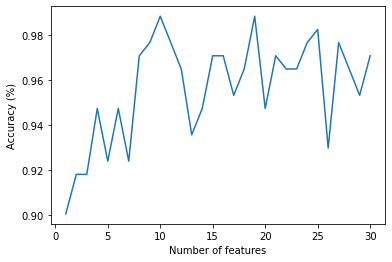

In [51]:
show_accuracy_chart(measures_df)

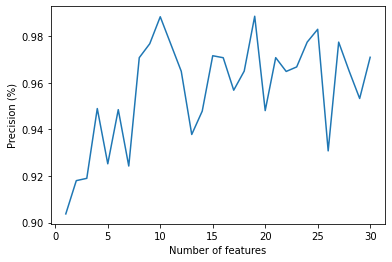

In [52]:
show_precision_chart(measures_df)

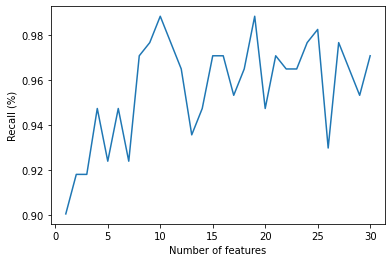

In [53]:
show_recall_chart(measures_df)

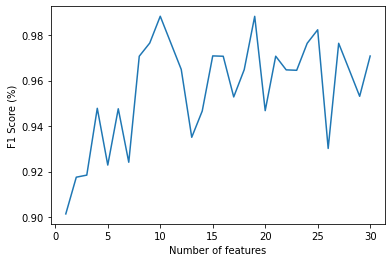

In [54]:
show_f1_score_chart(measures_df)

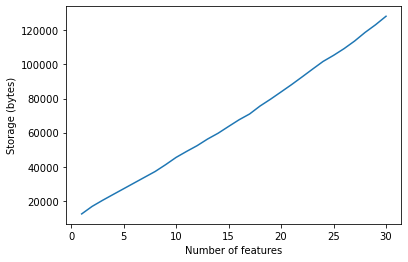

In [55]:
show_storage_chart(measures_df)

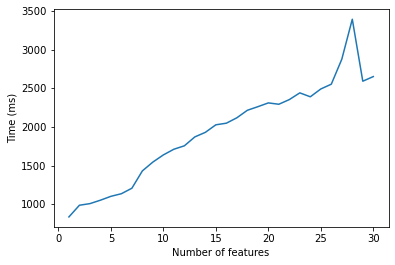

In [56]:
show_training_chart(measures_df)